## Machine Learning Project - Group 27

[GitHub portfolio](https://github.com/Andre-Oli23/portfolio)

### TO GRANT OR NOT TO GRANT

- André Oliveira 20211539  
- Bernardo Faria 20240579  
- Hassan Bhatti 20241023 
- João Marto 20211618  
- Miguel Mangerona 20240595

### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib as mp
import seaborn as sns
import math
import matplotlib.pyplot as plt
import os
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind, chi2_contingency
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from rapidfuzz import process, fuzz
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Read data

In [2]:
data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

Create a **copy** with the original dataset before any alteration

In [3]:
df = data.copy()

In [4]:
test = test_data.copy()

In [5]:
df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,2012-09-12,52,N,2024-06-05,N,NaN,1960.0,2012-10-23,NaN,STATE INSURANCE FUND,...,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13619,5
387971,2024-05-22,59,N,2024-06-05,Y,0.0,1965.0,NaN,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11776,1
387972,2024-05-06,45,N,2024-06-05,Y,0.0,1979.0,NaN,NaN,STATE INSURANCE FUND,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11368,5
387973,2024-02-24,42,N,2024-06-05,Y,0.0,1981.0,NaN,2024-05-21,NEW YORK BLACK CAR OPERATORS',...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11432,5


Check the **datatypes** of each feature while also having a perception of the **existence of missing values** for each one of them

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

At a first glance there are a few things to note just by looking into the .info():
* ``Zip Code`` is considered an object which could be strange given by the fact that it **is usually described by numbers**.
* Features such as ``C-3 Date``, ``First Hearing Date`` and ``IME-4 Count`` have more than almost **70% of missing data** so using these variables would bias our model for sure, yet we will see if we can take some sort of information out of these features.
* Feature ``OIICS Nature of Injury Description`` **has no values** so it will not for sure be useful

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

##### Possible duplicated data

In [9]:
df[df['Claim Identifier'].duplicated(keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
test[test['Claim Identifier'].duplicated(keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents


Neither in the training data nor in the test data we do not find duplicated ``Claim Identifiers`` so we can **set them as the index**.
Also, there is no need for further check of duplicated rows because, if there were any, they would also have the same ``Claim Identifier`` which is not the case.

In [11]:
df = df.set_index('Claim Identifier')
test = test.set_index('Claim Identifier')

See the values corresponding to our target variable so that it can become easier for us to understand and apply further alterations

In [12]:
df['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

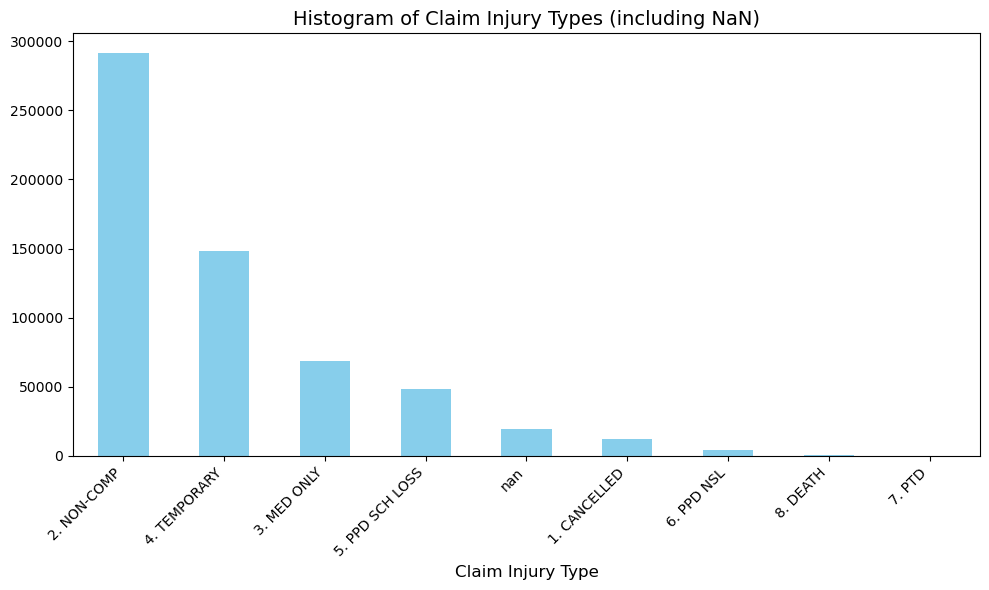

In [13]:
# Plot the histogram for the 'Claim Injury Type' column, including NaN as a category
plt.figure(figsize=(10, 6))
data['Claim Injury Type'].value_counts(dropna=False).plot(kind='bar', color='skyblue')

# Add title and labels
plt.title("Histogram of Claim Injury Types (including NaN)", fontsize=14)
plt.xlabel("Claim Injury Type", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

There is still, as we can see, some **relevant presence of missing values for the target** in the data set but, since we **are not able to properly fill them** we will drop those observation due to its **uselessness for the model**. (Falar da inbalace)

In [14]:
df = df.dropna(subset=['Claim Injury Type'])

Create a checkpoint after dropping the missing values that appeared in the target so that we can compare missing values for all of the features later.

In [15]:
data_original = df.copy()

### Important visualizations and notations before any changes

These are views that need to appear at the beggining so that it can be easier to interpret while most of the features remain as a text type and we haven't applied any changes yet

In [16]:
pd.set_option('display.max_columns', None)
df[
    df['WCIO Cause of Injury Description'].isna() &
    df['WCIO Nature of Injury Description'].isna() 
]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393991,2019-12-05,32.0,N,2020-01-02,Y,0.0,1987.0,NaN,2019-12-26,STATE INSURANCE FUND,2A. SIF,1. CANCELLED,QUEENS,N,NYC,NaN,M,NaN,44.0,RETAIL TRADE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11411,0.0,Not Work Related,4.0
5394018,2019-12-11,44.0,N,2020-01-02,Y,0.0,1975.0,NaN,2019-12-27,CHARTER OAK FIRE INS CO,1A. PRIVATE,1. CANCELLED,NEW YORK,N,NYC,2020-09-15,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07621,0.0,Not Work Related,5.0
5394153,2019-08-15,55.0,N,2020-01-02,N,0.0,1964.0,NaN,2019-12-31,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ALBANY,N,ALBANY,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12306,0.0,Not Work Related,5.0
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5393773,2019-12-27,35.0,N,2020-01-02,N,0.0,0.0,NaN,2019-12-30,SELECTIVE INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SCHENECTADY,N,ALBANY,NaN,M,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12150,0.0,Not Work Related,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164362,2022-12-02,42.0,N,2022-12-30,N,0.0,1980.0,NaN,2022-12-21,COUNTY OF NASSAU,3A. SELF PUBLIC,1. CANCELLED,NASSAU,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11590,0.0,Not Work Related,5.0
6164581,2022-12-06,21.0,N,2022-12-30,N,0.0,2001.0,NaN,2022-12-28,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,WESTCHESTER,N,NYC,NaN,F,NaN,NaN,NaN,III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10701,0.0,Not Work Related,3.0
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0


In [17]:
df[
    df['WCIO Cause of Injury Description'].isna() &
    df['WCIO Nature of Injury Description'].isna() &
    (
        (df['Claim Injury Type'] != '1. CANCELLED') & 
        (df['Claim Injury Type'] != '2. NON-COMP')
    )
]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394287,1995-03-11,40.0,N,2020-01-03,Y,0.00,NaN,NaN,NaN,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11706,1.0,Not Work Related,0.0
5395731,2012-06-23,35.0,N,2020-01-06,Y,NaN,0.0,NaN,2019-12-30,UNIVERSITY OF ROCHESTER 1979,4A. SELF PRIVATE,4. TEMPORARY,MONROE,N,ROCHESTER,2020-03-31,M,NaN,61.0,EDUCATIONAL SERVICES,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28262,1.0,Not Work Related,3.0
5395732,2012-12-12,35.0,N,2020-01-06,Y,0.00,0.0,2012-12-19,2019-12-30,UNIVERSITY OF ROCHESTER 1979,4A. SELF PRIVATE,4. TEMPORARY,MONROE,N,ROCHESTER,2020-04-22,M,NaN,61.0,EDUCATIONAL SERVICES,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28262,1.0,Not Work Related,5.0
5397655,2019-11-27,20.0,N,2020-01-08,N,0.00,1999.0,NaN,2020-01-03,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,3. MED ONLY,ULSTER,N,ALBANY,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12528,0.0,Not Work Related,6.0
5398174,NaN,0.0,N,2020-01-09,Y,0.00,1971.0,2020-01-14,2019-12-30,COMMERCE AND INDUSTRY INS CO,1A. PRIVATE,3. MED ONLY,GENESEE,N,ROCHESTER,2020-03-03,M,NaN,23.0,CONSTRUCTION,I,NaN,NaN,NaN,NaN,NaN,10.0,MULTIPLE HEAD INJURY,14020,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146441,2022-11-14,27.0,N,2022-12-05,Y,0.00,1995.0,2023-01-09,2022-11-30,*** CARRIER UNDETERMINED ***,UNKNOWN,4. TEMPORARY,QUEENS,N,STATEWIDE,2023-05-11,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,11419,1.0,Not Work Related,4.0
6151644,2021-06-26,30.0,N,2022-12-12,N,720.00,1991.0,NaN,NaN,PFL DC CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,4. TEMPORARY,KINGS,N,STATEWIDE,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11231,0.0,Not Work Related,4.0
6158521,2022-12-16,60.0,N,2022-12-21,Y,620.00,1962.0,NaN,2022-12-16,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,KINGS,N,NYC,2023-05-22,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11208,0.0,Not Work Related,1.0


Only **473 rows out of 15594** where the **Cause of Injury and Nature of Injury is missing**, the **ClaimInjuryType** (the target feature) is **neither '1. CANCELLED' or '2. NON-COMP'** so, instead of filling the missing values with something like a mode, **we will create a new designation for those who did not have a value for either of these two variables**

In [18]:
#In cases where this happen, we will fill the code of these two (Cause and Nature of Injury) with 0 so that we know they represent those cases
df.loc[
    df['WCIO Cause of Injury Description'].isna() & df['WCIO Nature of Injury Description'].isna(),
    ['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code']
] = 0

In [19]:
#Apply the same logic for the test dataset
test.loc[
    test['WCIO Cause of Injury Description'].isna() & test['WCIO Nature of Injury Description'].isna(),
    ['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code']
] = 0

We have **really young people reporting injuries at work** which do not make sense at all
* One of them has 8 years and receive a big wage **⟶** Interestingly, he is the only person who died from Covid (normally associated with older people) so in this case we can assume that we are dealing with a miss input in the data
* Children with 1 year old, for sure, were not working so either the age is wrong or this is a report from their parents
* All of them have dependents which does not indicate that they are children at all

In [20]:
df[(df['Age at Injury'] <= 13) & (df['Age at Injury'] != 0)][
    ['Age at Injury', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'Claim Injury Type', 'Average Weekly Wage', 'Birth Year', 'Accident Date', 'Number of Dependents']
]

,Age at Injury,WCIO Cause of Injury Description,WCIO Nature of Injury Description,Claim Injury Type,Average Weekly Wage,Birth Year,Accident Date,Number of Dependents
Claim Identifier,,,,,,,,
5399005,11.0,REPETITIVE MOTION,STRAIN OR TEAR,2. NON-COMP,0.00,0.0,2019-12-29,1.0
5412625,1.0,"FALL, SLIP OR TRIP, NOC",CONTUSION,2. NON-COMP,0.00,2018.0,2020-01-09,6.0
5412736,1.0,"FALL, SLIP OR TRIP, NOC",CONTUSION,2. NON-COMP,NaN,2018.0,2020-01-09,4.0
5412861,10.0,"STRIKING AGAINST OR STEPPING ON, NOC",CONTUSION,2. NON-COMP,0.00,2009.0,2020-01-17,6.0
5453057,5.0,"STRAIN OR INJURY BY, NOC",STRAIN OR TEAR,2. NON-COMP,0.00,1997.0,2002-03-06,6.0
5471435,8.0,PANDEMIC,COVID-19,8. DEATH,1038.46,2011.0,2020-04-01,0.0
5664841,12.0,FROM DIFFERENT LEVEL (ELEVATION),CONTUSION,2. NON-COMP,0.00,0.0,2021-02-19,6.0
5747487,13.0,USING TOOL OR MACHINERY,LACERATION,2. NON-COMP,NaN,2008.0,2021-05-22,0.0
5770598,8.0,FROM DIFFERENT LEVEL (ELEVATION),SPRAIN OR TEAR,2. NON-COMP,0.00,1992.0,2001-07-10,6.0


Another weird thing is that every single "**child**" has a **industry code associated to them**.

In [21]:
df[df['Age at Injury'] == 1][['Age at Injury', 'Industry Code']]

,Age at Injury,Industry Code
Claim Identifier,,
5412625,1.0,54.0
5412736,1.0,54.0


It is also possible to see that, once we reach the **14 year** old people, there appears more **observations with a revenue**, but, **logically** this **might make some sense** so **we will not change** those observations.

In [22]:
pd.set_option('display.max_rows', 10)
df[df['Age at Injury'] == 14]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5429622,2006-10-26,14.0,N,2020-02-14,N,0.00,0.0,NaN,NaN,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,UNKNOWN,N,STATEWIDE,2020-09-24,M,NaN,NaN,NaN,UK,NaN,0.0,NaN,0.0,NaN,NaN,NaN,23508,0.0,Not Work Related,0.0
5505347,2020-06-22,14.0,N,2020-06-25,N,0.00,2006.0,2020-06-24,NaN,NATIONWIDE AGRIBUSINESS INS CO,1A. PRIVATE,2. NON-COMP,WYOMING,N,ROCHESTER,NaN,M,NaN,11.0,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",I,NaN,76.0,HAND TOOL OR MACHINE IN USE,40.0,LACERATION,54.0,LOWER LEG,14066,0.0,Not Work Related,3.0
5522189,2020-07-17,14.0,N,2020-07-22,N,0.00,2005.0,2020-07-22,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,ULSTER,N,ALBANY,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,35.0,HAND,12401,0.0,Not Work Related,5.0
5524036,2020-07-20,14.0,N,2020-07-24,N,0.00,0.0,2020-07-24,NaN,OSWEGO COUNTY SELF-INS PLAN,3A. SELF PUBLIC,3. MED ONLY,OSWEGO,N,SYRACUSE,2021-01-25,F,NaN,92.0,PUBLIC ADMINISTRATION,UK,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,55.0,ANKLE,13537,0.0,Not Work Related,6.0
5525609,2020-07-22,14.0,N,2020-07-28,N,NaN,2005.0,2020-07-28,NaN,OSWEGO COUNTY SELF-INS PLAN,3A. SELF PUBLIC,2. NON-COMP,OSWEGO,N,SYRACUSE,NaN,F,NaN,92.0,PUBLIC ADMINISTRATION,I,NaN,9.0,"CONTACT WITH, NOC",25.0,FOREIGN BODY,19.0,FACIAL BONES,13126,0.0,Not Work Related,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052756,2022-07-28,14.0,N,2022-08-03,N,0.00,0.0,2022-08-03,NaN,CAIRO-DURHAM CSD,3A. SELF PUBLIC,2. NON-COMP,GREENE,N,ALBANY,NaN,M,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,76.0,HAND TOOL OR MACHINE IN USE,40.0,LACERATION,35.0,HAND,12473,0.0,Not Work Related,6.0
6072694,2022-08-25,14.0,N,2022-08-29,N,0.00,2008.0,2022-08-29,NaN,SARATOGA COUNTY WC PLAN,3A. SELF PUBLIC,2. NON-COMP,SARATOGA,N,ALBANY,NaN,F,NaN,92.0,PUBLIC ADMINISTRATION,I,NaN,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,36.0,FINGER(S),12065,0.0,Not Work Related,6.0
6074708,2022-08-26,14.0,N,2022-08-31,N,0.00,2008.0,2022-08-30,NaN,NORTH RIVER INSURANCE CO.,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,29.0,ON SAME LEVEL,10.0,CONTUSION,-9.0,MULTIPLE,10462,0.0,Not Work Related,2.0


In [23]:
pd.reset_option('display.max_rows')

### Variable Grouping 

In order to still take advantage of the variables which include descriptions, we will take a look at the values of each one of and group them some based on the source provided by WCIO and other based on our own interpretation.

##### WCIO Cause of Injury 

In [24]:
# Create a DataFrame with the columns 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', and the count
nature_counts = df.groupby(['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']).size().reset_index(name='Count')
pd.set_option('display.max_rows', None) #Show all the lines
nature_counts

,WCIO Cause of Injury Code,WCIO Cause of Injury Description,Count
0,1.0,CHEMICALS,1863
1,2.0,HOT OBJECTS OR SUBSTANCES,2883
2,3.0,TEMPERATURE EXTREMES,467
3,4.0,FIRE OR FLAME,481
4,5.0,STEAM OR HOT FLUIDS,2032
5,6.0,"DUST, GASES, FUMES OR VAPORS",1011
6,7.0,WELDING OPERATION,81
7,8.0,RADIATION,34
8,9.0,"CONTACT WITH, NOC",2523
9,10.0,MACHINE OR MACHINERY,3913


With every WCIO variable, we will **group them based on what the source itself decided to group** to ensure consistency in it.

In [25]:
# Define the cause of injury categories
# some category names were changed for concicesness purposes
burn_heat_cold_exposure = df.loc[(df['WCIO Cause of Injury Code'].between(1,9)) |
                                 (df['WCIO Cause of Injury Code'].isin([11,14,84])),
                                 'WCIO Cause of Injury Description'].unique().tolist()

caught = df.loc[df['WCIO Cause of Injury Code'].isin([10,12,13,20]), 
                                 'WCIO Cause of Injury Description'].unique().tolist()

cut_puncture_scrape = df.loc[df['WCIO Cause of Injury Code'].between(15, 19), 
                                 'WCIO Cause of Injury Description'].unique().tolist()

fall = df.loc[df['WCIO Cause of Injury Code'].between(25, 33),
                'WCIO Cause of Injury Description'].unique().tolist()

motor_vehicle = df.loc[df['WCIO Cause of Injury Code'].isin([40,41,45,46,47,48,50]),
                'WCIO Cause of Injury Description'].unique().tolist()

strain_injury_by = df.loc[(df['WCIO Cause of Injury Code'].between(52,61)) |
                            (df['WCIO Cause of Injury Code']==97),
                            'WCIO Cause of Injury Description'].unique().tolist()

striking_against = df.loc[df['WCIO Cause of Injury Code'].between(65,70),
                'WCIO Cause of Injury Description'].unique().tolist()

struck = df.loc[(df['WCIO Cause of Injury Code'].between(74,81)) |
                (df['WCIO Cause of Injury Code'].isin([85,86])),
                'WCIO Cause of Injury Description'].unique().tolist()

rubbed = df.loc[df['WCIO Cause of Injury Code'].isin([94,95]),
                'WCIO Cause of Injury Description'].unique().tolist()

miscellaneous = df.loc[df['WCIO Cause of Injury Code'].isin([82,83,87,88,89,90,91,93,96,98,99]),
                'WCIO Cause of Injury Description'].unique().tolist()

    # Check the value of the injury cause and assign the corresponding category
    #injury_cause = row['WCIO Cause of Injury Description']
def categorize_injury_cause(cause):    
    if cause in burn_heat_cold_exposure:
        return 1   
    elif cause in caught:
        return 2   
    elif cause in cut_puncture_scrape:
        return 3  
    elif cause in fall:
        return 4  
    elif cause in motor_vehicle:
        return 5  
    elif cause in strain_injury_by:
        return 6
    elif cause in striking_against:
        return 7
    elif cause in struck:
        return 8
    elif cause in rubbed:
        return 9
    elif cause in miscellaneous:
        return 10
    else:
        return 0

# Apply the categorize_severity function to the DataFrame and create the 'severity' column
df['Cause Severity'] = df['WCIO Cause of Injury Description'].apply(categorize_injury_cause)
test['Cause Severity'] = test['WCIO Cause of Injury Description'].apply(categorize_injury_cause)

We will see that the **NaN values** for Cause of Injury **will seem to have a influence on the final target value** by **plotting histograms** comparing the Claim Injury Type when **we have values vs when we don't have**

In [26]:
df[df['Cause Severity'] ==0]['Claim Injury Type'].value_counts()

2. NON-COMP        8149
1. CANCELLED       7004
4. TEMPORARY        314
3. MED ONLY         136
5. PPD SCH LOSS      26
8. DEATH              9
6. PPD NSL            1
7. PTD                1
Name: Claim Injury Type, dtype: int64

We will now plot a **stacked column chart for every single grouping that we will do** in order to see if the **NaN values have a different behaviour from the rest** and, if so, instead of filling with a typical metric (mean, mode) we will **actually give a new category** so that we can see that, after filling the missing value, it was orginially an NaN when the dataset was made

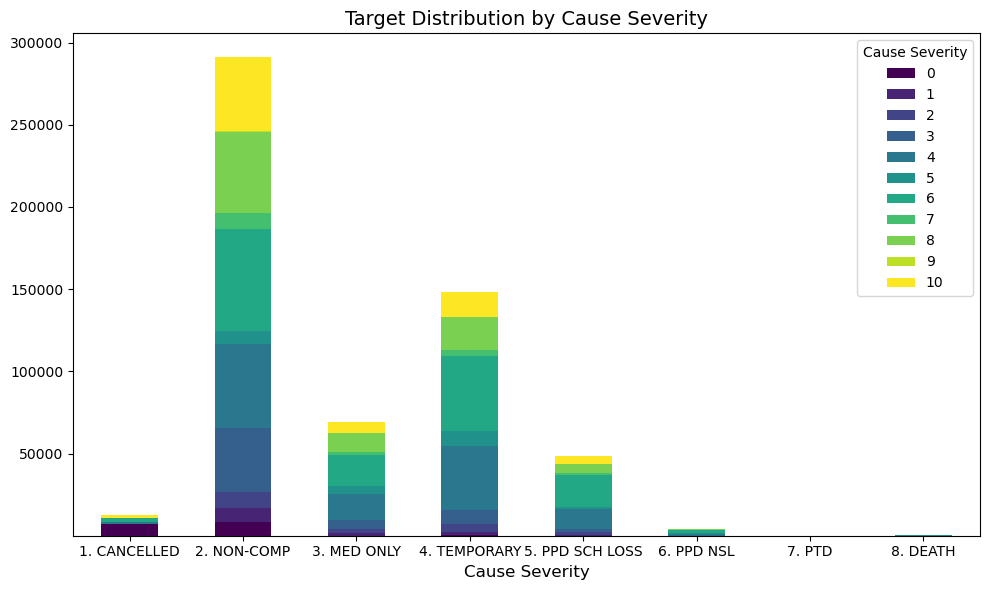

In [27]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Cause Severity']).size().unstack(fill_value=0)

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Cause Severity", fontsize=14)  # Add title
plt.xlabel("Cause Severity", fontsize=12)  # Label for X-axis
plt.xticks(rotation=0)  # Adjust rotation of categories
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

We can see a **big difference in the distribution** (most of the 'Cancelled values are NaN') of the histograms so we will fill the NaN's values for **WCIO Cause of Injury Code** with **0** and **Cause Severity** for these cases will stick with the approach defined by the function

In [28]:
# Fill missing values for 'WCIO Cause of Injury Code' and with 0
df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(0)

In [29]:
#Apply the same for test
test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].fillna(0)

##### WCIO Part Of Body

In [30]:
# Create a DataFrame with the columns 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', and the count
body_counts = df.groupby(['WCIO Part Of Body Code', 'WCIO Part Of Body Description']).size().reset_index(name='Count')

body_counts

,WCIO Part Of Body Code,WCIO Part Of Body Description,Count
0,-9.0,MULTIPLE,42011
1,10.0,MULTIPLE HEAD INJURY,7939
2,11.0,SKULL,7904
3,12.0,BRAIN,1989
4,13.0,EAR(S),3912
5,14.0,EYE(S),12975
6,15.0,NOSE,2091
7,16.0,TEETH,803
8,17.0,MOUTH,1602
9,18.0,SOFT TISSUE,13765


Since a code of -9 sounds very out of order compared to the other and we have a really similar description in code 90 (both are **'MULTIPLE'**) we will check if these descriptions match in the distribution based on the target.

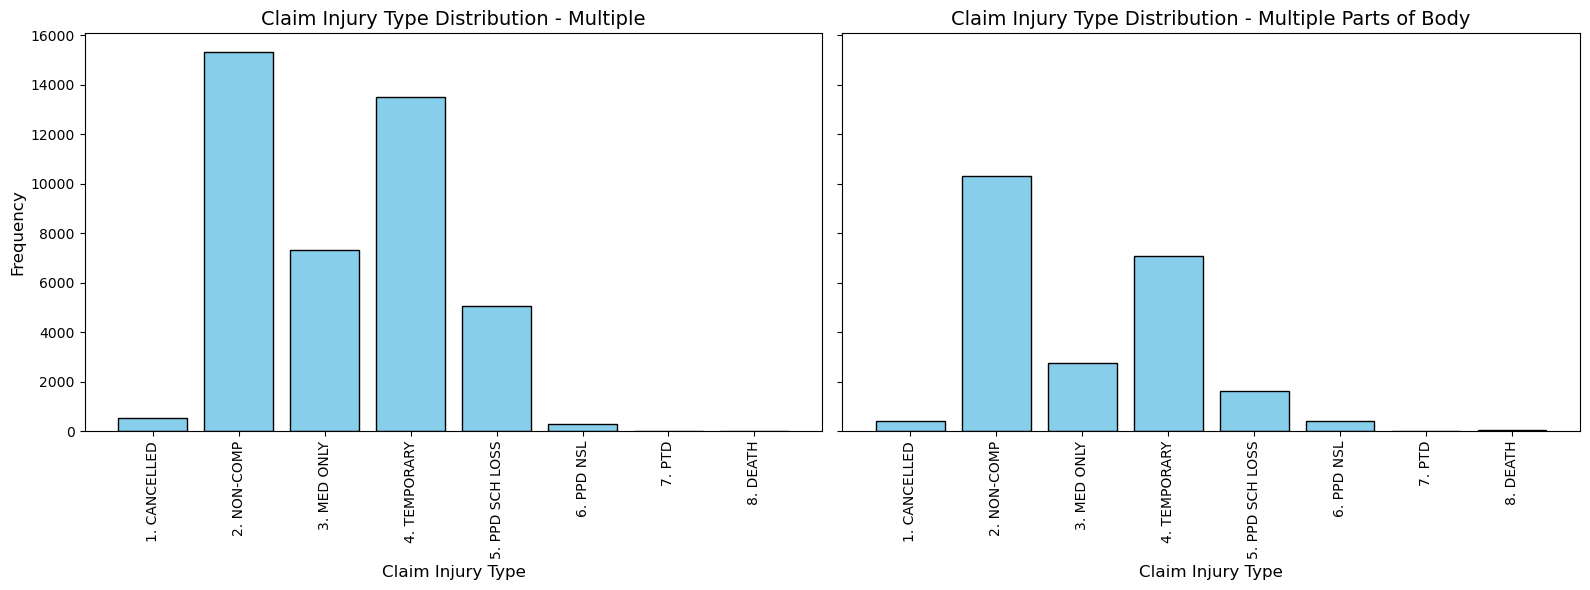

In [31]:
# Filter the data for 'WCIO Part Of Body Description' equal to 'MULTIPLE' and count the values
multiple_body = df[df['WCIO Part Of Body Description'] == 'MULTIPLE']['Claim Injury Type'].value_counts()

# Filter the data for 'WCIO Part Of Body Description' equal to 'MULTIPLE BODY PARTS (INCLUDING BODY)' and count the values
multiple_parts_body = df[df['WCIO Part Of Body Description'] == 'MULTIPLE BODY PARTS (INCLUDING BODY']['Claim Injury Type'].value_counts()

# Get the union of all categories to ensure the same order
all_categories = sorted(set(multiple_body.index).union(set(multiple_parts_body.index)))

# Reindex the counts to ensure the same order of categories
multiple_body_counts = multiple_body.reindex(all_categories, fill_value=0)
multiple_parts_body_counts = multiple_parts_body.reindex(all_categories, fill_value=0)

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Bar plot for 'Multiple'
axes[0].bar(multiple_body_counts.index, multiple_body_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Claim Injury Type Distribution - Multiple', fontsize=14)
axes[0].set_xlabel('Claim Injury Type', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for 'Multiple Parts of Body'
axes[1].bar(multiple_parts_body_counts.index, multiple_parts_body_counts.values, color='skyblue', edgecolor='black')
axes[1].set_title('Claim Injury Type Distribution - Multiple Parts of Body', fontsize=14)
axes[1].set_xlabel('Claim Injury Type', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

We can see that they are indeed really similar we will, from now on consider code **-9** as **90**.

In [32]:
# Replace all 'WCIO Part Of Body Code' values equal to -9 with 90
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace(-9, 90)

The **WCIO website** defines the 6 categories below for the **WCIO Part of Body Code**, which we will use to group the variable.

In [33]:
# Define the body part risk categories
Head = df.loc[df['WCIO Part Of Body Code'].between(10, 19),
               'WCIO Part Of Body Description'].unique().tolist()

Neck = df.loc[df['WCIO Part Of Body Code'].between(20, 26),
               'WCIO Part Of Body Description'].unique().tolist()

Upper_Extremities = df.loc[df['WCIO Part Of Body Code'].between(30, 39),
                            'WCIO Part Of Body Description'].unique().tolist()

Trunk = df.loc[(df['WCIO Part Of Body Code'].between(40, 49)) | 
                (df['WCIO Part Of Body Code'].between(60, 63)), 'WCIO Part Of Body Description'].unique().tolist()

Lower_Extremities = df.loc[df['WCIO Part Of Body Code'].between(50, 58),
                            'WCIO Part Of Body Description'].unique().tolist()

Multiple_Body_Parts = df.loc[(df['WCIO Part Of Body Code'].between(64,99)) | 
                             (df['WCIO Part Of Body Code']==-9), 'WCIO Part Of Body Description'].unique().tolist()


# Define the categorization function for body parts based on severity
def categorize_body_part_risk(body_part):    
    if body_part in Head:
        return 1  
    elif body_part in Neck:
        return 2  
    elif body_part in Upper_Extremities:
        return 3  
    elif body_part in Trunk:
        return 4  
    elif body_part in Lower_Extremities:
        return 5 
    elif body_part in Multiple_Body_Parts:
        return 6
    else:
        return 0

df['Body Part Risk'] = df['WCIO Part Of Body Description'].apply(categorize_body_part_risk)
test['Body Part Risk'] = test['WCIO Part Of Body Description'].apply(categorize_body_part_risk)

See and plot the distribution of missing values in the feature to see how does it behave.

In [34]:
df[df['Body Part Risk']==0]['Claim Injury Type'].value_counts()

2. NON-COMP        8779
1. CANCELLED       6776
4. TEMPORARY        885
3. MED ONLY         391
5. PPD SCH LOSS     163
6. PPD NSL           70
8. DEATH             17
7. PTD                1
Name: Claim Injury Type, dtype: int64

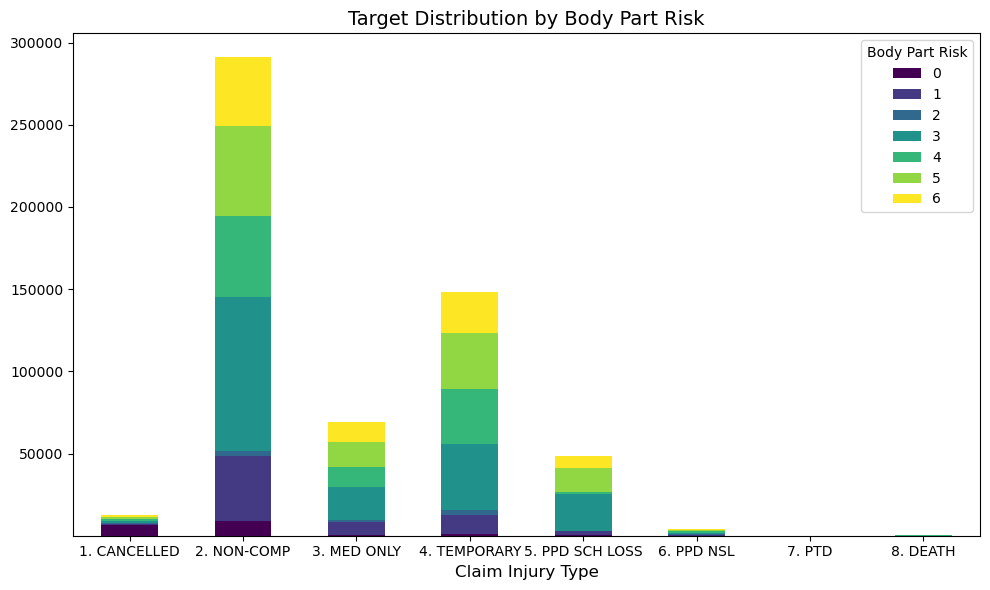

In [35]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Body Part Risk']).size().unstack(fill_value=0)

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Body Part Risk", fontsize=14)  # Add title
plt.xlabel("Claim Injury Type", fontsize=12)  # Label for the X-axis
plt.xticks(rotation=0)  # Adjust rotation of the categories
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

For cases where the **Part of Body is a missing value** the **distribution is clearly different** so we will also **atribute the value 0 for both 'WCIO Part Of Body Code' and 'Body Part Risk'**

In [36]:
# Fill missing values for 'WCIO Part Of Body Code' and 'Body Part Risk' with 0
df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(0)
df['Body Part Risk'] = df['Body Part Risk'].fillna(0)

In [37]:
#Apply the same logic for test
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].fillna(0)
test['Body Part Risk'] = test['Body Part Risk'].fillna(0)

##### WCIO Nature of Injury Code

In [38]:
# Create a DataFrame with the columns 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', and the count
nature_counts = df.groupby(['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']).size().reset_index(name='Count')

nature_counts

,WCIO Nature of Injury Code,WCIO Nature of Injury Description,Count
0,1.0,NO PHYSICAL INJURY,5961
1,2.0,AMPUTATION,736
2,3.0,ANGINA PECTORIS,181
3,4.0,BURN,7525
4,7.0,CONCUSSION,5484
5,10.0,CONTUSION,110717
6,13.0,CRUSHING,5218
7,16.0,DISLOCATION,5867
8,19.0,ELECTRIC SHOCK,619
9,22.0,ENUCLEATION,6


We can see that in this case there are some **duplicated descriptions that contain different codes yet**, if we look on to the original documentation on the WCIO source, we can see for example that we have to "SPRAIN OR TEAR", but **code 49 is related to " wrenching of joints"** while **52 is related to "trauma of the muscle"**.
So, with this in mind we won't group codes where the description is the same.

Also, based on the WCIO website we will group these Nature of Injury in 3 groups.

In [39]:
# Define categories for injury types 

Specific_Injury = df.loc[df['WCIO Nature of Injury Code'].between(1,59),
                          'WCIO Nature of Injury Description'].unique().tolist()

Occupational_Disease_or_Cumulative_Injury = df.loc[df['WCIO Nature of Injury Code'].between(60,83),
                                                    'WCIO Nature of Injury Description'].unique().tolist()

Multiple_Injuries = df.loc[df['WCIO Nature of Injury Code'].between(90,91),
                            'WCIO Nature of Injury Description'].unique().tolist()


# Define the categorization function for injury types 
def categorize_injury_risk(injury_type):    
    if injury_type in Specific_Injury:
        return 1  
    elif injury_type in Occupational_Disease_or_Cumulative_Injury:
        return 2  
    elif injury_type in Multiple_Injuries:
        return 3  
    else:
        return 0
    

# Apply the categorize_injury_risk function to the 'WCIO Nature of Injury Description' feature and create the 'injury_risk' column
df['Nature of Injury Risk'] = df['WCIO Nature of Injury Description'].apply(categorize_injury_risk)
test['Nature of Injury Risk'] = test['WCIO Nature of Injury Description'].apply(categorize_injury_risk)

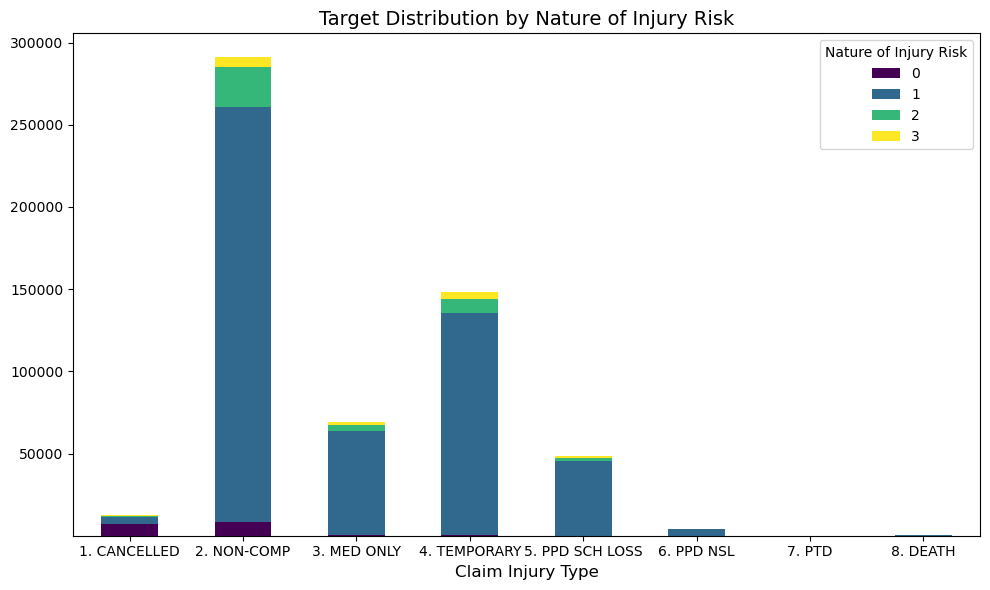

In [40]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Nature of Injury Risk']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhado
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Nature of Injury Risk", fontsize=14)  # Adiciona título
plt.xlabel("Claim Injury Type", fontsize=12)  # Rótulo do eixo X
plt.xticks(rotation=0)  # Ajusta rotação das categorias
plt.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()

In [41]:
df[df['Nature of Injury Risk']==0]['Claim Injury Type'].value_counts()

2. NON-COMP        8158
1. CANCELLED       7012
4. TEMPORARY        313
3. MED ONLY         137
5. PPD SCH LOSS      26
8. DEATH              9
6. PPD NSL            1
7. PTD                1
Name: Claim Injury Type, dtype: int64

Once again, the distribution between 'Unspecified' Nature of Injuries and missing values in those categories are different so instead of giving both of them missing values, **we will keep the unspecified with a specific value (6)** and, like before, give the missing values the value 0.

In [42]:
# Fill missing values for 'WCIO Nature of Injury Code' with 0
df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(0)
test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].fillna(0)

##### Industry Code

In [43]:
# Create a DataFrame with the columns 'Industry Code', 'Industry Code Description', and the count
industry_counts = df.groupby(['Industry Code', 'Industry Code Description']).size().reset_index(name='Count')

industry_counts

,Industry Code,Industry Code Description,Count
0,11.0,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",2404
1,21.0,MINING,695
2,22.0,UTILITIES,2980
3,23.0,CONSTRUCTION,30903
4,31.0,MANUFACTURING,10114
5,32.0,MANUFACTURING,10804
6,33.0,MANUFACTURING,17232
7,42.0,WHOLESALE TRADE,15236
8,44.0,RETAIL TRADE,43685
9,45.0,RETAIL TRADE,17953


We can see that some different codes correspond to the same description (even on the source nothing mentions difference between them) so we will group these codes as just one.

In [44]:
# Use the smallest code within each group of the same 'Industry Code Description'
industry_counts['Industry Code'] = industry_counts.groupby('Industry Code Description')['Industry Code'].transform('min')

For this case, we don't have a bigger group provided NAICS (the source) so we will try to group them based on our interpretation and group into sectors we believe might provide different types of injuries or claim resolutions (it will not be expected, for example, that people working in Technology and Finance to have the same type of injuries as people from Productive Sectors).

In [45]:
# Group Industries by categories
Public_Sector_Social = [
    "PUBLIC ADMINISTRATION", "EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE"
]

Services_Commerce = [
    "ACCOMMODATION AND FOOD SERVICES", "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)", "ARTS, ENTERTAINMENT, AND RECREATION",
    "RETAIL TRADE", "WHOLESALE TRADE", "TRANSPORTATION AND WAREHOUSING", "REAL ESTATE AND RENTAL AND LEASING"
]

Productive_Sectors = [
    "MANUFACTURING", "CONSTRUCTION", "UTILITIES",
    "AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING"
]

Technology_Finance = [
    "INFORMATION", "FINANCE AND INSURANCE", "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",
    "MANAGEMENT OF COMPANIES AND ENTERPRISES"
]

# Function to categorize industries
def categorize_industry(industry):
    if industry in Public_Sector_Social:
        return 1 #"Public Sector and Social Services"
    elif industry in Services_Commerce:
        return 2 #"Services and Commerce"
    elif industry in Productive_Sectors:
        return 3 #"Productive Sectors"
    elif industry in Technology_Finance:
        return 4 #"Technology and Finance"
    else:
        return 0 #Return 0 for NaN values to check the graph and see if it actually makes senses

# Apply the function to the dataset
df['Industry Category'] = df['Industry Code Description'].apply(categorize_industry)
test['Industry Category'] = test['Industry Code Description'].apply(categorize_industry)

In [46]:
df[df['Industry Category']==0]['Claim Injury Type'].value_counts()

2. NON-COMP        5982
1. CANCELLED       3561
4. TEMPORARY        219
3. MED ONLY         145
5. PPD SCH LOSS      44
8. DEATH              4
6. PPD NSL            2
7. PTD                1
Name: Claim Injury Type, dtype: int64

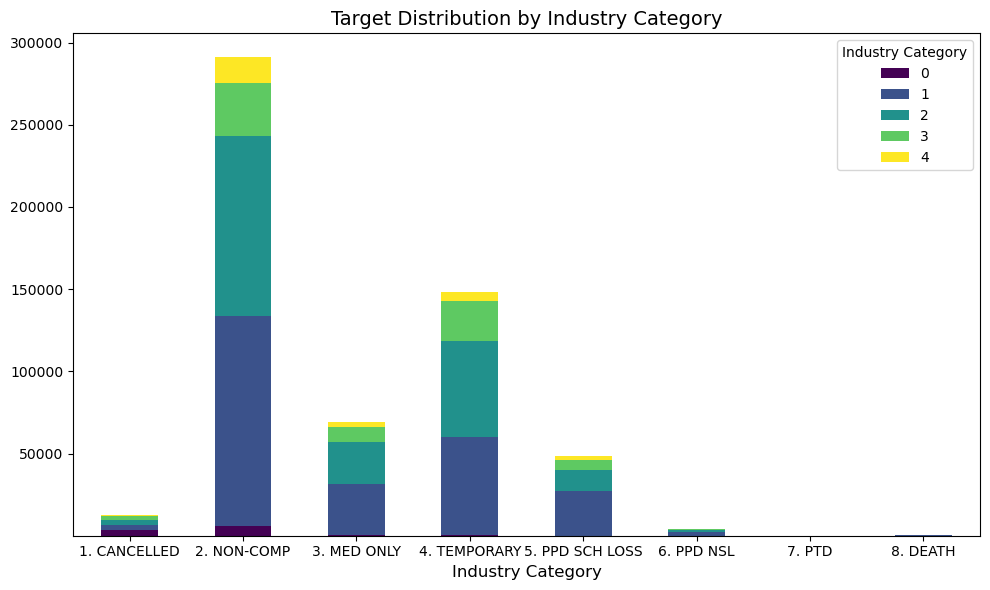

In [47]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Industry Category']).size().unstack(fill_value=0)

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Industry Category", fontsize=14)  # Add title
plt.xlabel("Industry Category", fontsize=12)  # Label for the X-axis
plt.xticks(rotation=0)  # Adjust rotation of the categories
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

Once again, the missing values will only belong to Cancelled or Non-Comp most of the time so we will stick with a different value instead of filling the NaN with a different computation

In [48]:
df['Industry Code'] = df['Industry Code'].fillna(0)
test['Industry Code'] = test['Industry Code'].fillna(0)

In [49]:
#See if the distribution is well composed (make sure there are no categories with a very high number while others are very low)
df['Industry Category'].value_counts()

1    250972
2    210444
3     75132
4     27520
0      9958
Name: Industry Category, dtype: int64

##### Carrier Name

In [50]:
# Create a DataFrame with the columns 'Carrier Name', 'Carrier Type', and the count
carrier_counts = df.groupby(['Carrier Name', 'Carrier Type']).size().reset_index(name='Count')
pd.reset_option('display.max_rows') #reset option so that we won't all of the lines in every output
carrier_counts

,Carrier Name,Carrier Type,Count
0,*** CARRIER UNDETERMINED ***,UNKNOWN,1774
1,A I U INSURANCE COMPANY,1A. PRIVATE,11038
2,"ABF FREIGHT SYSTEM, INC.",4A. SELF PRIVATE,128
3,ABF FREIGHT SYSTEMS INC DEL,4A. SELF PRIVATE,10
4,ACADIA INSURANCE COMPANY,1A. PRIVATE,87
...,...,...,...
2042,"YORKTOWN, TOWN OF",3A. SELF PUBLIC,21
2043,ZENITH INSURANCE COMPANY,1A. PRIVATE,67
2044,ZURICH AMERICAN INSURANCE,1A. PRIVATE,41
2045,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,2862


We can clearly see that there are a **lot of Carriers with almost the same name** with the differences sometimes being just a '.' (for example the carrier names "ZURICH AMERICAN INSURANCE CO	", "ZURICH AMERICAN INSURANCE CO." and "ZURICH AMERICAN INSURANCE" right at the end of the list, all mean the same Carrier, yet they are registered as different ones).
So, with this in mind, we will take advantage of the rapidfuzz library and spot the Carriers similar to eachother and, if they are, group them in just one.

We can see that we have some "Carriers" shown "*** CARRIER UNDETERMINED ***" and, since these variable shows no missing values, we will keep this in mind for further exploration. 

It is also important to note that the 'similarity treshold' that needs to be defined is defined arbitrarly and we set a number of 80 because we wanted to make sure that this is going to group names belonging to the same carrier without grouping, for instance, carriers with similar namee that are different.

In [51]:
# Get all unique carrier names
unique_carriers = df['Carrier Name'].unique()

# Define a dictionary to store standardized names
standardized_carriers = {}

# Set a similarity threshold
similarity_threshold = 80

# Standardize carrier names
for carrier in unique_carriers:
    # Find the most similar standardized name
    match = process.extractOne(carrier, standardized_carriers.keys(), scorer=fuzz.token_sort_ratio)
    if match and match[1] >= similarity_threshold:
        # If sufficiently similar, map to the existing standardized name
        standardized_carriers[carrier] = standardized_carriers[match[0]]
    else:
        # Otherwise, use the current name as the new standard
        standardized_carriers[carrier] = carrier

# Replace carrier names in the DataFrame with standardized names
df['Carrier Name'] = df['Carrier Name'].map(standardized_carriers)

# Group and count the data again
carrier_counts = df.groupby(['Carrier Name', 'Carrier Type']).size().reset_index(name='Count')

carrier_counts

,Carrier Name,Carrier Type,Count
0,*** CARRIER UNDETERMINED ***,UNKNOWN,1774
1,A I U INSURANCE COMPANY,1A. PRIVATE,13259
2,"ABF FREIGHT SYSTEM, INC.",4A. SELF PRIVATE,138
3,ACCIDENT FUND GENERAL,1A. PRIVATE,52
4,ACCIDENT FUND INSURANCE CO,1A. PRIVATE,154
...,...,...,...
1279,"YONKERS, CITY OF",3A. SELF PUBLIC,916
1280,YORKSHIRE-PIONEER CENTRAL,3A. SELF PUBLIC,25
1281,YORKTOWN CSD,3A. SELF PUBLIC,36
1282,"YORKTOWN, TOWN OF",3A. SELF PUBLIC,54


As we can see here, we were able to go from **2046** values to **1283** which is very positive.

Since the feature ``Carrier Name`` has a **lot of unique values** we will deal with this later in the code and proceed with other analysis.

Now that every description was analyzed, we can remove those variables

In [52]:
#Remove the description variables because they are no longer useful for the code and were already analyzed
df.drop(['WCIO Cause of Injury Description', 'WCIO Part Of Body Description', 'WCIO Nature of Injury Description'], inplace = True, axis=1)
test.drop(['WCIO Cause of Injury Description', 'WCIO Part Of Body Description', 'WCIO Nature of Injury Description'], inplace = True, axis=1)

### Data Cleaning and Preparation

#### Dealing with variables with high number of missing values

##### C-3 Date

We already saw that C-3 only has **187245** out of **593471** (+/- 30%) values with actual information. Yet we decided that it could be useful if we create a new binary feature named Claim Form Recieved (which is basically what C-3 stands for) corresponding to 1 if we had any value and 0 if there is none.

In [53]:
# Create the 'Claim Report Received' variable based on the presence of 'C-3-Date'
df['Claim Report Received'] = df['C-3 Date'].notna().astype(int)
test['Claim Report Received'] = test['C-3 Date'].notna().astype(int)
#astype int converts 'True' to 1 and 'False' to 0

In [54]:
#Remove C-3 Date now that it has been treated
df.drop('C-3 Date', inplace = True, axis=1)
test.drop('C-3 Date', inplace = True, axis=1)

###### IME-4 Count

**Description**: Number of IME-4 forms received per claim

Once again a variable with high number of missing values and, since this one contains a number of recieved items we will see if NaN actually corresponds to 0 (in case of the values present are > 0) or they are simply not revealed.

In [55]:
# Create a DataFrame for 'IME-4 Count' counts
ime4_count_counts = df['IME-4 Count'].value_counts().reset_index()

# Rename columns for better clarity
ime4_count_counts.columns = ['IME-4 Count', 'Count']

# Display the resulting DataFrame
ime4_count_counts

,IME-4 Count,Count
0,1.0,40112
1,2.0,34504
2,3.0,16136
3,4.0,13781
4,5.0,7680
5,6.0,6427
6,7.0,3838
7,8.0,3156
8,9.0,1915
9,10.0,1460


We can confirm that there are no zero values so, given the context of the variable, we will assume **NaN as 0** and keep this feature for the future.

In [56]:
df['IME-4 Count'].replace(np.nan, 0, inplace=True)
test['IME-4 Count'].replace(np.nan, 0, inplace=True)

##### First Hearing Date

**Description**: Date the first hearing was held on a claim at a WCB hearing location. A **blank date** means the **claim has not yet had a hearing held**.

The description of the feature is pretty clear so, in this case we will once again do a binary on wether the person already had an hearing or not.

In [57]:
# Create the 'Hearing Held' variable based on the presence of 'First Hearing Date'
df['Hearing Held'] = df['First Hearing Date'].notna().astype(int)
test['Hearing Held'] = test['First Hearing Date'].notna().astype(int)
#astype int converts 'True' to 1 and 'False' to 0

In [58]:
#Remove First Hearing Date now that it has been treated
df.drop('First Hearing Date', inplace = True, axis=1)
test.drop('First Hearing Date', inplace = True, axis=1)

##### OIICS Nature of Injury Description

Remove OIICS Nature of Injury Description due to it not having a single information.

In [59]:
df.drop('OIICS Nature of Injury Description', inplace = True, axis=1)
test.drop('OIICS Nature of Injury Description', inplace = True, axis=1)

Change the data type of dates so that we are able to **extract the years, months and days**.

In [60]:
#Update the data type of these variables
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'])
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])

#Apply the same for test
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'])
test['Accident Date'] = pd.to_datetime(test['Accident Date'])
test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])

##### Creation of ``Days Difference`` feature

It will account for the ammount of time that it took from the accident to the assembly.

In [61]:
# Calculate the difference in days, setting NaN if either date is missing
df['Days Difference'] = np.where(
    df['Accident Date'].notna() & df['Assembly Date'].notna(),  # Condition: both dates exist
    (df['Assembly Date'] - df['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

test['Days Difference'] = np.where(
    test['Accident Date'].notna() & test['Assembly Date'].notna(),  
    (test['Assembly Date'] - test['Accident Date']).dt.days,       
    np.nan                                     
)

In cases where **Days Difference < 0**, it would mean that **we would have an Assembly before the Accident which do not make sense**, so, for these specific cases we will assume that the ``Assembly Date`` is actually the ``Accident Date`` and vice versa.

In [62]:
df['Accident Date'], df['Assembly Date'] = np.where(
    df['Days Difference'] < 0,
    (df['Assembly Date'], df['Accident Date']),  #Interchange the values
    (df['Accident Date'], df['Assembly Date'])   
)

test['Accident Date'], test['Assembly Date'] = np.where(
    test['Days Difference'] < 0,
    (test['Assembly Date'], test['Accident Date']),  #Interchange the values
    (test['Accident Date'], test['Assembly Date'])   
)

We now update the ``Days Difference`` feature with the new changed values for the date.

In [63]:
# Calculate the difference in days, setting NaN if either date is missing
df['Days Difference'] = np.where(
    df['Accident Date'].notna() & df['Assembly Date'].notna(),  # Condition: both dates exist
    (df['Assembly Date'] - df['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

test['Days Difference'] = np.where(
    test['Accident Date'].notna() & test['Assembly Date'].notna(), 
    (test['Assembly Date'] - test['Accident Date']).dt.days,       
    np.nan                                    
)

In [64]:
#Verify if it worked
df[df['Days Difference'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


##### Days To Process Report

Create also a feature ``Days To Process Report`` which account for the ammount of time it took from the Accident Date actually finalizing the report of it (C-2 Date).

In [65]:
df['Days To Process Report'] = np.where( 
    df['Accident Date'].notna() & df['C-2 Date'].notna(),  # Condition: both dates exist
    (df['C-2 Date'] - df['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

test['Days To Process Report'] = np.where( #Variable indicating the diference of days between the last Employer's Report and the day of accident
    test['Accident Date'].notna() & test['C-2 Date'].notna(),  # Condition: both dates exist
    (test['C-2 Date'] - test['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

Like we did for the Days Difference, we will **apply the same logic** ensuring that **we do not have C-2 Dates happening before the Accident** and, if so, we will interchange the values of the two variables.

In [66]:
df['Accident Date'], df['C-2 Date'] = np.where(
    df['Days To Process Report'] < 0,
    (df['C-2 Date'], df['Accident Date']),  # Interchange the values of the features
    (df['Accident Date'], df['C-2 Date'],) 
)

test['Accident Date'], test['C-2 Date'] = np.where(
    test['Days To Process Report'] < 0,
    (test['C-2 Date'], test['Accident Date']),  # Interchange the values of the features
    (test['Accident Date'], test['C-2 Date'],) 
)

Update again the new feature created with the correct values.

In [67]:
df['Days To Process Report'] = np.where(
    df['Accident Date'].notna() & df['C-2 Date'].notna(),  # Condition: both dates exist
    (df['C-2 Date'] - df['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

test['Days To Process Report'] = np.where(
    test['Accident Date'].notna() & test['C-2 Date'].notna(),  # Condition: both dates exist
    (test['C-2 Date'] - test['Accident Date']).dt.days,       # Calculate difference if condition is met
    np.nan                                     # Otherwise, set as NaN
)

In [68]:
#Verify if it worked
df[df['Days To Process Report'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Extract the **Years, Months and Days** out of all the dates as new feature and dropping the original variable.

In [69]:
df['Assembly Year'] = df['Assembly Date'].dt.year
df['Assembly Month'] = df['Assembly Date'].dt.month
df['Assembly Day'] = df['Assembly Date'].dt.day

test['Assembly Year'] = test['Assembly Date'].dt.year
test['Assembly Month'] = test['Assembly Date'].dt.month
test['Assembly Day'] = test['Assembly Date'].dt.day

In [70]:
df.drop('Assembly Date', inplace = True, axis=1)
test.drop('Assembly Date', inplace = True, axis=1)

In [71]:
df['Accident Year'] = df['Accident Date'].dt.year
df['Accident Month'] = df['Accident Date'].dt.month
df['Accident Day'] = df['Accident Date'].dt.day

test['Accident Year'] = test['Accident Date'].dt.year
test['Accident Month'] = test['Accident Date'].dt.month
test['Accident Day'] = test['Accident Date'].dt.day

In [72]:
df.drop('Accident Date', inplace = True, axis=1)
test.drop('Accident Date', inplace = True, axis=1)

In [73]:
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])

In [74]:
df['C-2 Year'] = df['C-2 Date'].dt.year
df['C-2 Month'] = df['C-2 Date'].dt.month
df['C-2 Day'] = df['C-2 Date'].dt.day

test['C-2 Year'] = test['C-2 Date'].dt.year
test['C-2 Month'] = test['C-2 Date'].dt.month
test['C-2 Day'] = test['C-2 Date'].dt.day

In [75]:
df.drop('C-2 Date', inplace = True, axis=1)
test.drop('C-2 Date', inplace = True, axis=1)

Create two new features (``Years To Process Report`` and ``Years Difference``) where we will calculate the years that took from the ``Accident Date`` until the finalization of the claim (``C-2 Date``) and the ``Assembly Date``, respectively.

In [76]:
df['Years To Process Report'] = np.where(
    df['C-2 Year'].notna() & df['Accident Year'].notna(),  # Condition: both years exist
    df['C-2 Year'] - df['Accident Year'],  # Calculate difference if condition is met
    np.nan  # Otherwise, set as NaN
)

test['Years To Process Report'] = np.where(
    test['C-2 Year'].notna() & test['Accident Year'].notna(),  
    test['C-2 Year'] - test['Accident Year'],  
    np.nan  
)

In [77]:
df['Years Difference'] = np.where(
    df['Assembly Year'].notna() & df['Accident Year'].notna(),  # Condition: both years exist
    df['Assembly Year'] - df['Accident Year'],  # Calculate difference if condition is met
    np.nan  # Otherwise, set as NaN
)

test['Years Difference'] = np.where(
    test['Assembly Year'].notna() & test['Accident Year'].notna(),  # Condition: both years exist
    test['Assembly Year'] - test['Accident Year'],  # Calculate difference if condition is met
    np.nan  # Otherwise, set as NaN
)

#### Conversion of some categorical features from a string to numbers

Some features, as we will see here, have been coded to show as strings, yet, they can be easily converted into numbers and that is exactly what we will do here.

##### COVID-19 Indicator

In [78]:
# Create a DataFrame for 'COVID-19 Indicator' counts
covid_indicator_counts = df['COVID-19 Indicator'].value_counts().reset_index()

# Rename columns for better clarity
covid_indicator_counts.columns = ['COVID-19 Indicator', 'Count']

# Display the resulting DataFrame
covid_indicator_counts

,COVID-19 Indicator,Count
0,N,546505
1,Y,27521


In [79]:
#Convert N and Y to numeric values for more efficient analysis
df['COVID-19 Indicator'].replace({'N': 0, 'Y': 1}, inplace = True)
test['COVID-19 Indicator'].replace({'N': 0, 'Y': 1}, inplace = True)

##### Gender

In [80]:
# Create a DataFrame for 'Gender' counts
gender_counts = df['Gender'].value_counts().reset_index()

# Rename columns for better clarity
gender_counts.columns = ['Gender', 'Count']

# Display the resulting DataFrame
gender_counts

,Gender,Count
0,M,335218
1,F,234051
2,U,4711
3,X,46


In [81]:
#We will convert the U (unknown) to an NA value
df['Gender'].replace({'F': 0,'M': 1,'U': np.nan,'X': 2}, inplace = True)
test['Gender'].replace({'F': 0,'M': 1,'U': np.nan,'X': 2}, inplace = True)

In [82]:
df[df['Gender'].isna()]['Claim Injury Type'].value_counts()

2. NON-COMP        3072
4. TEMPORARY        823
3. MED ONLY         452
5. PPD SCH LOSS     179
1. CANCELLED        172
6. PPD NSL           13
Name: Claim Injury Type, dtype: int64

In [83]:
df[df['Gender'].notna()]['Claim Injury Type'].value_counts()

2. NON-COMP        288006
4. TEMPORARY       147684
3. MED ONLY         68454
5. PPD SCH LOSS     48101
1. CANCELLED        12305
6. PPD NSL           4198
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

When the **Gender is a missing value**, in these case, there is **not really a pattern different from the rest** so we will just **define as a missing value and deal with it later**

##### Attorney/Representative

In [84]:
# Create a DataFrame for 'Attorney/Representative' counts
attorney_counts = df['Attorney/Representative'].value_counts().reset_index()

# Rename columns for better clarity
attorney_counts.columns = ['Attorney/Representative', 'Count']

# Display the resulting DataFrame
attorney_counts

,Attorney/Representative,Count
0,N,392291
1,Y,181735


In [85]:
df['Attorney/Representative'].replace({'N': 0, 'Y': 1}, inplace = True)
test['Attorney/Representative'].replace({'N': 0, 'Y': 1}, inplace = True)

##### Alternative Dispute Resolution

In [86]:
# Create a DataFrame for 'Alternative Dispute Resolution' counts
adr_counts = df['Alternative Dispute Resolution'].value_counts().reset_index()

# Rename columns for better clarity
adr_counts.columns = ['Alternative Dispute Resolution', 'Count']

# Display the resulting DataFrame
adr_counts

,Alternative Dispute Resolution,Count
0,N,571412
1,Y,2609
2,U,5


In [87]:
df['Alternative Dispute Resolution'].replace({'N': 0,'Y': 1, 'U':np.nan}, inplace = True)
test['Alternative Dispute Resolution'].replace({'N': 0,'Y': 1, 'U':np.nan}, inplace = True)

##### WCB Decision

In [88]:
df['WCB Decision'].value_counts() 

Not Work Related    574026
Name: WCB Decision, dtype: int64

Since this feature is **univariate** meaning that it only has one value, we will drop it since it does not add any information.

In [89]:
#Univariate feature so we should drop it
df.drop('WCB Decision', inplace = True, axis=1)
#Only drop for df and not test because this feature is not present in the test dataset

##### Carrier Type

In [90]:
# Create a DataFrame for 'Carrier Type' counts
carrier_type_counts = df['Carrier Type'].value_counts().reset_index()

# Rename columns for better clarity
carrier_type_counts.columns = ['Carrier Type', 'Count']

# Display the resulting DataFrame
carrier_type_counts

,Carrier Type,Count
0,1A. PRIVATE,285368
1,3A. SELF PUBLIC,121920
2,2A. SIF,111144
3,4A. SELF PRIVATE,52788
4,UNKNOWN,1774
5,5D. SPECIAL FUND - UNKNOWN,1023
6,5C. SPECIAL FUND - POI CARRIER WCB MENANDS,5
7,5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A),4


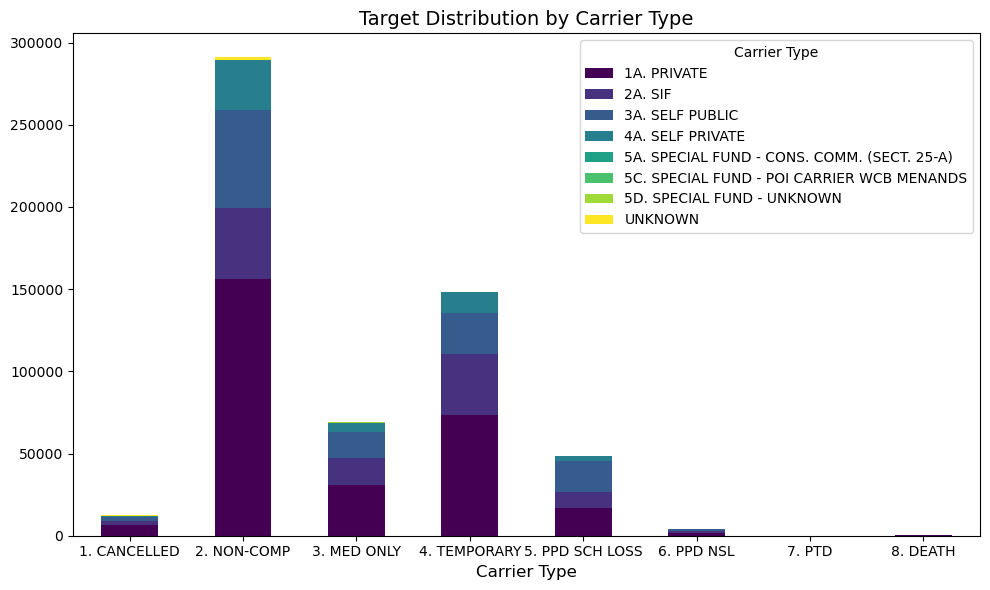

In [91]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Carrier Type']).size().unstack(fill_value=0)

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Carrier Type", fontsize=14)  # Add title
plt.xlabel("Carrier Type", fontsize=12)  # Label for the X-axis
plt.xticks(rotation=0)  # Adjust rotation of the categories
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

In [92]:
# Filter the data for 'Carrier Type' equal to 'UNKNOWN' and count the occurrences of each target value
unknown_target_counts = df[df['Carrier Type'] == 'UNKNOWN']['Claim Injury Type'].value_counts()

# Convert the counts into a DataFrame for better presentation
unknown_target_distribution = unknown_target_counts.reset_index()
unknown_target_distribution.columns = ['Claim Injury Type', 'Count']  # Rename columns for clarity

# Display the resulting table
unknown_target_distribution

,Claim Injury Type,Count
0,2. NON-COMP,1529
1,1. CANCELLED,188
2,4. TEMPORARY,44
3,3. MED ONLY,12
4,5. PPD SCH LOSS,1


Still having in mind that **values of 'Unknown' are few** (directly correspond to the Carrier Name = "*** CARRIER UNDETERMINED ***")it is still possible to see that they are not "distributed" through the whole possible target values only appearing in 1 or 2 most of the time, unlike the other Carrier Types, so we will actually assign a number instead of replacing with a missing value.

In [93]:
# Replace 'UNKNOWN' with NaN in the 'Carrier Type' column and alll of the Special Funds into just one variable since we have very few values in some of them
df['Carrier Type'].replace({'1A. PRIVATE': 1,'2A. SIF': 1,'UNKNOWN': 0, '3A. SELF PUBLIC': 3, '4A. SELF PRIVATE': 4,
                            '5D. SPECIAL FUND - UNKNOWN': 5,
                            '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
                            '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5}
                           , inplace = True)

test['Carrier Type'].replace({'1A. PRIVATE': 1,'2A. SIF': 1,'UNKNOWN': 0, '3A. SELF PUBLIC': 3, '4A. SELF PRIVATE': 4,
                            '5D. SPECIAL FUND - UNKNOWN': 5,
                            '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
                            '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5}
                           , inplace = True)

##### County of Injury

In [94]:
# Create a DataFrame for 'County of Injury' counts
county_counts = df['County of Injury'].value_counts().reset_index()

# Rename columns for better clarity
county_counts.columns = ['County of Injury', 'Count']
pd.set_option('display.max_rows', None)
county_counts

,County of Injury,Count
0,SUFFOLK,60430
1,QUEENS,58333
2,KINGS,53207
3,NASSAU,43580
4,BRONX,39618
5,ERIE,30874
6,NEW YORK,30014
7,WESTCHESTER,25754
8,MONROE,24071
9,ORANGE,17450


Everything seems to be okay here yet, because we have big amount of diversity in the values, we will only **encode them after the split**.

We were able to see that some Counties contained the value **'UNKNOWN'** so we will set them as a missing value for now and deal with it once we split the data later.

In [95]:
#Reset the option so that we won't see all the lines in the future
pd.reset_option('display.max_rows')

# Replace values in the 'County of Injury' column where the value is 'UNKNOWN' with NaN
df['County of Injury'] = df['County of Injury'].replace('UNKNOWN', np.nan)
test['County of Injury'] = test['County of Injury'].replace('UNKNOWN', np.nan)

##### District Name

In [96]:
# Create a DataFrame for 'District Name' counts
district_counts = df['District Name'].value_counts().reset_index()

# Rename columns for better clarity
district_counts.columns = ['District Name', 'Count']

# Display the resulting DataFrame
district_counts

,District Name,Count
0,NYC,270779
1,ALBANY,86171
2,HAUPPAUGE,60536
3,BUFFALO,45605
4,SYRACUSE,44646
5,ROCHESTER,40449
6,BINGHAMTON,21864
7,STATEWIDE,3976


Like we did for the Counties, we will encode these values after the split.

##### Zip Code

In [97]:
df['Zip Code'].value_counts()

11236      3302
10940      2971
11717      2807
11434      2759
11706      2728
           ... 
09603         1
13125         1
75038.0       1
14507.0       1
07122         1
Name: Zip Code, Length: 10060, dtype: int64

Again, and like we noted in the beggining with the .info() Zip Code is considered an object and yet the first values that we have here appear to only contain numbers. What we will do now is try to **print and see what values contain anything that is not a number** and try to explore what is happening.

In [98]:
# Extract only the 'Zip Code' values that contain non-numeric characters
non_numeric_zip_codes = df['Zip Code'][df['Zip Code'].str.contains(r'\D', na=False)]

# Display the unique non-numeric 'Zip Code' values
print(non_numeric_zip_codes.unique())

['L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1' 'L1A 3'
 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' '.1605' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' '22-40' 'M3K2B' 'M3K2C'
 'T1S 0' 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K'
 'JOL1B' 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G'
 'H1V3S' 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E'
 'T6R 0' 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N'
 'K2L 4' 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M'
 'K1N0A' 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3'
 'JMCTY' 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7'
 'IP3 8' 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W'
 'TS7 8' 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B'
 'L2R 6' 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B'
 'L1E 3' 'M8W 0' 'J5K' 'K9A 0' 'L7C 3' 'N4K 6' 'V4W2N' 'V1W1Y' '

After researching some of these codes, it was possible to discover that **those that contain letters** in addition to numbers originate from **countries other than the United States** (Canada, UK and Jamaica). That said, we will **group them in order to convert** this set (and only because it is a small set) **into a specific number that will correspond to these observations**.

In [99]:
canadian_zip_codes = [
    "L1N 5", "T1B0P", "L6Y 1", "N2P 1", "H7X3Z", "L2N 3", "L0R 1", "L1A 3", 
    "T4R1E", "L7L 6", "L2W 1", "K9K 1", "M4E1S", "L2A 5", "T2V", "J0L1B", 
    "J1H2Y", "L2A 1", "H2T2W", "T1J5G", "M3K2B", "M3K2C", "T1S 0", "N6C4E", 
    "H1V2L", "V6Z3G", "M6S5B", "V3H1H", "L2H0H", "L1C0K", "L5N7C", "V6T1Z", 
    "T2X3P", "L2A1R", "L4A0G", "H1V3S", "K6H2L", "L6H 3", "J0J1S", "B3E1A", 
    "V6T5C", "V2B0E", "M6K3C", "L9W", "L0S1N", "K2L 4", "H1G0A", "B3M 3", "H9S", 
    "T1S", "L0S1T", "V6B2M", "K1N0A", "H1X3L", "M5R2Z", "K6H6Y", "V1M 1", "M6H 4", 
    "L7L7G", "L1V 3", "R3L1B", "V4W 2", "L2H 3", "K9H1P", "L7T 4", "L1A 1", "K9J", 
    "L9W 7", "L0R 2", "L7G 1", "M5R", "L4H1K", "L1G 3", "K9J 0", "H1Y2W", "M9N1B", 
    "M4C5K", "L9H1N", "H3J2V", "L9W4X", "N0L1B", "L2R 6", "L3J0R", "L1G", "L8G 1", 
    "S7W1B", "K9K 2", "M5V 3", "L1E 3", "M8W 0", "K9A 0", "L7C 3", "N4K 6", "V4W2N", 
    "V1W1Y", "L2A 3", "L0L2N", "S7W 1", "L319P", "L2A2N", "L2N3A", "L9L1B", "N0A 1", 
    "V1M2B", "L2P0A", "L6L 1"]

unknown_zip_codes = ["UNKNO", "22-40", ".1605", "SLV", "F94A0", "P7G", "Z2E1N", "KOC 1", 
                    "MIN2M", "F42E0", "IP3 8", "SG2OL", "S7R 0", "V6ZOG", "H3COW", 
                    "TS7 8", "J5K", "N8H", "L37 6", "HIV3S", "CP 59", "E1G5R", "G674J", "G9B0Y",
                    'T6R 0', 'S7W']

foreign_zip_codes = ["JMDMR", "JMDCN", "JMAKN", "JMCTY", "JMBTS", "JMDWD", "JMACE", "AB106", 
                    "BT48-", "CW57B", "CH60", "DH8 9", 'JOL1B']

We will create a new feature named ``Origin Country`` where it indicates the country of origin of the Zip Code belonging to the observation

In [100]:
# Clean up Zip Code column (convert to string and strip whitespace)
df['Zip Code'] = df['Zip Code'].astype(str).str.strip()

# Apply logic for 'Origin Country' column
df['Origin Country'] = df['Zip Code'].apply(
    lambda x: 'Canada' if x  in canadian_zip_codes else
              'Foreign' if x in foreign_zip_codes else   
              'USA' if x.isdigit() else  # Check if the zip code is numeric, indicating USA zip code
              np.nan  # For invalid or unknown zip codes
)

In [101]:
# Create a DataFrame for 'Origin Country' counts
origin_country_counts = df['Origin Country'].value_counts().reset_index()

# Rename columns for better clarity
origin_country_counts.columns = ['Origin Country', 'Count']

# Display the resulting DataFrame
origin_country_counts

,Origin Country,Count
0,USA,530016
1,Canada,287
2,Foreign,17


There are really **few people not from the US** so we will drop this idea

In [102]:
df.drop('Origin Country', axis=1, inplace=True)

In [103]:
df['Zip Code'] = df['Zip Code'].replace(canadian_zip_codes, 2)
df['Zip Code'] = df['Zip Code'].replace(foreign_zip_codes, 1)
df['Zip Code'] = df['Zip Code'].replace(unknown_zip_codes, np.nan)

test['Zip Code'] = test['Zip Code'].replace(canadian_zip_codes, 1)
test['Zip Code'] = test['Zip Code'].replace(foreign_zip_codes, 2)
test['Zip Code'] = test['Zip Code'].replace(unknown_zip_codes, np.nan)

# Define -1 for new Zip Codes that appear
test['Zip Code'] = test['Zip Code'].apply(lambda x: x if x in [1, 2, np.nan] else -1)

In [104]:
df['Zip Code'] = df['Zip Code'].astype(float)
test['Zip Code'] = test['Zip Code'].astype(float)

##### Medical Fee Region

In [105]:
# Create a DataFrame for 'Medical Fee Region' counts
medical_fee_region_counts = df['Medical Fee Region'].value_counts().reset_index()

# Rename columns for better clarity
medical_fee_region_counts.columns = ['Medical Fee Region', 'Count']

# Display the resulting DataFrame
medical_fee_region_counts

,Medical Fee Region,Count
0,IV,265981
1,I,135885
2,II,85033
3,III,53654
4,UK,33473


Plot a stacked column chart to see the distribution of the ``Medical Fee Region`` based on the outputs of the ``Claim Injury Type`` to see if we spot any type of **pattern in the data**.

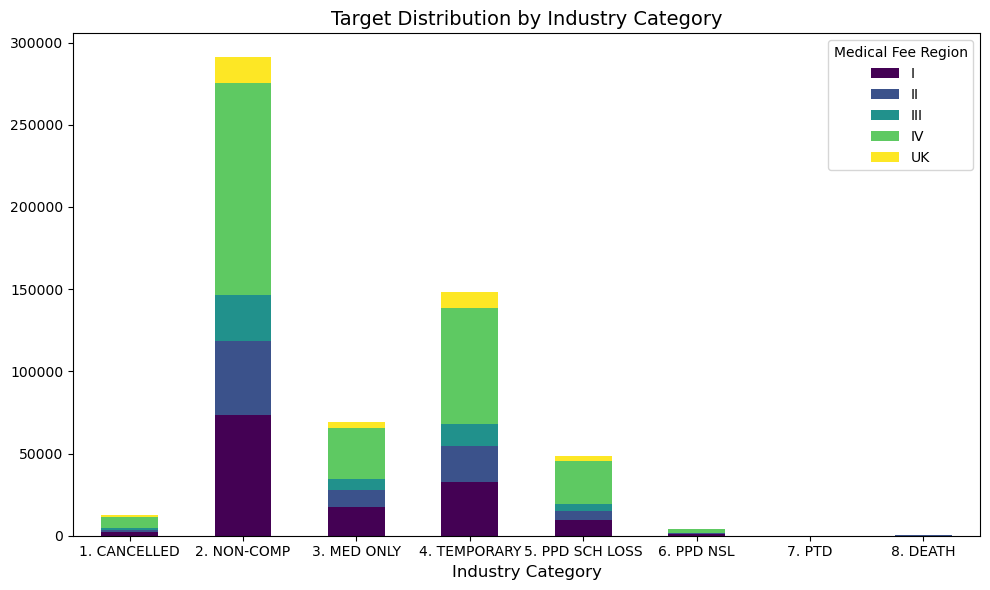

In [106]:
#Plot the stacked column chart
target_counts = df.groupby(['Claim Injury Type', 'Medical Fee Region']).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhado
target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Target Distribution by Industry Category", fontsize=14)  # Adiciona título
plt.xlabel("Industry Category", fontsize=12)  # Rótulo do eixo X
plt.xticks(rotation=0)  # Ajusta rotação das categorias
plt.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()

No big distinction in the target values when Medical Fee Region is missing so we will stick with a missing value

In [107]:
df['Medical Fee Region'].replace({'I': 1,'II': 2,'UK': np.nan, 'III': 3, 'IV': 4}, inplace = True)
test['Medical Fee Region'].replace({'I': 1,'II': 2,'UK': np.nan, 'III': 3, 'IV': 4}, inplace = True)

##### Birth Year & Age at Injury

In [108]:
# Replacing the values of birth date equal to 0
df['Birth Year'] = df['Birth Year'].replace(0, np.nan)
test['Birth Year'] = test['Birth Year'].replace(0, np.nan)

There are a lot of values where the observations have an Age of 0, yet we have their ``Birth Year`` that clearly indicate that the age is incorrect.

In [109]:
df[(df['Age at Injury'] == 0) & (df['Birth Year'].notna())]

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394068,0.0,0.0,1,0.0,1959.0,STARR INDEMNITY & LIABILITY CO,1,2. NON-COMP,BRONX,0,NYC,1.0,0.0,23.0,CONSTRUCTION,4.0,0.0,0.0,0.0,NaN,0.0,6.0,0,0,0,3,1,0,NaN,NaN,2020,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393794,0.0,0.0,1,0.0,1984.0,LM INSURANCE CORP,1,2. NON-COMP,ONONDAGA,0,SYRACUSE,0.0,0.0,0.0,NaN,2.0,0.0,0.0,0.0,13212.0,0.0,4.0,0,0,0,0,1,0,NaN,NaN,2020,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393999,0.0,0.0,1,0.0,1967.0,ZURICH AMERICAN INSURANCE CO,1,1. CANCELLED,ALBANY,0,ALBANY,1.0,0.0,0.0,NaN,2.0,0.0,0.0,0.0,12209.0,0.0,6.0,0,0,0,0,1,0,NaN,NaN,2020,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5394824,0.0,0.0,1,0.0,1971.0,NEW HAMPSHIRE INSURANCE CO,1,1. CANCELLED,KINGS,0,NYC,1.0,0.0,32.0,MANUFACTURING,4.0,0.0,0.0,0.0,11231.0,0.0,1.0,0,0,0,3,1,0,NaN,NaN,2020,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5394616,0.0,0.0,0,0.0,1959.0,COUNTY OF NASSAU,3,2. NON-COMP,SUFFOLK,0,HAUPPAUGE,0.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,11701.0,0.0,6.0,0,0,0,0,1,0,NaN,NaN,2020,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163633,0.0,0.0,1,0.0,1967.0,STATE INSURANCE FUND,1,1. CANCELLED,QUEENS,0,NYC,0.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,11422.0,0.0,1.0,0,0,0,0,1,0,NaN,NaN,2022,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6164216,0.0,0.0,1,0.0,1961.0,COUNTY OF NASSAU,3,2. NON-COMP,NASSAU,0,NYC,1.0,0.0,92.0,PUBLIC ADMINISTRATION,4.0,52.0,31.0,13.0,11756.0,0.0,0.0,6,1,1,1,1,1,NaN,NaN,2022,12,30,NaN,NaN,NaN,2023.0,1.0,10.0,NaN,NaN
6164933,0.0,0.0,1,0.0,1972.0,LM INSURANCE CORP,1,2. NON-COMP,KINGS,0,NYC,1.0,0.0,23.0,CONSTRUCTION,4.0,60.0,78.0,39.0,11221.0,0.0,6.0,6,3,2,3,1,0,NaN,NaN,2022,12,30,NaN,NaN,NaN,2023.0,1.0,20.0,NaN,NaN


In [110]:
df[df['Accident Year'] - df['Birth Year'] == 0]

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


As we can see that there are **no observations where the age should be equal to 0**, we can assume that this will correspond to a **missing value** and replace it.

In [111]:
df['Age at Injury'] = df['Age at Injury'].replace(0, np.nan)
test['Age at Injury'] = test['Age at Injury'].replace(0, np.nan)

So, for these cases where we have their Birth Year and the Accident Year we are able to compute the ``Age at Injury`` of the observation.

In [112]:
#Calculate the age where the age is equal to 0 but we have Birth Year and Accident Year that says otherwise
df.loc[ #Correct these rows
    (df['Age at Injury'].isna()) & 
    (df['Birth Year'].notna()) & 
    (df['Accident Year'].notna()), #Ensure Birth Year and Accident Year exist
    'Age at Injury'
] = df['Accident Year'] - df['Birth Year']

test.loc[ 
    (test['Age at Injury'].isna()) & 
    (test['Birth Year'].notna()) & 
    (test['Accident Year'].notna()),
    'Age at Injury'
] = test['Accident Year'] - test['Birth Year']

Also, there appears to be some cases where where we have that the **``Age at Injury`` does not result from the ``Accident Year`` minus the ``Birth Year`` even applying the possible interval** (example: a person born in 2003, if they have an accident in 2024, can be either 21 or 20 years old).

In [113]:
df[(df['Birth Year'].notna()) &  # Ensure Birth Year is not NaN 
   ((df['Accident Year'] - df['Birth Year'] != df['Age at Injury']) & 
    (df['Accident Year'] - df['Birth Year'] - 1 != df['Age at Injury']))]

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393780,62.0,0.0,0,0.00,1958.0,NEW HAMPSHIRE INSURANCE CO,1,2. NON-COMP,SUFFOLK,0,HAUPPAUGE,1.0,0.0,44.0,RETAIL TRADE,4.0,56.0,10.0,10.0,11701.0,0.0,6.0,6,1,1,2,0,0,2.0,1.0,2020,1,1,2019.0,12.0,30.0,2019.0,12.0,31.0,0.0,1.0
5394600,53.0,0.0,0,0.00,1967.0,SAFETY NATIONAL CASUALTY CORP,1,2. NON-COMP,QUEENS,0,NYC,0.0,0.0,45.0,RETAIL TRADE,4.0,12.0,49.0,35.0,11378.0,0.0,6.0,2,3,1,2,0,0,4.0,4.0,2020,1,2,2019.0,12.0,29.0,2020.0,1.0,2.0,1.0,1.0
5394588,32.0,0.0,0,NaN,1988.0,CHARTER OAK FIRE INS CO,1,2. NON-COMP,WESTCHESTER,0,NYC,1.0,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,3.0,16.0,40.0,36.0,10550.0,0.0,0.0,3,3,1,1,0,0,2.0,2.0,2020,1,2,2019.0,12.0,31.0,2020.0,1.0,2.0,1.0,1.0
5394760,54.0,0.0,0,0.00,1966.0,SYOSSET CSD,3,2. NON-COMP,NASSAU,0,NYC,0.0,0.0,61.0,EDUCATIONAL SERVICES,4.0,31.0,10.0,90.0,11803.0,0.0,3.0,4,6,1,1,0,0,13.0,13.0,2020,1,2,2019.0,12.0,20.0,2020.0,1.0,2.0,1.0,1.0
5394237,49.0,0.0,0,0.00,1971.0,"ROSINA FOOD PRODUCTS, INC.",4,2. NON-COMP,ERIE,0,BUFFALO,1.0,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,2.0,17.0,40.0,33.0,14204.0,0.0,1.0,3,3,1,2,0,0,2.0,2.0,2020,1,2,2019.0,12.0,31.0,2020.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165334,36.0,0.0,1,1304.99,1987.0,HARTFORD ACCIDENT & INDEMNITY,1,5. PPD SCH LOSS,BRONX,0,NYC,1.0,4.0,45.0,RETAIL TRADE,4.0,53.0,52.0,90.0,10466.0,0.0,0.0,6,6,1,2,0,1,3.0,3.0,2022,12,30,2022.0,12.0,27.0,2022.0,12.0,30.0,0.0,0.0
6164931,NaN,0.0,1,0.00,1957.0,"CNY OTHER THAN ED, HED WATER",3,1. CANCELLED,KINGS,0,NYC,1.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,11221.0,0.0,0.0,0,0,0,0,1,0,NaN,NaN,2022,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165305,58.0,0.0,1,687.55,1965.0,A I U INSURANCE COMPANY,1,4. TEMPORARY,SUFFOLK,0,HAUPPAUGE,0.0,4.0,48.0,TRANSPORTATION AND WAREHOUSING,4.0,29.0,52.0,90.0,11772.0,0.0,2.0,4,6,1,2,1,1,8.0,8.0,2022,12,30,2022.0,12.0,22.0,2022.0,12.0,30.0,0.0,0.0


Correct those **age** values calculated by the ``Accident Year`` minus ``Birth Year``

In [114]:
df.loc[
    (df['Birth Year'].notna()) & (df['Accident Year'].notna()) &  # Ensure Birth Year is not NaN
    ((df['Accident Year'] - df['Birth Year'] != df['Age at Injury']) & 
     (df['Accident Year'] - df['Birth Year'] - 1 != df['Age at Injury'])),  # Ensure inconsistency
    'Age at Injury'
] = df['Accident Year'] - df['Birth Year']  # Correct Age at Injury

test.loc[
    (test['Birth Year'].notna()) & (test['Accident Year'].notna()) &  # Ensure Birth Year is not NaN
    ((test['Accident Year'] - test['Birth Year'] != test['Age at Injury']) & 
     (test['Accident Year'] - test['Birth Year'] - 1 != test['Age at Injury'])),  # Ensure inconsistency
    'Age at Injury'
] = test['Accident Year'] - test['Birth Year']  # Correct Age at Injury

Since the features ``Birth Year``, ``Accident Year`` and ``Age at Injury`` are all connected, we can calculate one if the we have values for the other two (example: we can compute a missing value for Birth Year if we have values for both Age at Injury and Accident Year). And, with that we will **compute missing values where we are able to do that**.

In [115]:
#Fill the missing values of Birth Year if we have the accident year and the age at injury already
df.loc[
    (df['Birth Year'].isna()) &  # Birth Year is present
    (df['Accident Year'].notna()) &  # Accident Year is not NaN
    (df['Age at Injury'].notna()),  # Age at Injury is not NaN
    'Birth Year'
] = df['Accident Year'] - df['Age at Injury']

test.loc[
    (test['Birth Year'].isna()) &  # Birth Year is present
    (test['Accident Year'].notna()) &  # Accident Year is not NaN
    (test['Age at Injury'].notna()),  # Age at Injury is not NaN
    'Birth Year'
] = test['Accident Year'] - test['Age at Injury']

In [116]:
#Fill the missing values in Accident Year for these cases 
df.loc[
    (df['Birth Year'].notna()) &  # Birth Year is present
    (df['Accident Year'].isna()) &  # Accident Year is not NaN
    (df['Age at Injury'].notna()),  # Age at Injury is not NaN
    'Accident Year'
] = df['Age at Injury'] + df['Birth Year']

test.loc[
    (test['Birth Year'].notna()) &  # Birth Year is present
    (test['Accident Year'].isna()) &  # Accident Year is not NaN
    (test['Age at Injury'].notna()),  # Age at Injury is not NaN
    'Accident Year'
] = test['Age at Injury'] + test['Birth Year']

Create a new feature named ``Age Group`` where we will assign the midpoint of the age group they were assigned to. 
* While **"Young Adults", "Middle-aged Adults" and "Older Adults"** were more or less **made in an arbitrary way assuring that the interval between all ages were similar**, we wanted to make sure were **properly separating "Minors" and "Eldery"** (corresponds to the retirement in the USA) people since we are dealing with workplace injuries and we believe separating this **"uncommon" working ages** was revelant.

In [117]:
def categorize_age(age):
    if age <= 17:
        return 15  # Midpoint of 'Minors' (we will assume a minimum of 14 due to the observations we made previously on some weird age register <13)
    elif 18 <= age <= 33:
        return 25.5  # Midpoint of 'Young adults' 
    elif 34 <= age <= 49:
        return 41.5  # Midpoint of 'Middle-aged adults' 
    elif 50 <= age <= 65:
        return 57.5  # Midpoint of 'Older adults' 
    elif age >= 66:
        return 75.5  # Midpoint of 'Elderly' (a max of 80 years will be assumed)
    else:
        return np.nan  # Return NaN for any invalid or missing age

# Apply the function to create the 'Age Group' column
df['Age Group'] = df['Age at Injury'].apply(categorize_age)
test['Age Group'] = test['Age at Injury'].apply(categorize_age)

In [118]:
df['Age Group'].value_counts()

41.5    193145
57.5    178498
25.5    174972
75.5     19919
15.0      2121
Name: Age Group, dtype: int64

The values are more or less well distributed so we can continue. It is important to note that we have **significantly less values for 'Minors' and 'Elderly'** but we believe that it is **important do disctint them from the rest** since they might have **different carachteristics compared to others** (few if any wage if they have some sort of work for example).

After dealing with most of the categorical data we will see again the missing values and the statistics to see if we check any significant change from the original dataset to the one we have now (for this specific thing we will only consider matching collumns for better interpretation).

In [119]:
# Select common columns between df and data
common_columns = df.columns.intersection(data_original.columns)

# Count missing values in common columns for both DataFrames
missing_comparison = pd.DataFrame({
    'Missing in original data': data_original[common_columns].isna().sum(),
    'Missing now': df[common_columns].isna().sum()
})

# Display the comparison table
missing_comparison

,Missing in original data,Missing now
Age at Injury,0,5371
Alternative Dispute Resolution,0,5
Attorney/Representative,0,0
Average Weekly Wage,28651,28651
Birth Year,29078,2186
Carrier Name,0,0
Carrier Type,0,0
Claim Injury Type,0,0
County of Injury,0,1197
COVID-19 Indicator,0,0


There already exist a **significant decrease in missing values** and, for the cases where the missing values were increased, we have to remember some **NaN's were "hidden"** with some string indicating things like "UNKNOWN", hence some increases in missing values.

### Dealing with Average Weekly Wage

It will be clear later that this variable has a **really strong correlation** with the target.
The problem here is that **we have a lot of zeros** in this and it **might indicate the absence of records**. The first approach would probably be deleting it, but we will try to avoid and thus we will need really deep investigation in this feature

We will firstly see what were the **target values** for the different types of Weekly Wages (we will only consider **=0**, **>0** or **NaN**)

In [120]:
df[df['Average Weekly Wage'] == 0]['Claim Injury Type'].value_counts()

2. NON-COMP        275759
3. MED ONLY         39582
1. CANCELLED        11735
4. TEMPORARY         8236
8. DEATH               92
6. PPD NSL             28
5. PPD SCH LOSS        18
Name: Claim Injury Type, dtype: int64

In [121]:
df[df['Average Weekly Wage'] > 0]['Claim Injury Type'].value_counts()

4. TEMPORARY       132851
5. PPD SCH LOSS     45871
3. MED ONLY         25928
6. PPD NSL           3984
2. NON-COMP           749
8. DEATH              351
1. CANCELLED           98
7. PTD                 93
Name: Claim Injury Type, dtype: int64

In [122]:
df[df['Average Weekly Wage'].isna()]['Claim Injury Type'].value_counts()

2. NON-COMP        14570
4. TEMPORARY        7420
3. MED ONLY         3396
5. PPD SCH LOSS     2391
1. CANCELLED         644
6. PPD NSL           199
8. DEATH              27
7. PTD                 4
Name: Claim Injury Type, dtype: int64

With these, will plot a **stacked column chart** to have a better understanding visually of how each target value behaves based on the wage and see if we spot anything

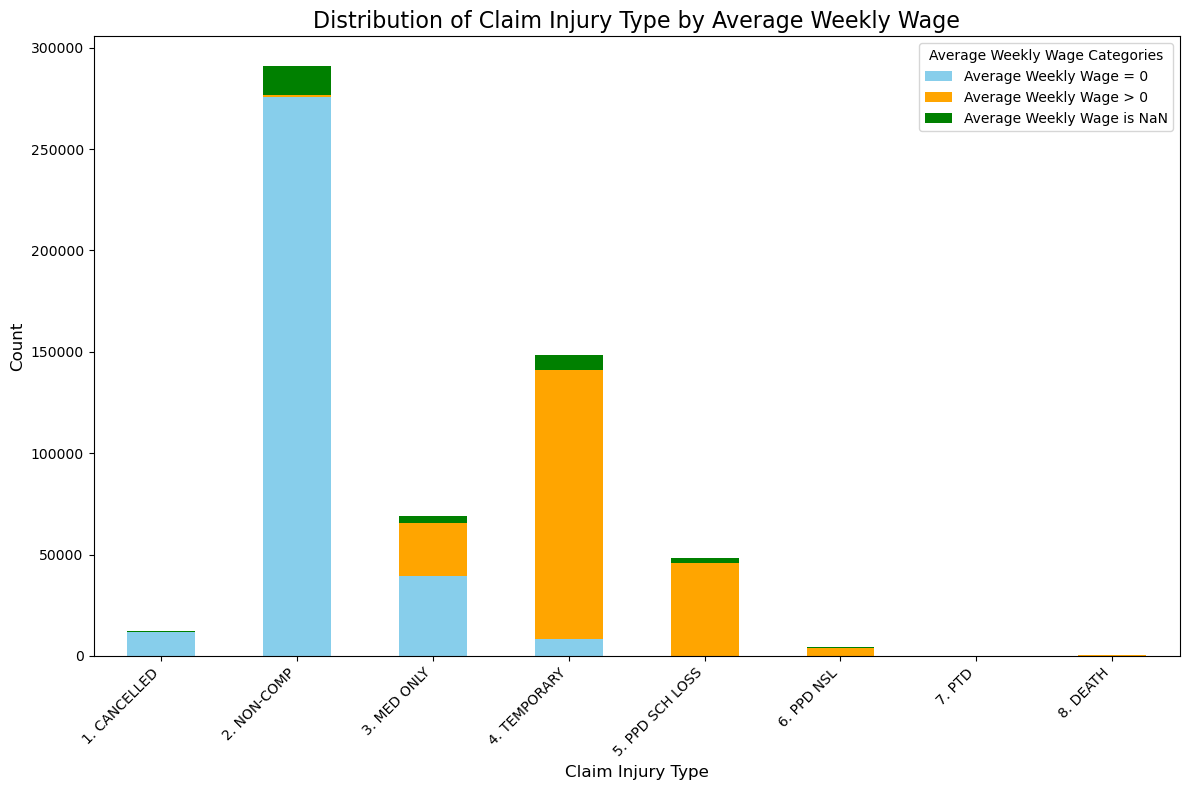

In [123]:
# Calculate the counts for each 'Claim Injury Type' based on 'Average Weekly Wage' conditions
counts_wage_zero = df[df['Average Weekly Wage'] == 0]['Claim Injury Type'].value_counts()
counts_wage_gt_zero = df[df['Average Weekly Wage'] > 0]['Claim Injury Type'].value_counts()
counts_wage_missing = df[df['Average Weekly Wage'].isna()]['Claim Injury Type'].value_counts()

# Combine the counts into a single DataFrame
df_counts = pd.DataFrame({
    "Claim Injury Type": counts_wage_zero.index.union(counts_wage_gt_zero.index).union(counts_wage_missing.index),
    "Average Weekly Wage = 0": counts_wage_zero.reindex(counts_wage_zero.index.union(counts_wage_gt_zero.index).union(counts_wage_missing.index), fill_value=0).values,
    "Average Weekly Wage > 0": counts_wage_gt_zero.reindex(counts_wage_zero.index.union(counts_wage_gt_zero.index).union(counts_wage_missing.index), fill_value=0).values,
    "Average Weekly Wage is NaN": counts_wage_missing.reindex(counts_wage_zero.index.union(counts_wage_gt_zero.index).union(counts_wage_missing.index), fill_value=0).values
})

# Set the 'Claim Injury Type' as the index
df_counts.set_index("Claim Injury Type", inplace=True)

# Create the stacked bar chart
df_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=["skyblue", "orange", "green"])

# Setting Labels and Title
plt.title("Distribution of Claim Injury Type by Average Weekly Wage", fontsize=16)
plt.xlabel("Claim Injury Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Average Weekly Wage Categories", fontsize=10)
plt.tight_layout()

# Display the chart
plt.show()

In [124]:
# Count rows where Claim Injury Type = Cancelled
all_canceled = df[(df['Claim Injury Type'] == '1. CANCELLED')].shape[0]

# Count rows where Claim Injury Type = Cancelled and Average Weekly Wage > 0
wage_grt_0 = df[(df['Claim Injury Type'] == '1. CANCELLED') & (df['Average Weekly Wage'] > 0)].shape[0]

# Calculate percentage
percentage_wage_grt_0 = (wage_grt_0 / all_canceled) * 100

# Display the results
print(f"All the lines where Claim Injury Type = Cancelled: {all_canceled}")
print(f"Lines with 'Average Weekly Wage > 0': {wage_grt_0} ({percentage_wage_grt_0:.2f}%)")

All the lines where Claim Injury Type = Cancelled: 12477
Lines with 'Average Weekly Wage > 0': 98 (0.79%)


As we can see here for example **only 0.79% of the Cancelled observations had a wage > 0**.

Repeat the process for other target values that seem more or less homogeneous

In [125]:
# Count rows where Claim Injury Type = '2. NON-COMP'
all_non_comp = df[(df['Claim Injury Type'] == '2. NON-COMP')].shape[0]

# Count rows where Claim Injury Type = '2. NON-COMP' and Average Weekly Wage > 0
wage_grt_0_non_comp = df[(df['Claim Injury Type'] == '2. NON-COMP') & (df['Average Weekly Wage'] > 0)].shape[0]

# Calculate percentage
percentage_wage_grt_0_non_comp = (wage_grt_0_non_comp / all_non_comp) * 100

# Display the results
print(f"All the lines where Claim Injury Type = '2. NON-COMP': {all_non_comp}")
print(f"Lines with 'Average Weekly Wage > 0': {wage_grt_0_non_comp} ({percentage_wage_grt_0_non_comp:.2f}%)")

All the lines where Claim Injury Type = '2. NON-COMP': 291078
Lines with 'Average Weekly Wage > 0': 749 (0.26%)


We can see that having ``Average Weekly Wage`` **= 0 or > 0 really affect the final output of the Claim** and this indicate that for this specific feature **we have to be really careful of how we are going to deal with the missing data**. With this in mind we will **treat this after the split** to really **prevent any leakage of data**.

#### More Feature Engineering

In a very specific case where we don't have an ``Industry Code`` (it now means that code = 0) atributed for the claimer, we will consider them as **unemployed** or **volunteers**. With these cases we will atribute the **Weekly Wage = 0**

In [126]:
df.loc[df['Industry Category'] == 0 & (df['Average Weekly Wage'].isna()), 'Average Weekly Wage'] = 0
test.loc[test['Industry Category'] == 0 & (test['Average Weekly Wage'].isna()), 'Average Weekly Wage'] = 0

In [127]:
df[(df['Industry Category'] == 0) & (df['Average Weekly Wage']>0)]

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


No observered rows where ``Industry Category`` is 0 and the **wage was greater than 0**.

Change the text in the target to actual numbers to work after the split

In [128]:
df['Claim Injury Type'].replace({'1. CANCELLED': 1,'2. NON-COMP': 2,'3. MED ONLY': 3
                                 ,'4. TEMPORARY': 4, '5. PPD SCH LOSS': 5, '6. PPD NSL': 6, '7. PTD': 7, '8. DEATH': 8}, inplace = True)

Check the features that are still in the format of **object** so that we do not forget to treat them after splitting.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574026 entries, 5393875 to 6165075
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age at Injury                   568655 non-null  float64
 1   Alternative Dispute Resolution  574021 non-null  float64
 2   Attorney/Representative         574026 non-null  int64  
 3   Average Weekly Wage             545860 non-null  float64
 4   Birth Year                      571840 non-null  float64
 5   Carrier Name                    574026 non-null  object 
 6   Carrier Type                    574026 non-null  int64  
 7   Claim Injury Type               574026 non-null  int64  
 8   County of Injury                572829 non-null  object 
 9   COVID-19 Indicator              574026 non-null  int64  
 10  District Name                   574026 non-null  object 
 11  Gender                          569315 non-null  float64
 12  IME-4 Cou

## Split data 

For splitting the data, we will also drop ``Agreement Reached`` because this is a feature that does not belong to the test data (it is also a target variable that we will not predict for now).

In [130]:
X = df.drop(['Claim Injury Type', 'Agreement Reached'], axis=1)
y = df['Claim Injury Type']

In [131]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y, 
                                                  shuffle = True)

In [132]:
X_train

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Number of Dependents,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,23.0,0.0,0,0.00,1996.0,STATE INSURANCE FUND,1,CAYUGA,0,SYRACUSE,1.0,0.0,11.0,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",1.0,53.0,52.0,55.0,13143.0,3.0,6,5,1,3,0,0,3.0,3.0,2020,5,8,2020.0,5.0,5.0,2020.0,5.0,8.0,0.0,0.0,25.5
6023025,35.0,0.0,1,1097.00,1986.0,ZURICH AMERICAN INSURANCE CO,1,QUEENS,0,NYC,1.0,4.0,31.0,MANUFACTURING,4.0,31.0,10.0,65.0,11368.0,2.0,4,6,1,3,1,1,46.0,65.0,2022,6,25,2022.0,5.0,10.0,2022.0,7.0,14.0,0.0,0.0,41.5
5851908,41.0,0.0,1,623.35,1980.0,INDEMNITY INS. OF N AMERICA,1,MONROE,0,ROCHESTER,0.0,2.0,33.0,MANUFACTURING,1.0,56.0,52.0,38.0,14580.0,3.0,6,3,1,3,1,1,173.0,173.0,2021,11,8,2021.0,5.0,19.0,2021.0,11.0,8.0,0.0,0.0,41.5
5913931,58.0,0.0,1,1042.13,1963.0,INDEMNITY INS. OF N AMERICA,1,ALBANY,0,ALBANY,1.0,2.0,31.0,MANUFACTURING,1.0,32.0,49.0,32.0,12065.0,1.0,4,3,1,3,0,1,1.0,1.0,2022,2,4,2022.0,2.0,3.0,2022.0,2.0,4.0,0.0,0.0,57.5
5845976,58.0,0.0,0,NaN,1963.0,SECURITY NATIONAL INSURANCE CO,1,KINGS,0,NYC,0.0,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,4.0,29.0,90.0,90.0,11203.0,5.0,4,6,3,1,0,0,38.0,38.0,2021,10,29,2021.0,9.0,21.0,2021.0,10.0,29.0,0.0,0.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655355,65.0,0.0,0,0.00,1955.0,NEW HAMPSHIRE INSURANCE CO,1,SUFFOLK,1,HAUPPAUGE,0.0,0.0,44.0,RETAIL TRADE,4.0,83.0,83.0,60.0,11754.0,3.0,10,4,2,2,0,0,15.0,9.0,2021,2,11,2021.0,1.0,27.0,2021.0,2.0,5.0,0.0,0.0,57.5
5940234,34.0,0.0,1,2016.34,1987.0,STATE INSURANCE FUND,1,ULSTER,0,ALBANY,1.0,0.0,92.0,PUBLIC ADMINISTRATION,1.0,74.0,10.0,90.0,12477.0,3.0,8,6,1,1,1,0,15.0,27.0,2022,3,11,2022.0,2.0,24.0,2022.0,3.0,23.0,0.0,0.0,41.5
6073417,55.0,0.0,1,2232.97,1966.0,INDEMNITY INSURANCE CO OF,1,ONONDAGA,0,SYRACUSE,1.0,2.0,33.0,MANUFACTURING,1.0,56.0,49.0,53.0,13027.0,0.0,6,5,1,3,1,0,14.0,14.0,2022,8,30,2022.0,8.0,16.0,2022.0,8.0,30.0,0.0,0.0,57.5


We will **deal with the variables** that are still a **string** before advancing to further analysis

##### Carrier Name

Analyzing the name of the Carrier, we can see that there are a lot of values and different Carriers and with not a lot a values. Still we believe that the company responsible for the decision could be important because each company might have their standards for their decisions and hence we will atribute numbers for each Carrier and, if it only appears less then 100 times, we will rename as 'Other' so that our model won't just memorize the decisions made.

In [133]:
# Count occurrences of each unique value in 'Carrier Name'
carrier_counts = X_train['Carrier Name'].value_counts()

# Identify carriers with less than 100 occurrences
low_frequency_carriers = carrier_counts[carrier_counts < 100].index

# Replace the low-frequency carriers with a common value ('Other')
X_train['Carrier Name'] = X_train['Carrier Name'].replace(low_frequency_carriers, 'Other')

# Initialize the LabelEncoder
encoder_carrier = LabelEncoder()

# Fit the encoder on the modified 'Carrier Name' column
X_train['Carrier'] = encoder_carrier.fit_transform(X_train['Carrier Name'])

Repeat the process for **X_val** and **test**

It is important to note that, for **observations that appear either on X_val or test that were not present in X_train**, we will **set them as -1** so that we can tell the model that these are new observations unseen in the X_train.

In [134]:
# Replace low-frequency carriers with 'Other' using vectorized operations
X_val['Carrier Name'] = X_val['Carrier Name'].where(
    ~X_val['Carrier Name'].isin(low_frequency_carriers), 'Other'
)

test['Carrier Name'] = test['Carrier Name'].where(
    ~test['Carrier Name'].isin(low_frequency_carriers), 'Other'
)

# Transform categories using encoder_carrier in a vectorized way
carrier_classes = set(encoder_carrier.classes_)  # Convert to set for faster lookup
X_val['Carrier'] = X_val['Carrier Name'].map(
    lambda x: encoder_carrier.transform([x])[0] if x in carrier_classes else -1
)

test['Carrier'] = test['Carrier Name'].map(
    lambda x: encoder_carrier.transform([x])[0] if x in carrier_classes else -1
)

After enconding, we can drop the ``Carrier Name``.

In [135]:
X_train.drop('Carrier Name', axis=1, inplace=True)
X_val.drop('Carrier Name', axis=1, inplace=True)
test.drop('Carrier Name', axis=1, inplace=True)

##### County of Injury

We will fill the missing values in this feature with the **mode of the district they belong to** (that variable does not contain missing values) so that we assure our observation will make sense.

In [136]:
# Calculate the mode (most common value) of 'County of Injury' for each 'District Name'
mode_by_district = X_train.groupby('District Name')['County of Injury'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Create a function to fill NaN in 'County of Injury' based on 'District Name'
def fill_county_with_mode(row):
    if pd.isna(row['County of Injury']):
        return mode_by_district.get(row['District Name'], np.nan)  # Get the mode for the corresponding district, if exists
    else:
        return row['County of Injury']

# Apply the function to fill NaN values in 'County of Injury'
X_train['County of Injury'] = X_train.apply(fill_county_with_mode, axis=1)

# Apply the same procedure to X_val and test
X_val['County of Injury'] = X_val.apply(fill_county_with_mode, axis=1)

test['County of Injury'] = test.apply(fill_county_with_mode, axis=1)

In [137]:
# Step 1: Initialize the LabelEncoder
encoder_county = LabelEncoder()

# Step 2: Fit the encoder on the training data
encoder_county.fit(X_train['County of Injury'])

# Step 3: Transform the train set
X_train['County of Injury'] = encoder_county.transform(X_train['County of Injury'])

In [138]:
# Transform the validation and test set (apply -1 when a new observation that was not seen on training appears)
X_val['County of Injury'] = X_val['County of Injury'].apply(
    lambda x: encoder_county.transform([x])[0] if x in encoder_county.classes_ else -1
)

test['County of Injury'] = test['County of Injury'].apply(
    lambda x: encoder_county.transform([x])[0] if x in encoder_county.classes_ else -1
)

##### District Name

Encode using the same process as before.

In [139]:
# Initialize the LabelEncoder
encoder_district = LabelEncoder()

# Fit the encoder on the training data
encoder_district.fit(X_train['District Name'])

# Transform the train set
X_train['District'] = encoder_district.transform(X_train['District Name'])

In [140]:
# Convert encoder classes to a set for faster lookup
district_classes = set(encoder_district.classes_)

# Transform the validation set
X_val['District'] = X_val['District Name'].map(
    lambda x: encoder_district.transform([x])[0] if x in district_classes else -1
)

# Transform the test set
test['District'] = test['District Name'].map(
    lambda x: encoder_district.transform([x])[0] if x in district_classes else -1
)

In [141]:
X_train.drop('District Name', axis=1, inplace=True)
X_val.drop('District Name', axis=1, inplace=True)
test.drop('District Name', axis=1, inplace=True)

##### New feature ``Zip Code Frequency``

We will create a new variable named ``Zip Code Frequency`` where it will count the **ammount of times each Zip Code appears in the training data** so that we could somehow see ef frequent or rare Zip Codes have some influence in the decisions of Carriers. One important thing to note is that, cases where we have **new Zip Codes** either on the validation or test data, we will **fill this variable with 0** as a way to tell that "location" is "new".

In [142]:
# Count the occurrences of each Zip Code in X_train
zip_counts_train = X_train['Zip Code'].value_counts().to_dict()

# Create the 'Zip Code Frequency' variable in X_train
X_train['Zip Code Frequency'] = X_train['Zip Code'].map(zip_counts_train)

# Fill 'Zip Code Frequency' in X_val and test using the counts from X_train (fill with 0 new values)
X_val['Zip Code Frequency'] = X_val['Zip Code'].map(zip_counts_train).fillna(0)
test['Zip Code Frequency'] = test['Zip Code'].map(zip_counts_train).fillna(0)

#### Split metric and non metric features

Split this data for later visualizations of distribution of data, helping to make more sense and only applying certain changes when we are dealing with the treatment of outliers for example.

In [143]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Number of Dependents', 'Days Difference', 'Days To Process Report',
       'Assembly Year', 'Assembly Month', 'Assembly Day', 'Accident Year',
       'Accident Month', 'Accident Day', 'C-2 Year', 'C-2 Month', 'C-2 Day',
       'Years To Process Report', 'Years Difference', 'IME-4 Count', 'Zip Code Frequency', 'Age Group']
non_metric = X_train.drop(columns=metric_features + ['Industry Code Description']).columns.to_list()

'Industry Code Description' will not be considered in any because we are only keeping it on the dataset to use later to fill missing values and, once we do that we will remove it.

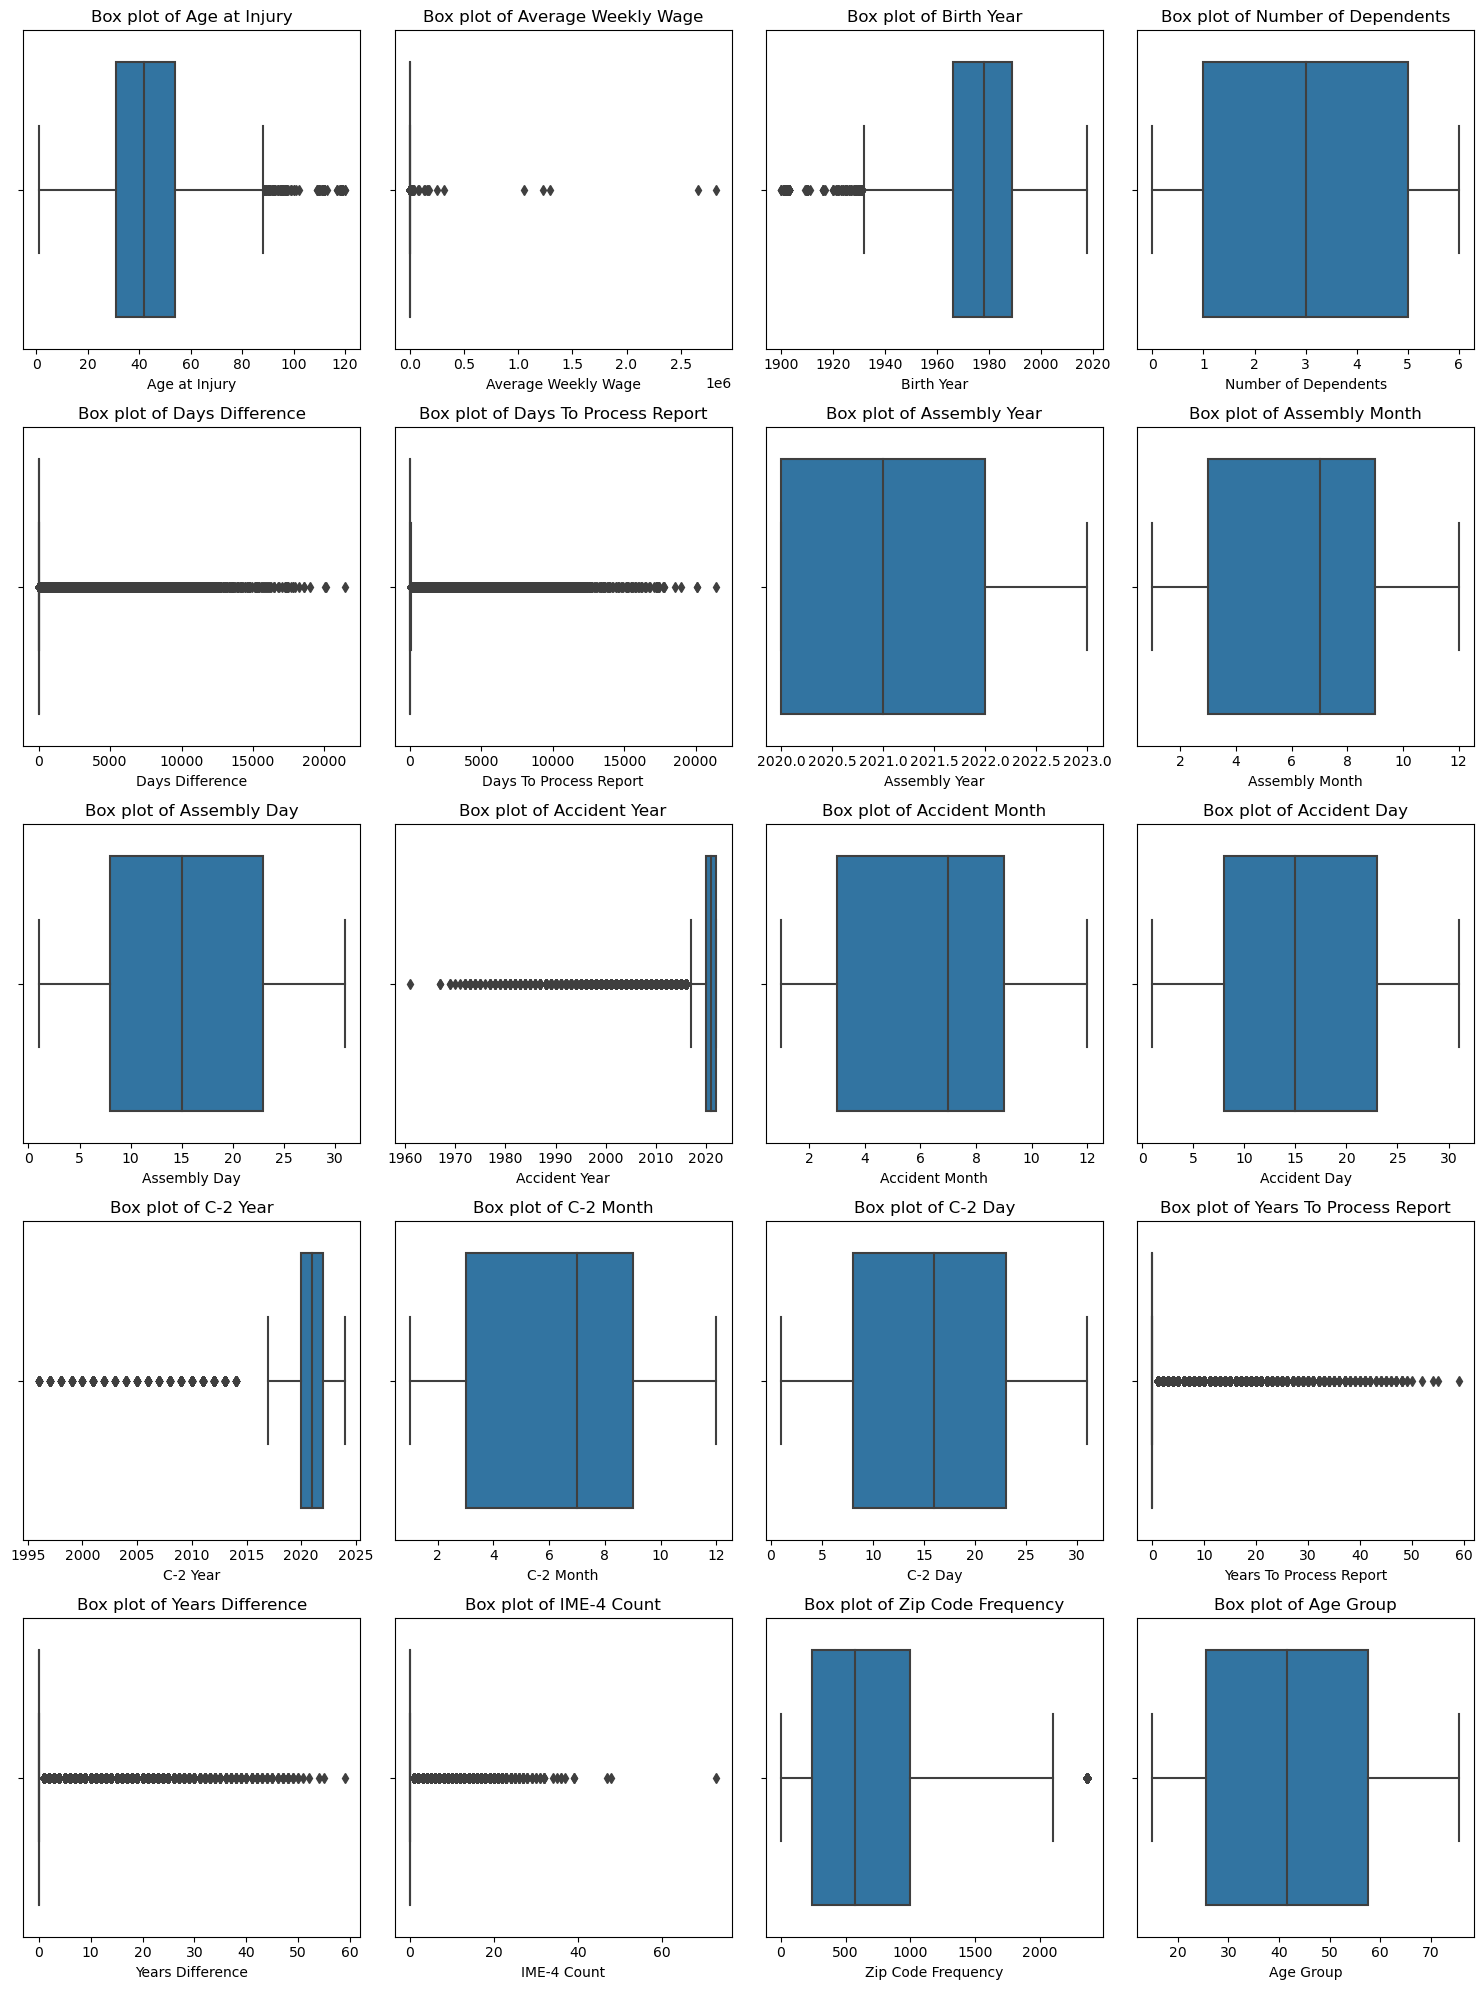

In [144]:
# Ensure numeric columns don't contain NaNs or inf values for boxplots
numeric_columns = metric_features

# Define grid dimensions based on the number of numeric columns
num_cols = 4  # Number of columns in the subplot grid
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Calculate rows needed

plt.figure(figsize=(15, num_rows * 4))  # Adjust figure size based on rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)

    sns.boxplot(x=X_train[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

**Create a copy** to later compute how many data did we loose from the outlier removal

In [145]:
X_original = X_train.copy()

#### Define manual limits to deal with certain outliers

We do not want to train certain values in the model which realistically, if they happen, will be very rare or extreme:
* **Accidents** that happened **before 2018** **will be ignored** since we believe (and even from the boxplot that can be seen) these are **very distant events** and of add few relevance for training.
* Exclude ``Average Weekly Wage`` **greater than 50k dollars** since we are considering **extremely rich people who are relatively rare cases** (we are giving an extra margin because, later, the distribution of these variable will be changed and the more extreme values are going to be converged.
* **Exclude ages that are either younger than 13 or older than 80** and the justifications for both are different:
    * **For those under 13**, although the boxplot does not show it as an outlier, it was seen at the beginning of this entire analysis that **these people revealed very strange data** that possibly **did not even correspond to children but rather to some possible miss input of data** (taking into account which were also only 32 observations is a tiny number that will not affect future predictions).
    * **For those over 80**, the justification that leads us to remove this data is that, in this case, although it is indeed possible for accidents to occur at work at these ages, as seen in the boxplot, **they are actual outliers** that demonstrate the **rarity of their occurrence** and hence we are not considering them for future model training.
* Exclude the really extreme values for ``IME-4 Count`` that are seen in the boxplot.

In [146]:
X_train = X_train[X_train['Accident Year'] >= 2018 | X_train['Accident Year'].isna()]
y_train = y_train[X_train.index]

In [147]:
X_train = X_train[(X_train['Average Weekly Wage'] < 50000) | X_train['Average Weekly Wage'].isna()] #Manual input to exclude the really rich outliers
y_train = y_train[X_train.index]  # Match y_train to X_train

In [148]:
X_train = X_train[(X_train['Age at Injury'] <= 80) & (X_train['Age at Injury'] >= 13) | X_train['Age at Injury'].isna()]
y_train = y_train[X_train.index]  # Match y_train to X_train

In [149]:
X_train = X_train[X_train['IME-4 Count'] <= 40]
y_train = y_train[X_train.index]

##### Using IQR for some features

Key points before using IQR and reasons why some variables were remained unchaged:
* For ``Days To Process Report`` and ``Days Difference``, we will only remove data belonging to the 90% percentile because, while the boxplots still indicate a big presence of possible outliers, their distribution is going to be changed later converging these more extreme values.
* ``Years To Process Report``'s and ``Years Difference``'s outliers also don't need to be treated because we already defined that we will only consider accidents from 2018 onwards, basically removing any possible extreme values here.

In [150]:
l1 = 0 #df[metric_features].quantile(.125)
l3 = X_train[metric_features].quantile(.9)  #Restricting to smaller values so that we don't remove so much data
lim = l3 - l1  # limit range

In [151]:
# Compute upper and lower limits for IQR
lower_lim = l1 - (1.5 * lim)
upper_lim = l3 + (1.5 * lim)

# Specify the columns to cap
columns_to_cap = ['Days To Process Report', 'Days Difference'] #Considering these features, there is no reason the remove the lower limits so we will 
filters_iqr = []                                                 #only consider the higher values to cut

# Apply the filters to each feature in the columns_to_cap
for feature in columns_to_cap:
    llim = lower_lim[feature]
    ulim = upper_lim[feature]
    filters_iqr.append(df[feature].between(llim, ulim, inclusive='neither')) 

# Combine the filters for all features into a single boolean series
filters_iqr_all = pd.Series(np.all(filters_iqr, axis=0), index=df.index)

# Use the boolean series to filter the DataFrame
X_train = X_train.loc[filters_iqr_all]

# Print the percentage of data kept after removing outliers
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train.shape[0] / X_original.shape[0], 4)), '%')
y_train = y_train[X_train.index]

Percentage of data kept after removing outliers: 91.86 %


We are removing **91.86%** of data which is still greater than the 5% recommended treshold but we firmly believe that we **dealt with the very extreme values that do not make sense** and would bias our model (for example: processes that took years to process are very few, rare and really do not make sense that something took 10 years to process).

Checking again the boxplots, we see that the most important outliers were removed.

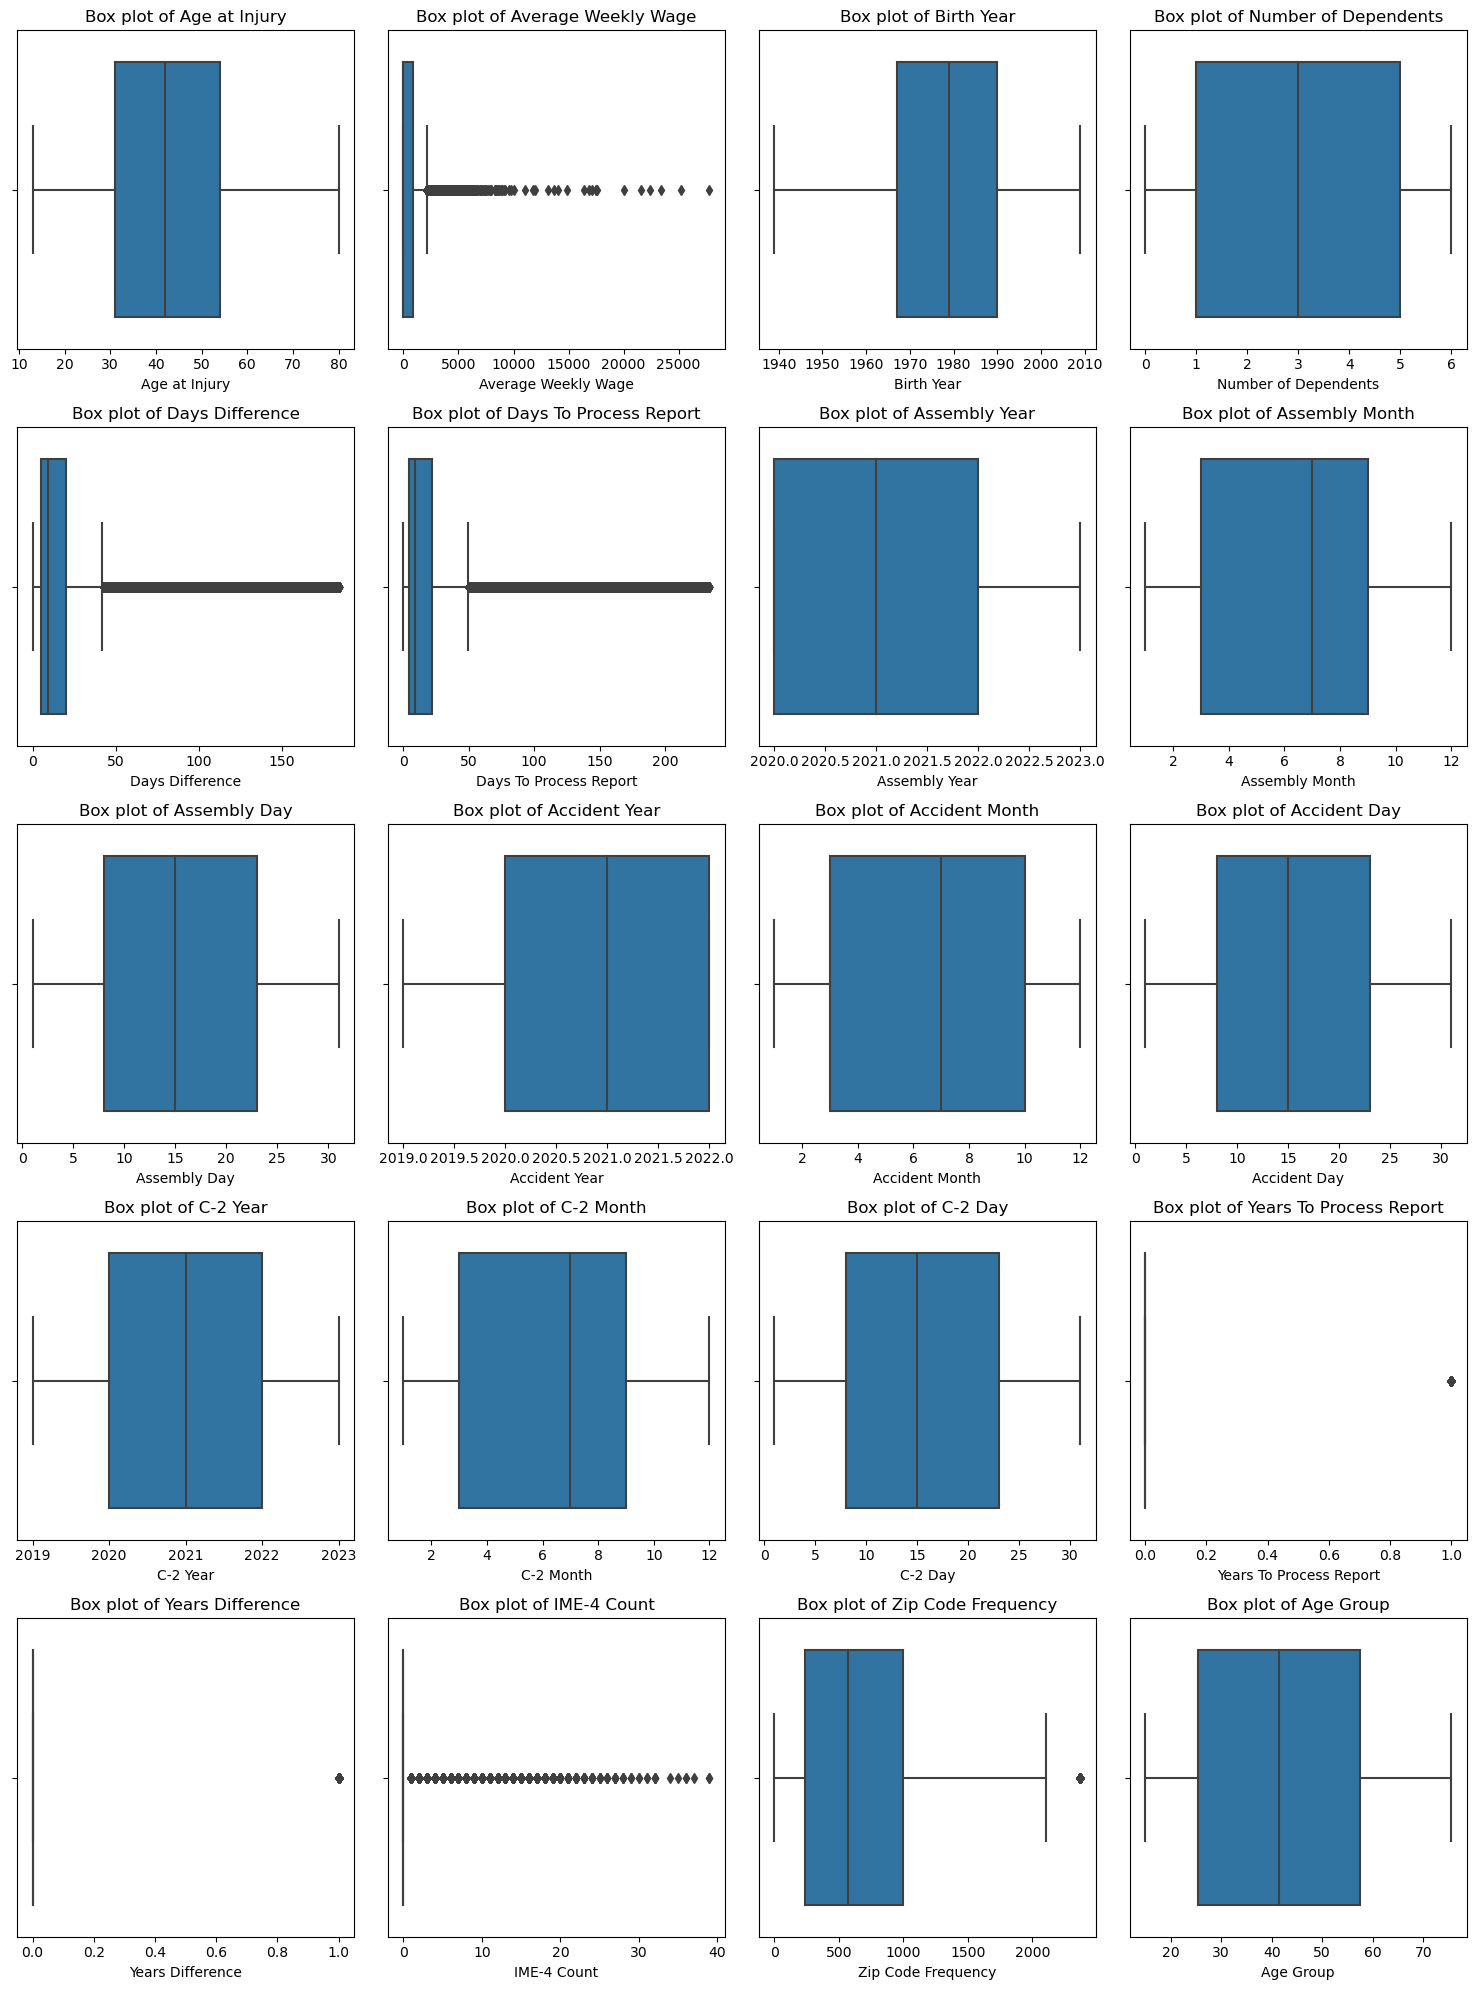

In [152]:
num_cols = 4  # Number of columns in the subplot grid
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Calculate rows needed

# Adjust figure size based on rows
plt.figure(figsize=(15, num_rows * 4))

# Create boxplots for each column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    
    # Filter out NaN and inf values for each column before plotting
    col_data = X_train[col].replace([np.inf, -np.inf], np.nan).dropna()
    sns.boxplot(x=col_data)
    plt.title(f"Box plot of {col}")

# Ensure the layout is tight for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()

#### Plot histograms for metric features

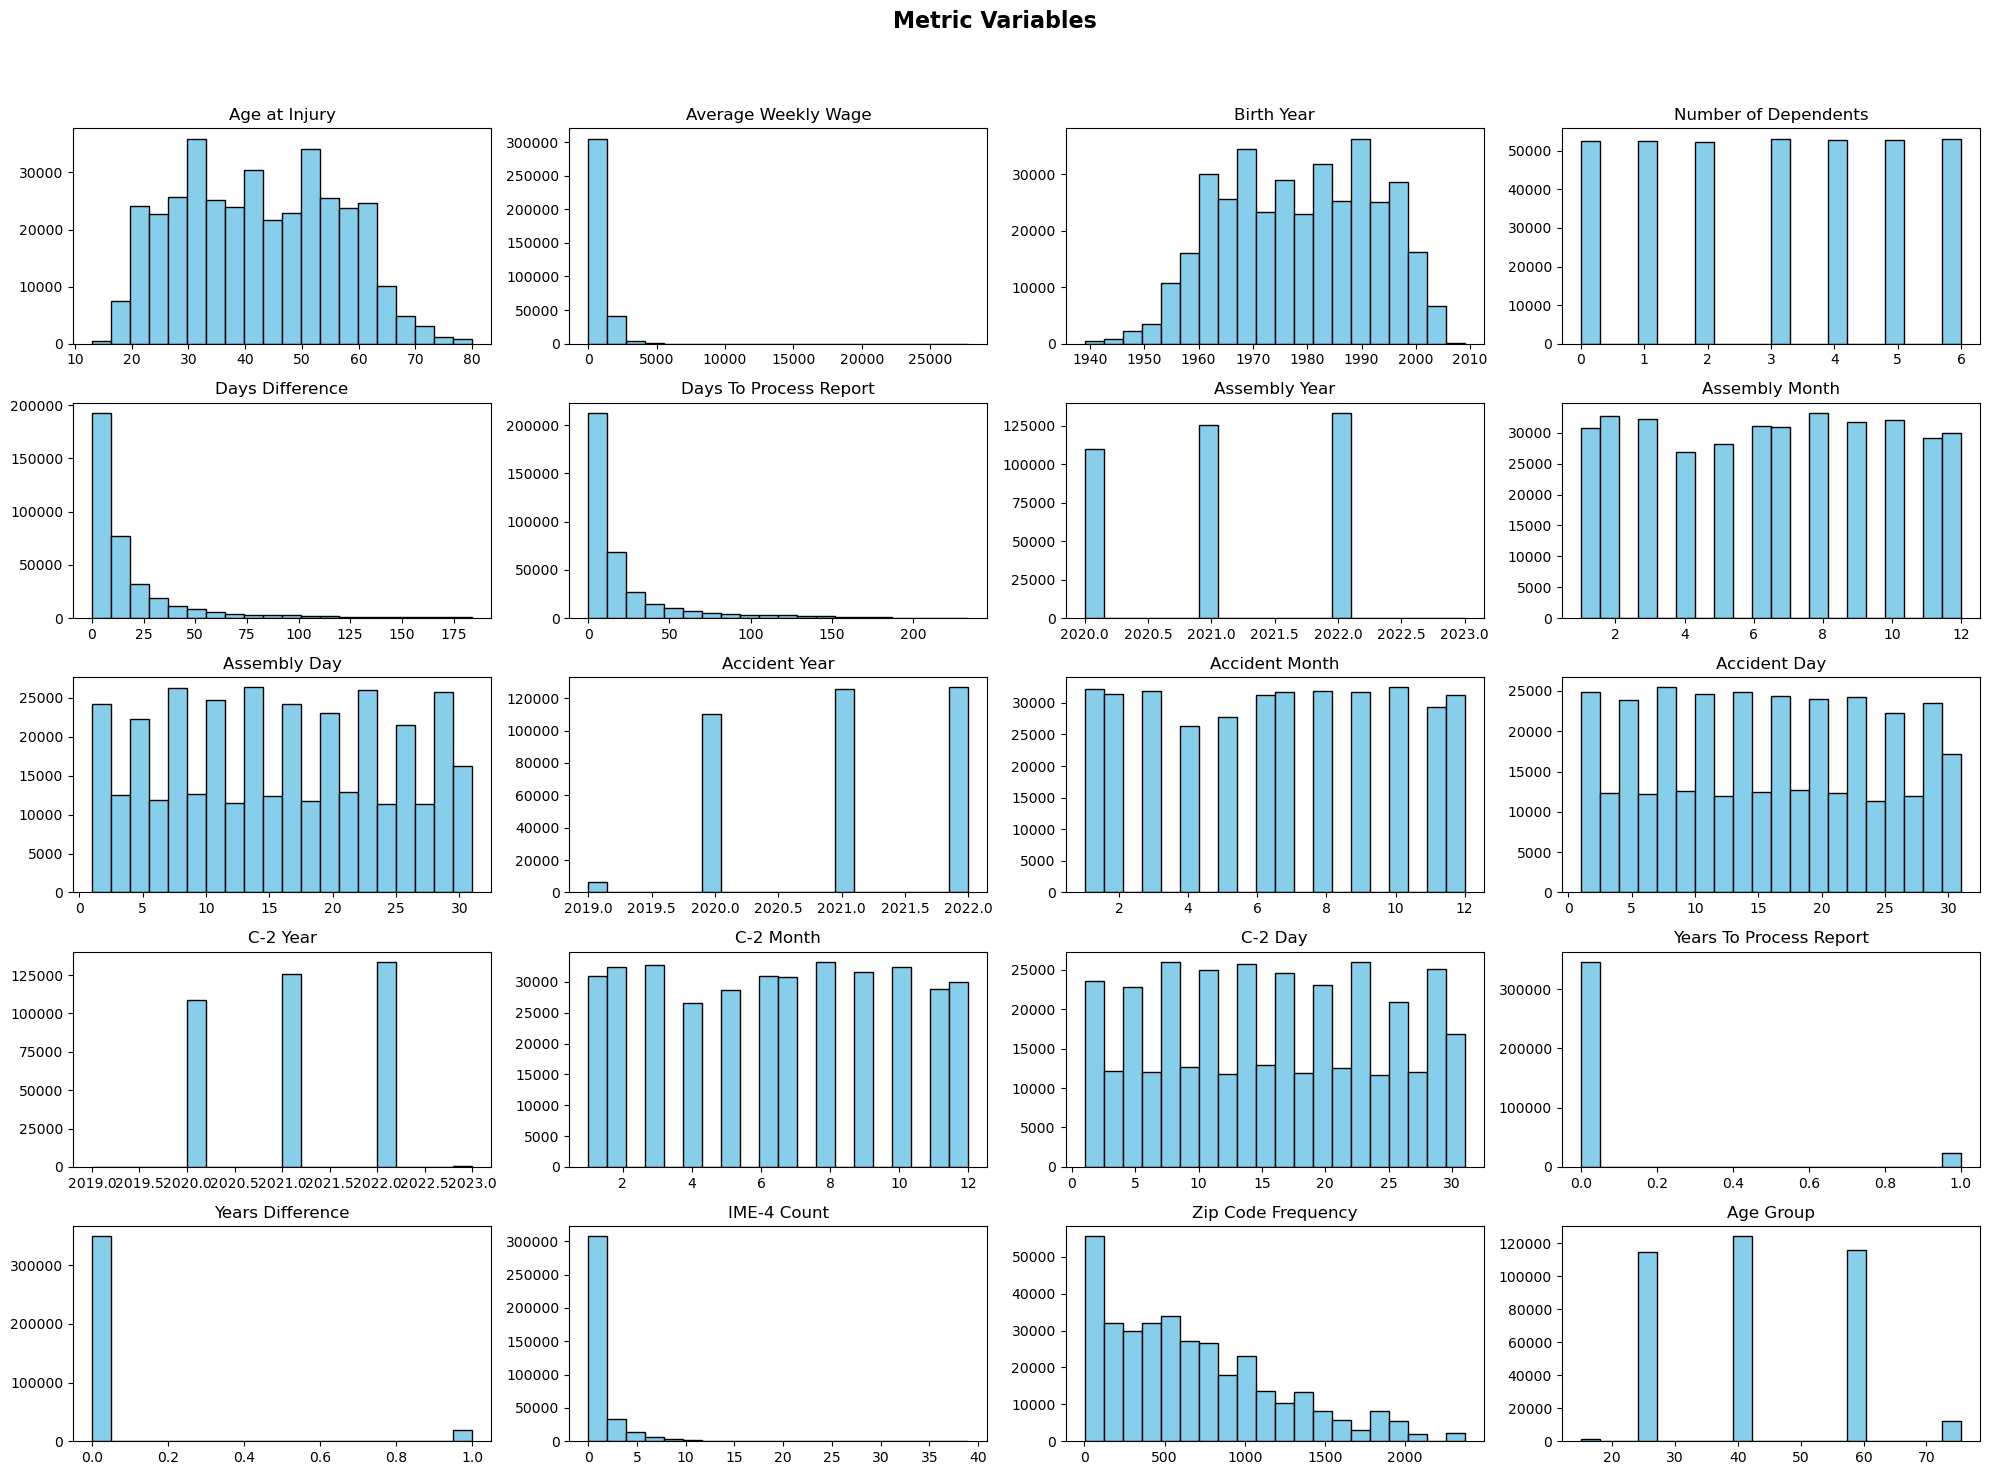

In [153]:
#Define the rows and columns
sp_cols = 4  
sp_rows = 5  

num_plots=len(metric_features) #Number of graphs that are going to be used

# Prepare figure
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 15))  # Adjusted figsize for better aesthetics

#Flatten axes array for easy iteration, handle cases where there are less cases compared to rows*cols
axes = axes.flatten()

#Plot histograms
for i, feat in enumerate(metric_features):
    ax = axes[i]
    ax.hist(X_train[feat].dropna(), bins=20, color='skyblue', edgecolor='black')  # Adjusted bin size and style
    ax.set_title(feat, fontsize=12)

#Hide any unused axes
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

#Add a centered title to the figure
fig.suptitle("Metric Variables", fontsize=16, weight='bold')

#Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

#Show the plot
plt.show()

##### Important things to take from this graph:
* ``Age at Injury`` is the closes variable that follows a **normal distribution**
* Features such as ``Average Weekly Wage``, ``Days Difference`` and ``Days To Process Report`` fpllow a right-skewed distribution and can be smoothed for better results
* ``IME-4 Count`` also resembles a right-skewed distribution but, since we already saw that all values are more or less close without anything extremely exaggerated, we consider that it will not be necessary to apply any changes to their distribution later.
* We no longer have observations that take **more than one year to process**
* As seen before in the kids example, the variable ``Number of Dependents`` behaves really strangely. We see that the values **range from 0 to 6 with almost the same number of distributions** and, taking into account the large number of observations in 6, it is surprising that **there is not a single person with 7 dependents**, for example. Taking this into account, **this variable will be dropped** given its lack of precision in reality.

In [154]:
X_train.drop('Number of Dependents', axis = 1, inplace = True)
X_val.drop('Number of Dependents', axis = 1, inplace = True)
test.drop('Number of Dependents', axis = 1, inplace = True)

In [155]:
# Update 'metric_features' to exclude columns that are no longer in X_train
metric_features = [col for col in metric_features if col in X_train.columns]

#### Plot histograms for non metric features

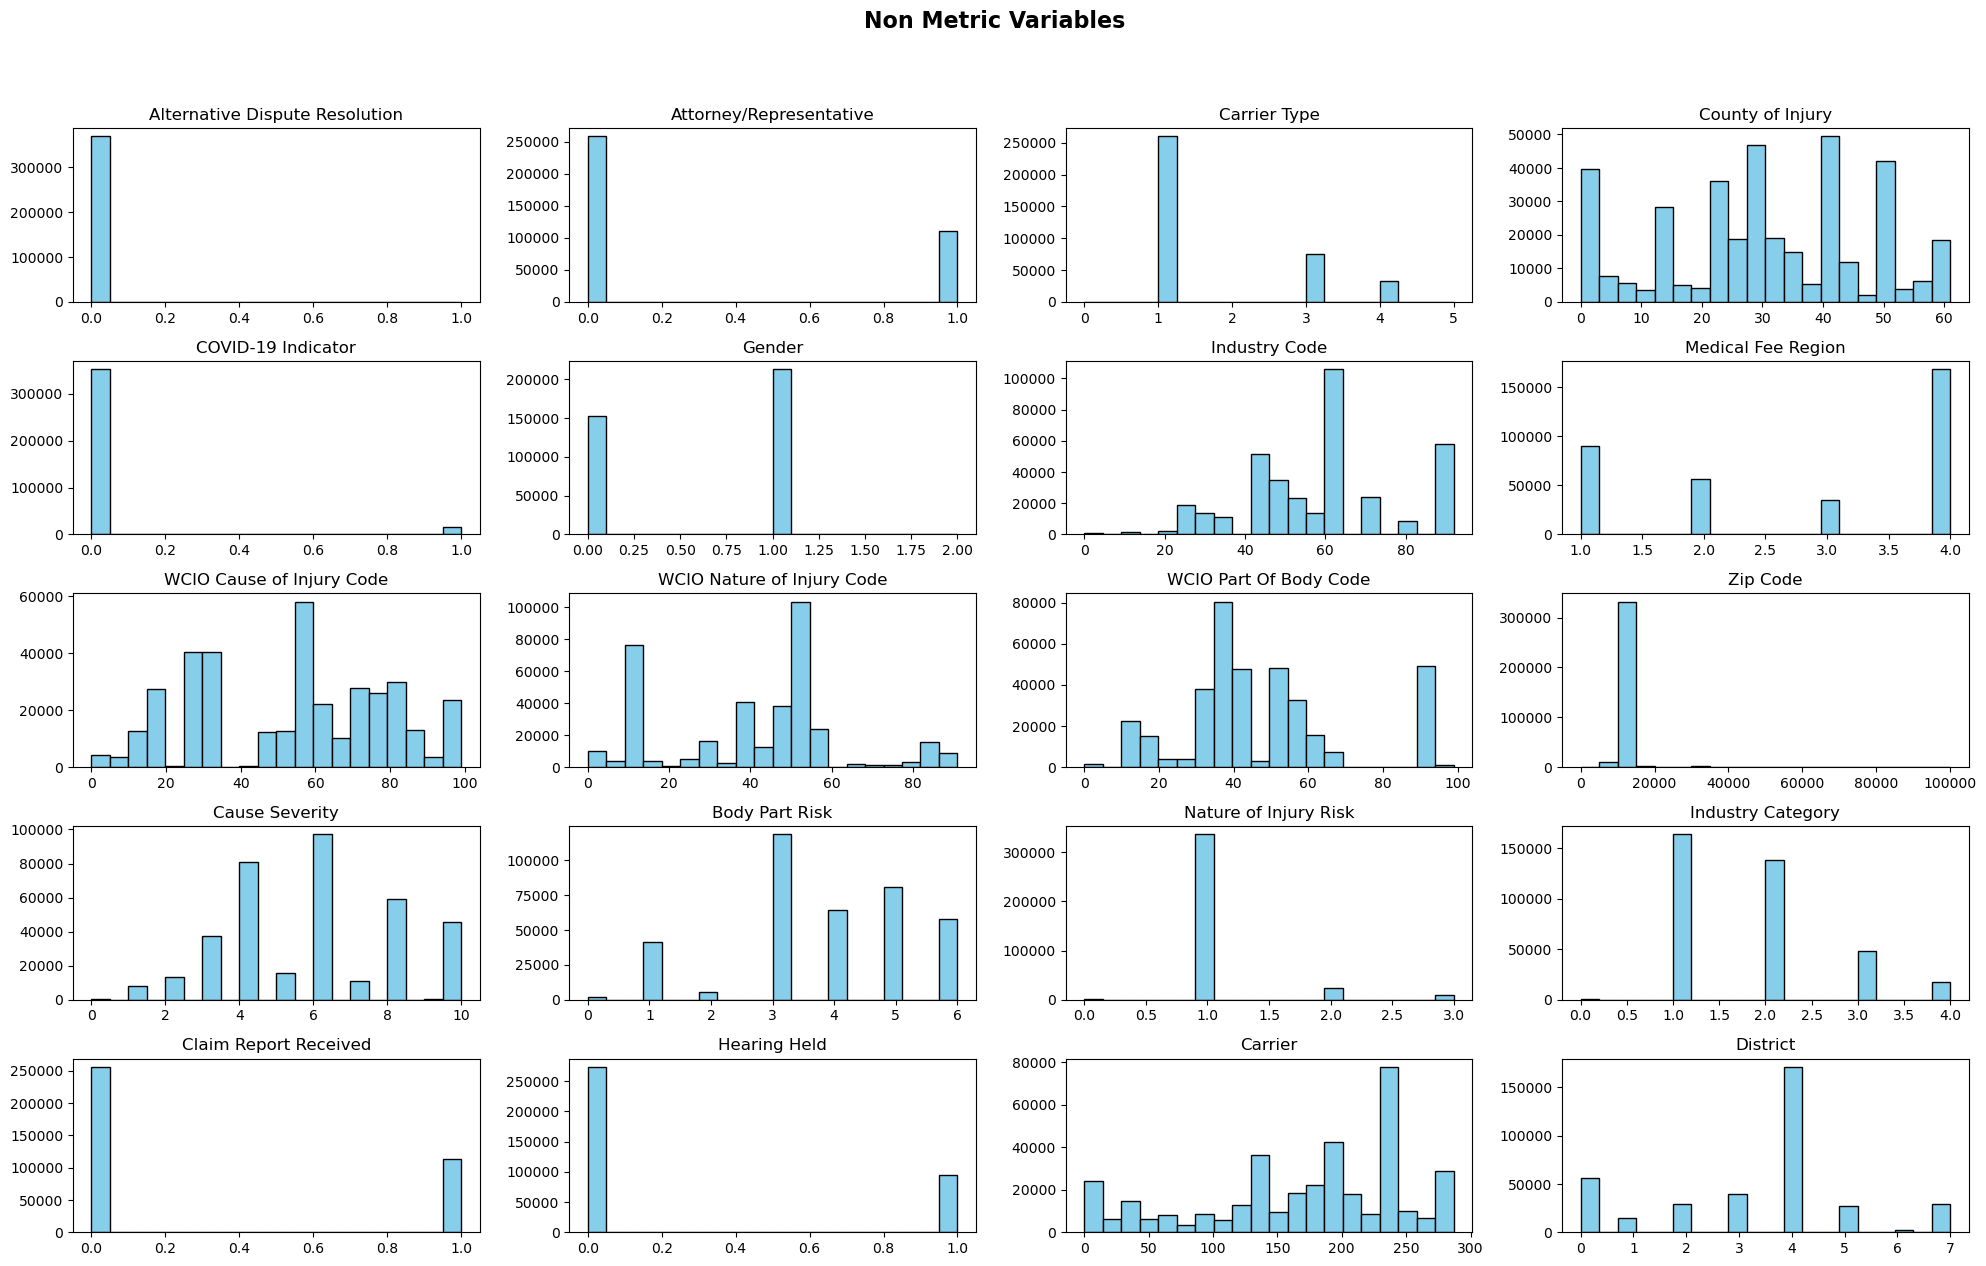

In [156]:
# Define the rows and columns
sp_cols = 4  
sp_rows = 6

num_plots=len(non_metric) #Number of graphs that are going to be used

# Prepare figure
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 15))  # Adjusted figsize for better aesthetics

# Flatten axes array for easy iteration, handle cases where axes are fewer than sp_rows * sp_cols
axes = axes.flatten()

# Plot histograms
for i, feat in enumerate(non_metric):
    ax = axes[i]
    ax.hist(X_train[feat].dropna(), bins=20, color='skyblue', edgecolor='black')  # Adjusted bin size and style
    ax.set_title(feat, fontsize=12)

# Hide any unused axes
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Add a centered title to the figure
fig.suptitle("Non Metric Variables", fontsize=16, weight='bold')

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

* ``Nature of Injury Risk`` is really predominant in one specific value (1) compared to the rest.
* The rest of the features have more or less expected behaviours given the analysis we did before.

### Average Weekly Wage

Still dealing with the missing values of Average Weekly Wage we will perform a **t-test for numeric variables** and a **chi-squared for categorical** in order to see which features have a bigger difference.

In [157]:
# Prepare the two groups
group_0 = X_train[X_train['Average Weekly Wage'] == 0]
group_gt_0 = X_train[X_train['Average Weekly Wage'] > 0]

# Initialize dictionaries to store the results
numeric_results = {}
categorical_results = {}

# List of specific columns to check numerically
specific_numeric_columns = metric_features

# Create a loop for all the columns
for column in X_train.columns:
    if column == 'Average Weekly Wage':  # Skip the splitting column
        continue

    if column in specific_numeric_columns:  # Restrict to specific numeric columns
        # Perform T-Test for numeric variables
        t_stat, _ = ttest_ind(
            group_0[column].dropna(),
            group_gt_0[column].dropna(),
            nan_policy='omit'
        )
        # Calculate the difference in the medians
        median_diff = group_gt_0[column].median() - group_0[column].median()  # Compute median difference
        numeric_results[column] = {
            'T-Statistic': t_stat,
            'Median Difference': median_diff
        }
    else:
        # Perform Chi-Square Test for categorical variables
        contingency_table = pd.crosstab(X_train[column], X_train['Average Weekly Wage'] > 0)
        chi2, _, dof, _ = chi2_contingency(contingency_table)
        categorical_results[column] = {
            'Chi2-Statistic': chi2
        }

# Convert results to DataFrames
numeric_results = pd.DataFrame(numeric_results).T
categorical_results = pd.DataFrame(categorical_results).T

numeric_results

,T-Statistic,Median Difference
Age at Injury,-64.800882,4.0
Birth Year,66.125464,-5.0
IME-4 Count,-288.019648,1.0
Days Difference,7.912551,2.0
Days To Process Report,-38.101377,2.0
Assembly Year,22.065310,0.0
Assembly Month,6.414920,0.0
Assembly Day,2.143097,-1.0
Accident Year,20.632171,0.0
Accident Month,6.239165,0.0


The **t-test** that most captured our attention was ``IME-4 Count`` and, although it's median difference is small (=1), we believe this is due to the fact of the existance of lots of 0's. We this in mind what we will do is compare when ``IME-4 Count`` = 0 and > 0.

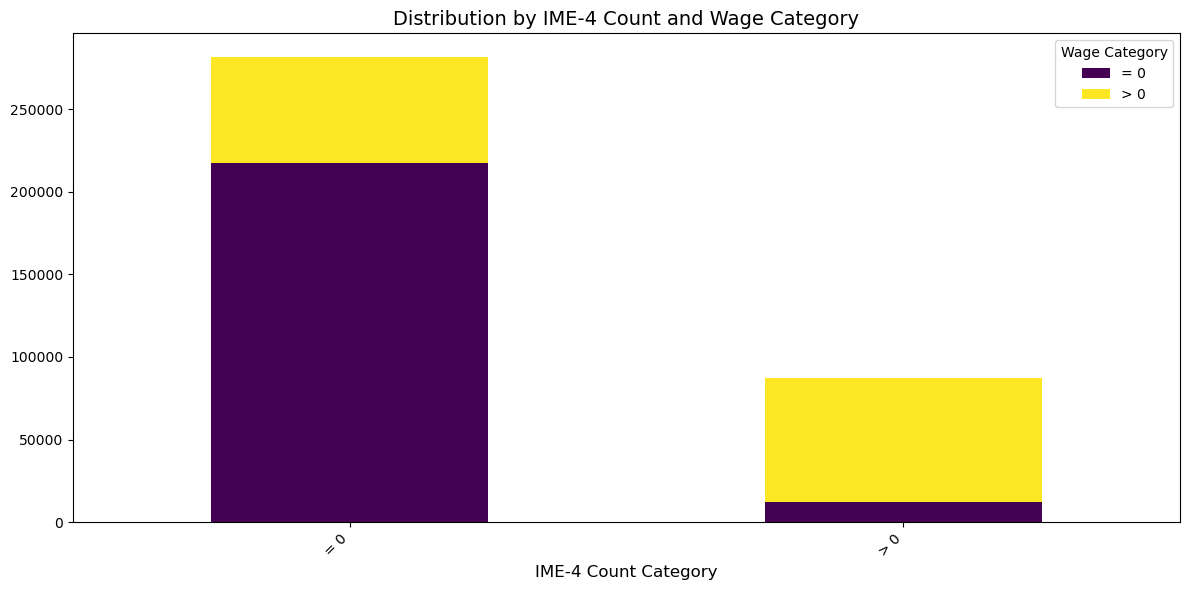

In [158]:
# Group and count values by 'IME-4 Count' (0 or >0) and whether 'Average Weekly Wage' is greater than 0
target_counts = X_train.groupby(
    [X_train['IME-4 Count'] > 0, X_train['Average Weekly Wage'] > 0]
).size().unstack()

# Rename columns for better legend clarity
target_counts.columns = ['= 0', '> 0']

# Rename index for better clarity in the x-axis
target_counts.index = ['= 0', '> 0']  # Representing IME-4 Count categories

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

# Add title and axis labels
plt.title("Distribution by IME-4 Count and Wage Category", fontsize=14)
plt.xlabel("IME-4 Count Category", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Adjust rotation of x-axis labels
plt.legend(title="Wage Category")  # Add legend title
plt.tight_layout()  # Adjust layout to avoid overlap

# Display the plot
plt.show()

In [159]:
categorical_results

,Chi2-Statistic
Alternative Dispute Resolution,4.602159
Attorney/Representative,111214.701189
Carrier Type,439.433009
County of Injury,3457.802965
COVID-19 Indicator,1607.569309
Gender,2250.248300
Industry Code,12838.438983
Industry Code Description,11321.763551
Medical Fee Region,1507.300996
WCIO Cause of Injury Code,23676.859143


The feature that most captured our attention based on the **highest value of chi-squared** is the Attorney/Representative so we will plot a stacked histogram in order to have a better visualization if there actually is a difference. (Wage cateogry is not considered for this case because this feature is literally based on the Average Weekly Wage variable)

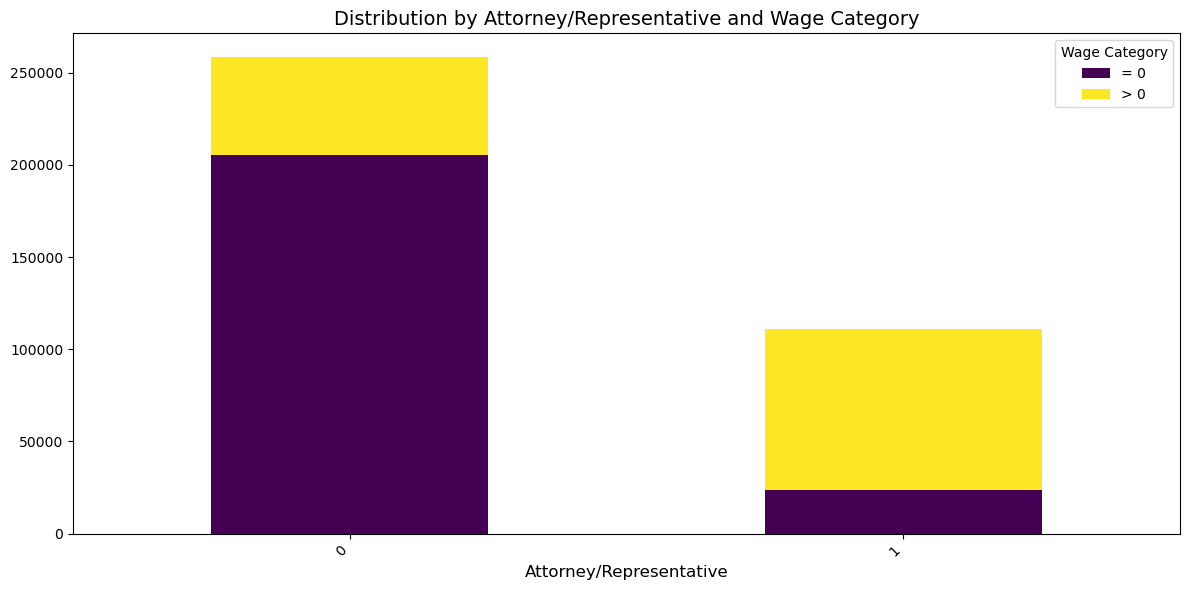

In [160]:
# Group and count values by 'Attorney/Representative' and whether 'Average Weekly Wage' is greater than 0
target_counts = X_train.groupby(
    ['Attorney/Representative', X_train['Average Weekly Wage'] > 0]
).size().unstack()

# Rename columns for better legend clarity
target_counts.columns = ['= 0', '> 0']

# Create the stacked bar chart
target_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

# Add title and axis labels
plt.title("Distribution by Attorney/Representative and Wage Category", fontsize=14)
plt.xlabel("Attorney/Representative", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Adjust rotation of x-axis labels
plt.legend(title="Wage Category")  # Add legend title
plt.tight_layout()  # Adjust layout to avoid overlap

# Display the plot
plt.show()

Out of the two graphs, ``IME-4 Count`` seems to be the one that actually has a biggest weight in determining wether the wage is = 0 or > 0 so we will base on that to fill its remaining missing values. 

### Fill missing values

Fill the **missing values** on the Average Weekly Wage we will do the opposite. **Fill their mean based on the Industry Code** they belong to.
* If ``IME-4 Count`` > 0: Fill ``Average Weekly Wage`` with the mean based on the Industry Code they belong
* If ``IME-4 Count`` = 0: Fill ``Average Weekly Wage`` also with 0

In [161]:
# Calculate average weekly salary by Industry Code in X_train
industry_mean_wages = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Fill the missing values in X_train
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(
    X_train.apply(
        lambda row: (
            industry_mean_wages[row['Industry Code']] if row['IME-4 Count'] > 0 
            else 0
        ),
        axis=1
    )
)

# Do the same for validation and test
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(
    X_val.apply(
        lambda row: (
            industry_mean_wages.get(row['Industry Code'], 0) if row['IME-4 Count'] > 0 
            else 0
        ),
        axis=1
    )
)

test['Average Weekly Wage'] = test['Average Weekly Wage'].fillna(
    test.apply(
        lambda row: (
            industry_mean_wages.get(row['Industry Code'], 0) if row['IME-4 Count'] > 0 
            else 0
        ),
        axis=1
    )
)

It is now time to fill the missing values and, as it was said before, we will atribute the observation to the **Industry Code** where its **Average Weekly Wage is the closest** and update the Industry Category after that

In [162]:
# Convert 'Industry Code' to string, if necessary, to avoid grouping issues
X_train['Industry Code'] = X_train['Industry Code'].astype(str)

# Group by 'Industry Code' and calculate the mean of 'Average Weekly Wage'
industry_mean = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Function to assign Industry Category based on closest Industry Code median wage
def assign_industry_category(row):
    if pd.isna(row['Industry Category']):
        closest_industry_code = (industry_mean - row['Average Weekly Wage']).abs().idxmin()
        return X_train[X_train['Industry Code'] == closest_industry_code]['Industry Category'].mode()[0]
    return row['Industry Category']

# Apply the function to X_train, X_val and test (using X_train values)
X_train['Industry Category'] = X_train.apply(assign_industry_category, axis=1)


X_val['Industry Category'] = X_val.apply(assign_industry_category, axis=1)

test['Industry Category'] = test.apply(assign_industry_category, axis=1)

#Convert back to an number
X_train['Industry Code'] = X_train['Industry Code'].astype(float)

#Update the Industry Category with the new Industry Code values
X_train['Industry Category'] = X_train['Industry Code Description'].apply(categorize_industry)
X_val['Industry Category'] = X_val['Industry Code Description'].apply(categorize_industry)
test['Industry Category'] = test['Industry Code Description'].apply(categorize_industry)

In [163]:
X_train.drop('Industry Code Description', axis=1, inplace=True)
X_val.drop('Industry Code Description', axis=1, inplace=True)
test.drop('Industry Code Description', axis=1, inplace=True)

To the rest of the values, we will **fill** all of them with the **mode** 

In [164]:
X_train = X_train.apply(lambda x: x.fillna(x.mode()[0]))
# Calculate the mode for each column in X_train
modes_train = X_train.mode().iloc[0]

# Fill missing values in X_val and test using the modes from X_train
X_val = X_val.apply(lambda x: x.fillna(modes_train[x.name]))
test = test.apply(lambda x: x.fillna(modes_train[x.name]))

Verify if every missing value was treated.

In [165]:
# Create a DataFrame to compare missing values in X_train, X_val, and test
missing_values = pd.DataFrame({
    'X_train': X_train.isna().sum(),
    'X_val': X_val.isna().sum(),
    'test': test.isna().sum()
})

# Display the missing values comparison
missing_values

,X_train,X_val,test
Age at Injury,0,0,0
Alternative Dispute Resolution,0,0,0
Attorney/Representative,0,0,0
Average Weekly Wage,0,0,0
Birth Year,0,0,0
Carrier Type,0,0,0
County of Injury,0,0,0
COVID-19 Indicator,0,0,0
Gender,0,0,0
IME-4 Count,0,0,0


Now we finally have filled all of the missing values so we can continue

#### Changing features distributions 

As we have seen before, variables such as ``Average Weekly Wage``, ``Days To Process Report`` and ``Days Difference`` had right skewed distribution which we wanted to handle. Now that every single one of these features no longer have missing values, we will deal with this problem.

##### Average Weekly Wage

This treatment will different from the other two. In this case, it is **very important wheter the value is 0 or different from 0** and **applying a logaritmic to the values of the variable would be too extreme** and **affect the values which can be close to 0**. Instead we will **only perform a square root of the observations so that we smooth this change** and avoid this problem.

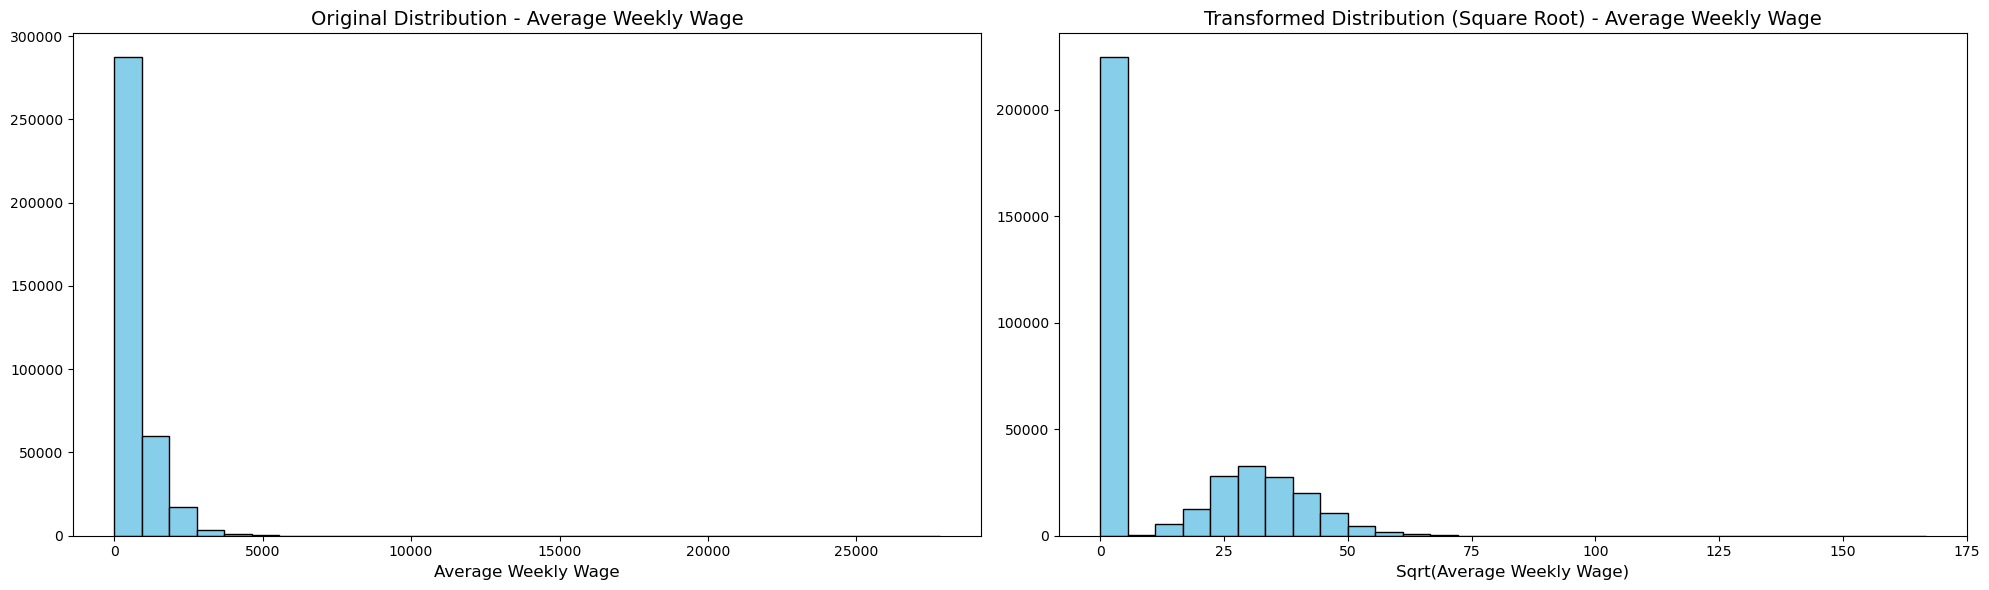

In [166]:
# Create a copy of the original 'Average Weekly Wage' before transformation
original_wage = X_train['Average Weekly Wage'].copy()

# Apply the square root transformation
X_train['Average Weekly Wage'] = np.sqrt(X_train['Average Weekly Wage'])
X_val['Average Weekly Wage'] = np.sqrt(X_val['Average Weekly Wage'])
test['Average Weekly Wage'] = np.sqrt(test['Average Weekly Wage'])

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Original distribution
axes[0].hist(original_wage, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Original Distribution - Average Weekly Wage', fontsize=14)
axes[0].set_xlabel('Average Weekly Wage', fontsize=12)

# Transformed distribution
axes[1].hist(X_train['Average Weekly Wage'], bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Transformed Distribution (Square Root) - Average Weekly Wage', fontsize=14)
axes[1].set_xlabel('Sqrt(Average Weekly Wage)', fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

We can see that now the values are smaller and more **'normally distributed'** when the Wage is greater than 0

##### Days To Process Report & Days Difference

In these case, values **equal or close to 0** will more or less serve the same purpose, so, for this we will **apply the logarithm in these distributions**.

One important thing to note is that **we will do log(x + 1)** to ensure that, after applying the logarithm we **will not have negative values** (**cases where the Average Weekly Wage is smaller than 1** for example) and thus leave its **interpretability intact**.

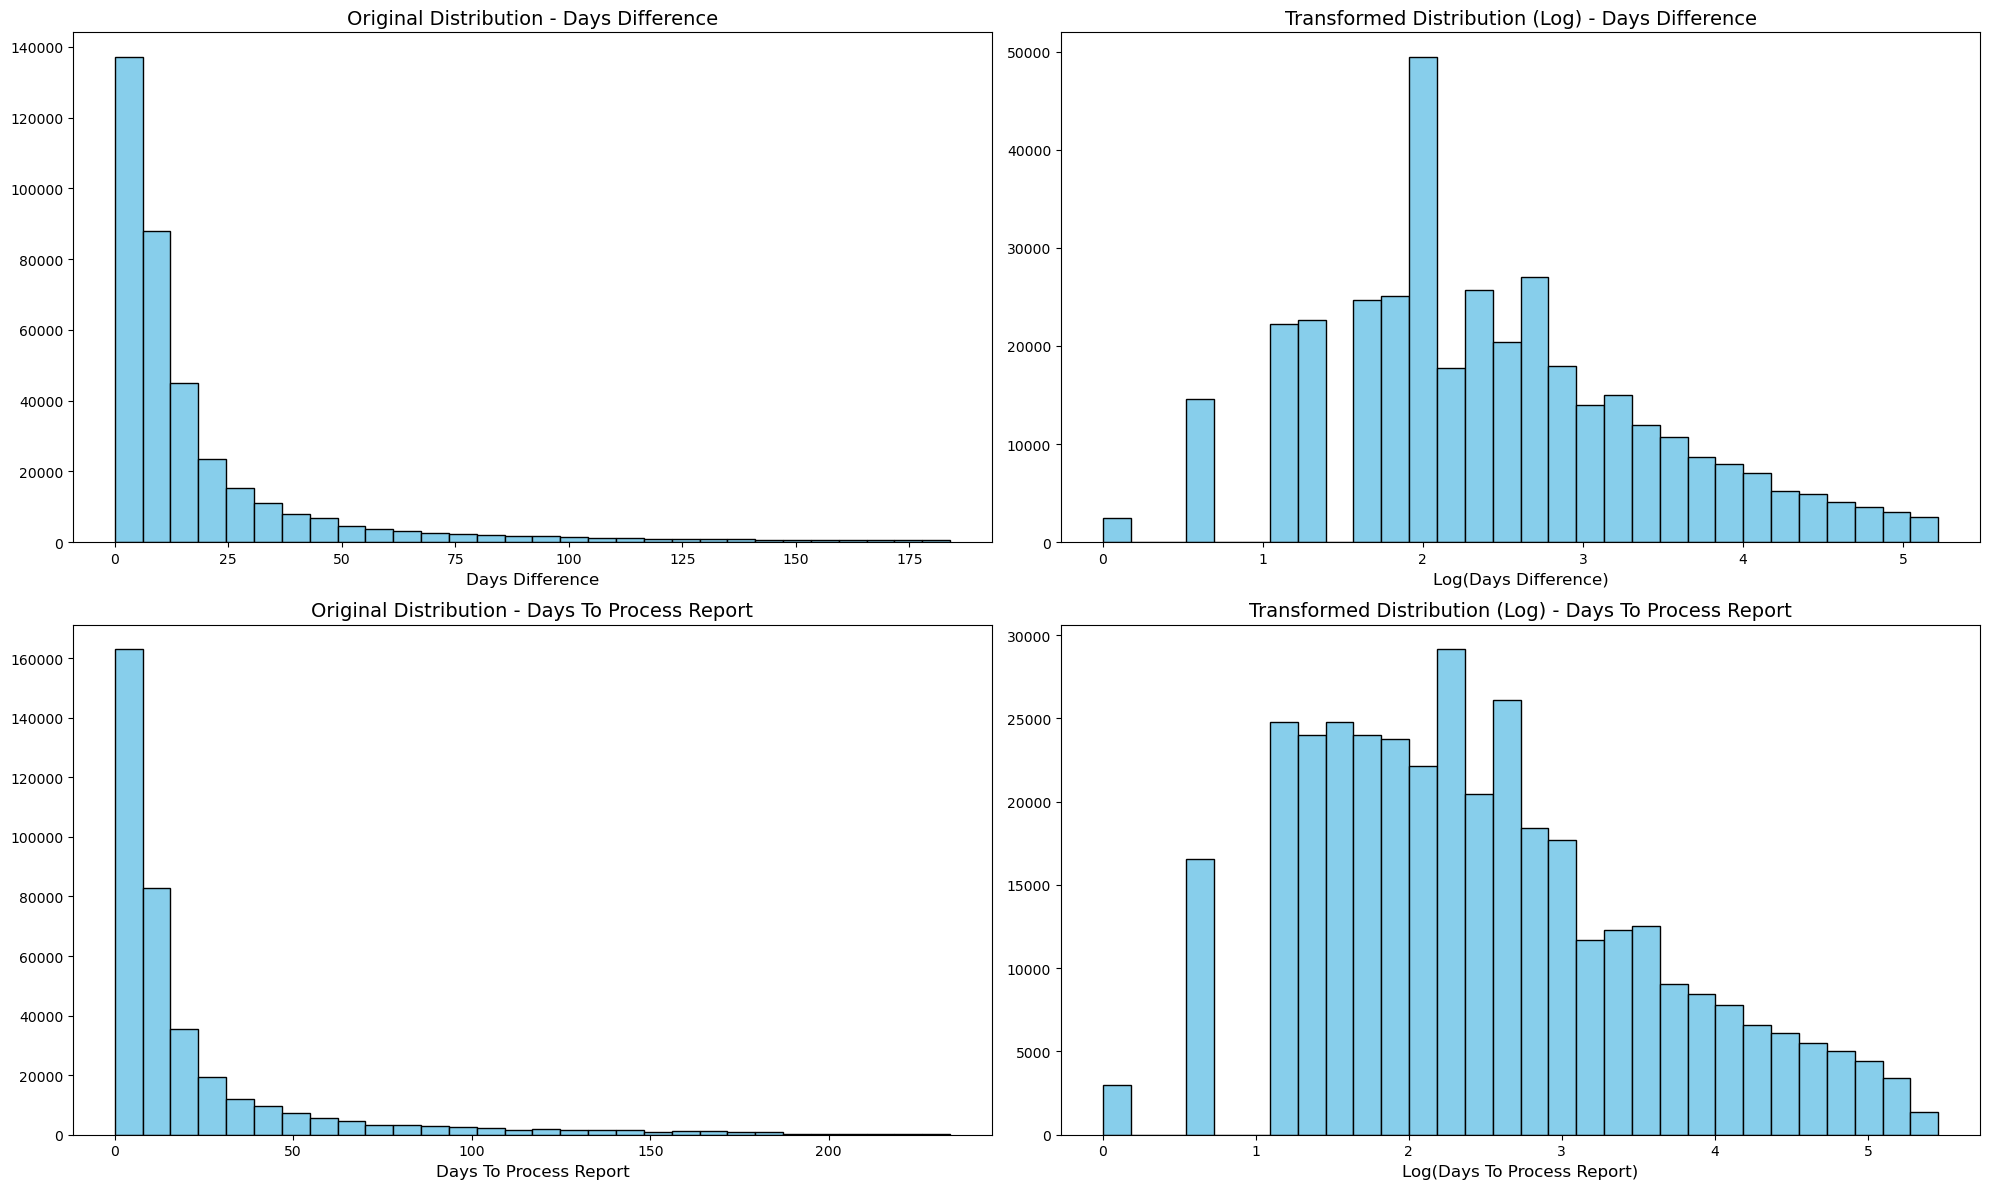

In [167]:
# Create copies of the original columns before transformation
original_days_difference = X_train['Days Difference'].copy()
original_days_to_process = X_train['Days To Process Report'].copy()

# Apply logarithmic transformation (adding 1 to handle zeros)
X_train['Days Difference'] = np.log(X_train['Days Difference'] + 1) #+1 to prevent values = 0 to give error (log(0) is a mathematical error)
X_val['Days Difference'] = np.log(X_val['Days Difference'] + 1)
test['Days Difference'] = np.log(test['Days Difference'] + 1)

X_train['Days To Process Report'] = np.log(X_train['Days To Process Report'] + 1)
X_val['Days To Process Report'] = np.log(X_val['Days To Process Report'] + 1)
test['Days To Process Report'] = np.log(test['Days To Process Report'] + 1)

# Plot side-by-side comparisons
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Original Days Difference
axes[0, 0].hist(original_days_difference, bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Original Distribution - Days Difference', fontsize=14)
axes[0, 0].set_xlabel('Days Difference', fontsize=12)

# Transformed Days Difference
axes[0, 1].hist(X_train['Days Difference'], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Transformed Distribution (Log) - Days Difference', fontsize=14)
axes[0, 1].set_xlabel('Log(Days Difference)', fontsize=12)

# Original Days To Process Report
axes[1, 0].hist(original_days_to_process, bins=30, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Original Distribution - Days To Process Report', fontsize=14)
axes[1, 0].set_xlabel('Days To Process Report', fontsize=12)

# Transformed Days To Process Report
axes[1, 1].hist(X_train['Days To Process Report'], bins=30, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Transformed Distribution (Log) - Days To Process Report', fontsize=14)
axes[1, 1].set_xlabel('Log(Days To Process Report)', fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

These two distribution now look way more compacted and "normalized" making them better for the training of the model and having less extreme and distant values.

### Feature Selection

##### Data Scaling

Before proceeding with any feature selection analysis, it is essential that we scale the values ​​of the numerical variables. Here there are two possibilities: use either MinMaxScaler or StandardScaler.
We decided to go with the second option mainly for one reason:
* MinMaxScaler restricts us to a range from 0 to 1 and, when we have variables like ``Average Weekly Wage`` which, even now when the values ​​are a little more converged, a scale as extreme as this would cause certain values ​​could be very close to 0 and be confused with this absence. Using StandardScaler, although the null values of this variable no longer have that same value 0, the most extreme values present will not dominate this same range, allowing for a better distribution
* We will, also, only scale metric features, first because that is what makes sense logically and only the techniques that only uses metric variables require a balancing of the data.

In [168]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the metric features
scaler.fit(X_train[metric_features])

# Transform the metric features
scaled_metrics = scaler.transform(X_train[metric_features])  # Scaled numeric features as a NumPy array

# Convert the scaled metrics back to a DataFrame
scaled_metrics_df = pd.DataFrame(scaled_metrics, columns=metric_features, index=X_train.index)

# Combine the scaled metrics with the original non-metric features
X_train_scaled = X_train.copy()  # Create a copy of the original data
X_train_scaled[metric_features] = scaled_metrics_df  # Replace the metric features with their scaled versions

# Display the scaled DataFrame with all columns preserved
X_train_scaled

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Type,County of Injury,COVID-19 Indicator,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Cause Severity,Body Part Risk,Nature of Injury Risk,Industry Category,Claim Report Received,Hearing Held,Days Difference,Days To Process Report,Assembly Year,Assembly Month,Assembly Day,Accident Year,Accident Month,Accident Day,C-2 Year,C-2 Month,C-2 Day,Years To Process Report,Years Difference,Age Group,Carrier,District,Zip Code Frequency
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5479022,-1.415400,0.0,0,-0.747419,1.295658,1,5,0,1.0,-0.393170,11.0,1.0,53.0,52.0,55.0,13143.0,6,5,1,3,0,0,-1.039128,-0.987999,-1.313356,-0.433137,-0.873309,-1.198948,-0.437598,-1.204043,-1.319047,-0.431298,-0.877234,-0.257598,-0.237591,-1.205696,235,7,-1.156419
6023025,-0.537965,0.0,1,1.168272,0.566607,1,40,0,1.0,1.641445,31.0,4.0,31.0,10.0,65.0,11368.0,4,6,1,3,1,1,1.413138,1.573801,1.156340,-0.143564,1.072458,1.174869,-0.437598,-0.633350,1.141009,0.147994,-0.189012,-0.257598,-0.237591,-0.075347,287,4,1.923894
5851908,-0.099248,0.0,1,0.696651,0.129176,1,27,0,0.0,0.624138,33.0,1.0,56.0,52.0,38.0,14580.0,6,3,1,3,1,1,2.715889,2.459670,-0.078508,1.304299,-0.873309,-0.012040,-0.437598,0.393899,-0.089019,1.306579,-0.877234,-0.257598,-0.237591,-0.075347,134,5,0.302677
5913931,1.143786,0.0,1,1.119748,-1.110211,1,0,0,1.0,0.624138,31.0,1.0,32.0,49.0,32.0,12065.0,4,3,1,3,0,1,-1.729015,-1.621419,1.156340,-1.301854,-1.331136,1.174869,-1.302016,-1.432321,1.141009,-1.300237,-1.336048,-0.257598,-0.237591,1.055003,134,0,0.219001
5845976,1.143786,0.0,0,-0.747419,-1.110211,1,23,0,0.0,-0.393170,62.0,4.0,29.0,90.0,90.0,11203.0,4,6,3,1,0,0,1.227429,1.093040,-0.078508,1.014727,1.530285,-0.012040,0.714959,0.622176,-0.089019,1.016933,1.531542,-0.257598,-0.237591,1.055003,221,4,1.550839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744419,2.021221,0.0,1,0.744877,-2.057977,1,29,0,1.0,-0.393170,49.0,4.0,75.0,10.0,56.0,11542.0,8,5,1,2,1,0,1.587518,1.545681,-0.078508,-0.143564,-0.072111,-0.012040,-0.725737,0.622176,-0.089019,-0.141652,0.843320,-0.257598,-0.237591,2.326646,235,4,-0.317918
5655355,1.655623,0.0,0,-0.747419,-1.693452,1,51,1,0.0,-0.393170,44.0,4.0,83.0,83.0,60.0,11754.0,10,4,2,2,0,0,0.340647,-0.150664,-0.078508,-1.301854,-0.529938,-0.012040,-1.590155,1.307009,-0.089019,-1.300237,-1.221344,-0.257598,-0.237591,1.055003,163,3,-0.429486
5940234,-0.611085,0.0,1,1.849773,0.639512,1,55,0,1.0,-0.393170,92.0,1.0,74.0,10.0,90.0,12477.0,8,6,1,1,1,0,0.340647,0.790235,1.156340,-1.012282,-0.529938,1.174869,-1.302016,0.964592,1.141009,-1.010591,0.843320,-0.257598,-0.237591,-0.075347,235,0,-0.603810


In [169]:
# Transform the metric features in validation data
scaled_metrics_val = scaler.transform(X_val[metric_features])  # Scaled numeric features for validation
scaled_metrics_val_df = pd.DataFrame(scaled_metrics_val, columns=metric_features, index=X_val.index)

# Combine scaled metrics with original non-metric features for validation
X_val_scaled = X_val.copy()  # Create a copy of the original validation data
X_val_scaled[metric_features] = scaled_metrics_val_df  # Replace the metric features with scaled versions

# Transform the metric features in test data
scaled_metrics_test = scaler.transform(test[metric_features])  # Scaled numeric features for test
scaled_metrics_test_df = pd.DataFrame(scaled_metrics_test, columns=metric_features, index=test.index)

# Combine scaled metrics with original non-metric features for test
test_scaled = test.copy()  # Create a copy of the original test data
test_scaled[metric_features] = scaled_metrics_test_df  # Replace the metric features with scaled versions

##### Spearman's Correlation

Perhaps the most common technique for evaluating the relationship between features and the target itself, we will plot a correlation matrix to see this.
We will consider 2 very important factors for a future decision, defining the following tresholds:
* Two variables that contain **more than a value of 0.75 of correlation between them** (excluding the target) we will consider a **multicollinearity problem**, meaning that, in the end, **we will never include both** and we will have to decide between one of the two in the case if the other techniques tell us to maintain the two .
* We will only consider **"important"** features that have either **less than -0.05 or more than 0.05 correlation with the target**. Otherwise, we will consider that in this case, the decision that the matrix is providing us is that this feature should no longer be considered.

In [170]:
def cor_heatmap(cor):
    plt.figure(figsize=(30, 22))
    sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', 
                linewidths=0.2, square=True, vmin=-1, vmax=1, center=0) #Define min, max and center values for the heatmap colors
    plt.title("Spearman Correlation Heatmap - Features and Target")
    plt.show()

In [171]:
cor_spearman_target = X_train_scaled.apply(lambda col: col.corr(y_train, method='spearman'))

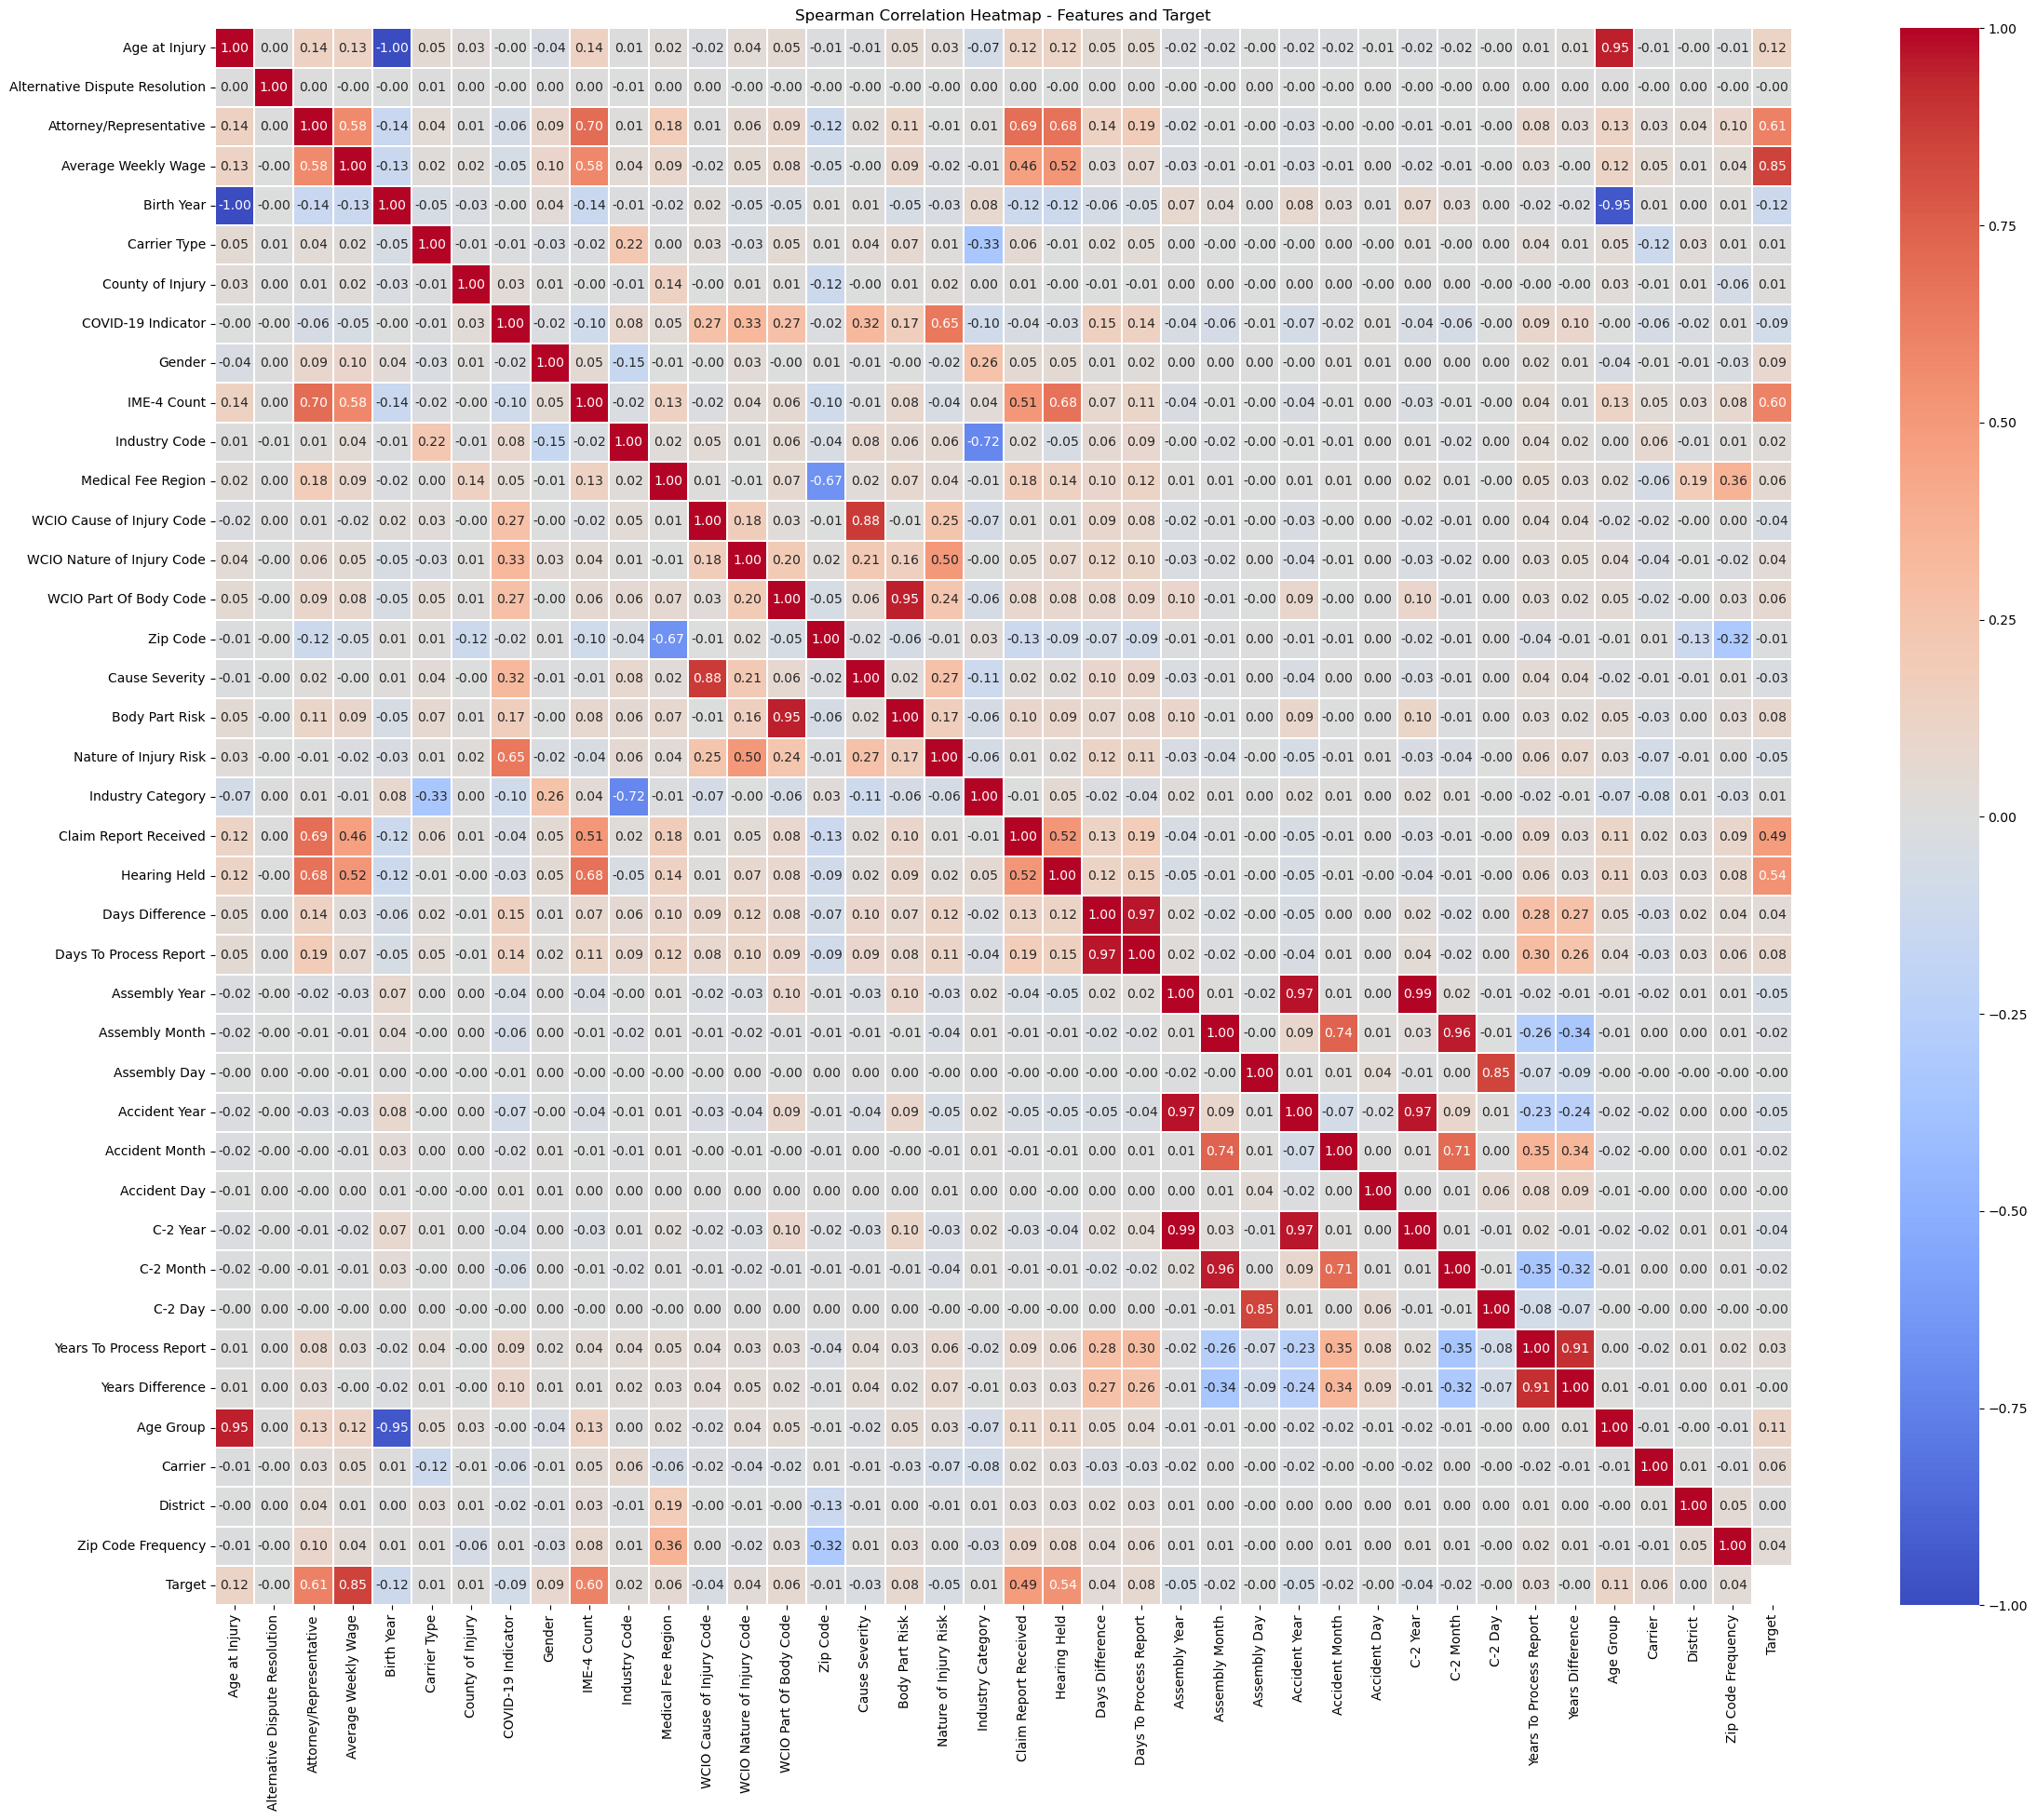

In [172]:
correlation_matrix = X_train_scaled.corr(method='spearman')

# Add the correlation with the target to the matrix
correlation_matrix['Target'] = cor_spearman_target
correlation_matrix.loc['Target'] = cor_spearman_target

# Plot the correlation matrix with a heatmap
cor_heatmap(correlation_matrix)

Through this matrix we were able to remove some points:
* All dates (accident, assembly and C-2) have a strong correlation with each other with values, sometimes very close to 1.
* All features created through clusters have strong correlations with their "source variable", which is what would be expected.
* Binary variables such as ``Attorney/Representative``, ``Claim Report Received`` and ``Hearing Held`` indicate very high values ​​and we can assume what we have seen before that, when they are absent, the Claim values Injury Type tends to be "CANCELLED" or "NON-COMP".
* For very similar reasons to both ``Average Weekly Wage`` and ``IME-4``, despite not being binary, the absence of value in one of these two, generally tends to lead to the same conclusion.

We see that, based on our last two points we mentioned, there are features that highly influence the target variable (strong correlation), yet, we also saw that this is because of the impact of wether the feature was absent or not and, this difference in values would only indicate if the output was going to be eiter "NON-COMP" or "CANCELLED", or one of the other 5 possible outcomes without any specification. So, with this in mind, it will be really important to include other features that, although not representing strong correlations to the target, might be the key to differentiate these groups of possible values.

##### Chi-squared for categorical data

This test allows us to evaluate all categorical variables and test their significance in relation to the ``Claim Injury Type`` target. We set the default significance value at 0.05 for this case.

In [173]:
def TestIndependence(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X[var])
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    if p < alpha:
        result = f"{var} is IMPORTANT for Prediction (p-value={p:.4f})"
    else:
        result = f"{var} is NOT an important predictor (p-value={p:.4f}). Discard {var} from model."
    print(result)

for var in X_train[non_metric].columns:
    TestIndependence(X_train[non_metric], y_train, var)

Alternative Dispute Resolution is NOT an important predictor (p-value=0.2107). Discard Alternative Dispute Resolution from model.
Attorney/Representative is IMPORTANT for Prediction (p-value=0.0000)
Carrier Type is IMPORTANT for Prediction (p-value=0.0000)
County of Injury is IMPORTANT for Prediction (p-value=0.0000)
COVID-19 Indicator is IMPORTANT for Prediction (p-value=0.0000)
Gender is IMPORTANT for Prediction (p-value=0.0000)
Industry Code is IMPORTANT for Prediction (p-value=0.0000)
Medical Fee Region is IMPORTANT for Prediction (p-value=0.0000)
WCIO Cause of Injury Code is IMPORTANT for Prediction (p-value=0.0000)
WCIO Nature of Injury Code is IMPORTANT for Prediction (p-value=0.0000)
WCIO Part Of Body Code is IMPORTANT for Prediction (p-value=0.0000)
Zip Code is IMPORTANT for Prediction (p-value=0.0000)
Cause Severity is IMPORTANT for Prediction (p-value=0.0000)
Body Part Risk is IMPORTANT for Prediction (p-value=0.0000)
Nature of Injury Risk is IMPORTANT for Prediction (p-valu

There is one huge red flag here, ``Alternative Dispute Resolution`` which is a variable that shows a p-value of 0.21, a very strong indicator that this variable should not be used through the Chi-squared test.
The rest, Chi-Squared stated that should be kept.

#### LassoCV

LassoCV is a technique that uses cross validation and an L1 penalty that causes some coefficients to be equal to 0 in case of irrelevance.
For this case we will consider all features = 0 to discard and we will keep in mind those that have values very close to null in case of doubt in the final decision.

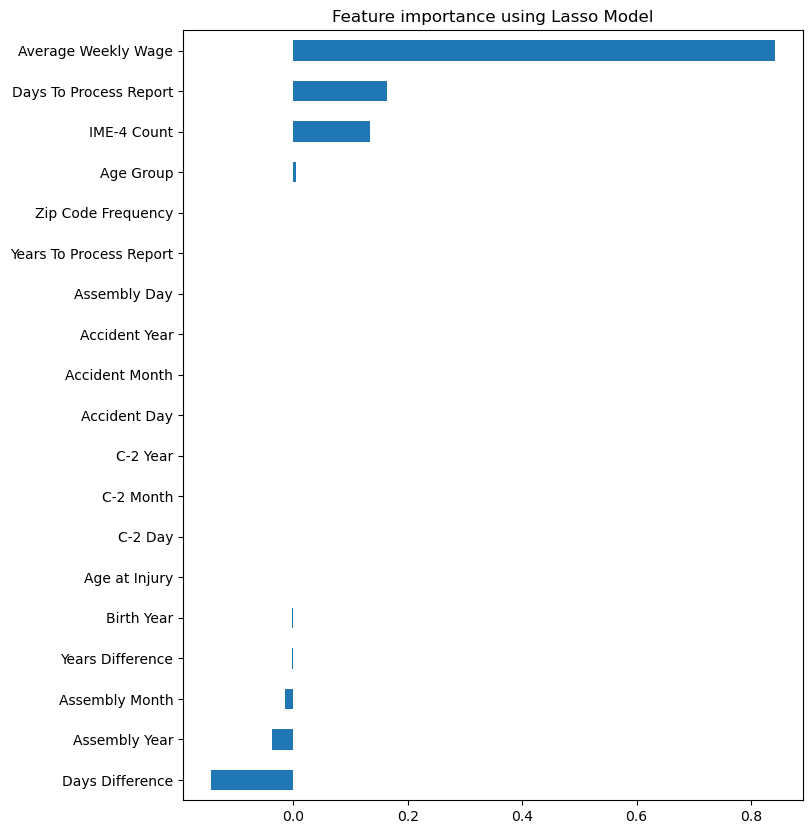

In [174]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
reg = LassoCV()

reg.fit(X_train_scaled[metric_features], y_train)

coef = pd.Series(reg.coef_, index = X_train_scaled[metric_features].columns)

plot_importance(coef,'Lasso')

In [175]:
coef.sort_values()

Days Difference           -0.143660
Assembly Year             -0.037905
Assembly Month            -0.014369
Years Difference          -0.002631
Birth Year                -0.001547
Age at Injury              0.000000
C-2 Day                   -0.000000
C-2 Month                 -0.000000
C-2 Year                  -0.000000
Accident Day              -0.000000
Accident Month             0.000000
Accident Year             -0.000000
Assembly Day              -0.000000
Years To Process Report    0.000166
Zip Code Frequency         0.000184
Age Group                  0.005434
IME-4 Count                0.133220
Days To Process Report     0.163856
Average Weekly Wage        0.841565
dtype: float64

We were able to observe that, even so, there are many coefficients equal to 0, indicating their possible irrelevance for the model.
Variables such as ``Years To Process Report`` which has a value of 0.000166, for example, are not in fact null, but have a coefficient very close to 0 and we will keep this in mind if this feature is in doubt whether or not be included.

##### RFE

The RFE allows us to **successively eliminate variables** that we do not consider important in order to **reach the number of features that we want to maintain** that we assign. For this case, we will **retain 8 variables** since we think it is a sufficient number taking into account the metric variables we have (RFE only considers metric features). Since we will be selecting 8 of the 18 available variables, we will not look to any other ranking other than the first (the selected variables will be ranked 1 and the remaining ones will increase their value depending on the moment they are removed).

To perform the RFE for feature selection we need to define a model so, for now, we will stick with a **decision tree** to decrease computational expense

In [176]:
model = DecisionTreeClassifier(random_state=42,max_depth=10, min_samples_split=10, min_samples_leaf=10) #Assign simple parameters to avoid overfitting

In [177]:
rfe = RFE(estimator = model, n_features_to_select=8)

In [178]:
rfe.fit(X_train_scaled[metric_features], y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=10,
                                     min_samples_split=10, random_state=42),
    n_features_to_select=8)

In [179]:
selected_features = X_train_scaled[metric_features].columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Average Weekly Wage', 'Birth Year', 'Days Difference',
       'Days To Process Report', 'Assembly Month', 'C-2 Year', 'IME-4 Count',
       'Zip Code Frequency'],
      dtype='object')


##### Random Forest Classifier Feature Importance

Finally, we will use this technique to evaluate the percentage of importance of each feature for assembling decision trees. This technique could be quite relevant considering that, in the models, we will consider trees, and understanding which features reduce impurity in each node of the tree is crucial to increasing the effectiveness of the models. For this case, we will consider the top 10 features in this model as the ones to "Keep".

In [180]:
# Initialize Random Forest Classifier
model1 = RandomForestClassifier(
    class_weight ="balanced",
    random_state=42, 
    n_estimators=200,           
    max_depth=10,              
    min_samples_split=100,      
    min_samples_leaf=50
)

# Fit the model with the training data
model1.fit(X_train_scaled, y_train)

# Get the importance of the features
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': model1.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show results order by importances
print(feature_importances)

                           Feature  Importance
3              Average Weekly Wage    0.161828
9                      IME-4 Count    0.124048
21                    Hearing Held    0.089643
2          Attorney/Representative    0.064946
20           Claim Report Received    0.058794
13      WCIO Nature of Injury Code    0.049736
23          Days To Process Report    0.037913
14          WCIO Part Of Body Code    0.036626
22                 Days Difference    0.031118
4                       Birth Year    0.026817
0                    Age at Injury    0.024351
10                   Industry Code    0.024322
12       WCIO Cause of Injury Code    0.024218
15                        Zip Code    0.022200
17                  Body Part Risk    0.017167
38              Zip Code Frequency    0.016830
16                  Cause Severity    0.015881
36                         Carrier    0.014278
18           Nature of Injury Risk    0.013566
29                    Accident Day    0.013233
32           

We will make a graph so that we can see which are the 10 features that contribute most to the reduction of impurities.

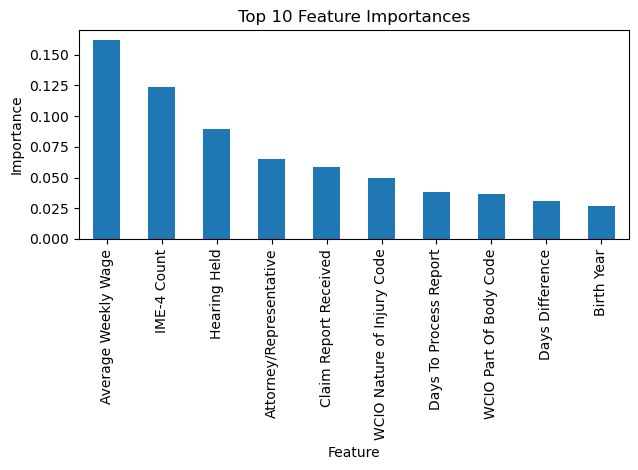

In [181]:
feature_importances.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

We begin to observe a pattern with certain variables that always tend to appear as more important, which will help us make the final decision as to which features are left for the models.

#### Feature Selection: Final decision

Now that we have managed to evaluate these 5 feature selection techniques, we will put them all together in a table to make a majority vote, that is, keeping the variable in case of a majority of "Keep" and discarding it otherwise.
Some notes for the final decision:
* Even in the case of a majority of "Keep", it will be evaluated whether this variable has any colinearity with any other feature that is also being selected for the models. In cases where this happens, we will select the variable with the highest importance value in the RandomForestClassifier since it is a good indicator given that we will also use this model to predict.
* In cases of tied "Discard" and "Keep" votes, if any of these decisions has a question mark (indicating the tangency of the decision), it will be considered a "Discard" and we will not include it in the model.

| **Feature**                  | **Spearman** | **RFE** | **Lasso** | **Chi-Squared** | **Random Forest** | **What to do?**                          |
|--------------------------------|--------------|------------|-----------|-----------------|-------------------|------------------------------------------|
| Age at Injury                  | Keep      | Discard    | Discard   | -               | Discard          | Discard                                  |
| Average Weekly Wage            | Keep         | Keep       | Keep      | -               | Keep          | Include in the model                     |
| Birth Year                     | Keep         | Keep       | Keep?      | -               | Keep          | Include in the model                     |
| Days Difference                | Discard         | Keep       | Keep      | -               | Keep          | Discard (multicolinearity)                     |
| Days To Process Report         | Keep         | Keep       | Keep      | -               | Keep          | Include in the model                     |
| Assembly Year                  | Keep      | Discard    | Keep   | -               | Discard          | Discard (multicolinearity)                                 |
| Assembly Month                 | Discard      | Keep       | Keep?      | -               | Discard          | Discard                           |
| Assembly Day                   | Discard      | Discard       | Discard   | -               | Discard          | Discard                                  |
| Accident Year                  | Keep      | Discard       | Discard   | -               | Discard          | Discard                                  |
| Accident Month                 | Discard      | Discard    | Discard   | -               | Discard          | Discard                                  |
| Accident Day                   | Discard      | Discard       | Discard   | -               | Discard          | Discard                                  |
| C-2 Year                       | Discard      | Keep       | Discard   | -               | Discard          | Discard                                  |
| C-2 Month                      | Discard      | Discard    | Discard   | -               | Discard          | Discard                                  |
| C-2 Day                        | Discard      | Discard    | Discard   | -               | Discard          | Discard                                  |
| Years To Process Report        | Discard      | Discard    | Discard?      | -               | Discard          | Discard                                  |
| Years Difference               | Discard      | Discard    | Keep?   | -               | Discard          | Discard                                  |
| IME-4 Count                    | Keep         | Keep       | Keep      | -               | Keep          | Include in the model                     |
| Zip Code Frequency             | Discard         | Keep       | Discard?      | -               | Discard          | Discard                     |
| Age Group                      | Keep         | Discard          | Keep?      | -               | Discard          | Discard (multicolinearity)                           |
| Alternative Dispute Resolution | Discard      | -          | -         | Discard         | Discard          | Discard                                  |
| Attorney/Representative        | Keep         | -          | -         | Keep           | Keep          | Include? (multicolinearity)                     |
| Carrier Type                   | Discard      | -          | -         | Keep           | Discard          | Discard                                  |
| County of Injury               | Discard         | -          | -         | Keep           | Discard          | Discard                     |
| COVID-19 Indicator             | Keep      | -          | -         | Keep           | Discard          | Discard                                  |
| Gender                         | Keep     | -          | -         | Keep           | Discard          | Discard                                  |
| Industry Code                  | Discard      | -          | -         | Keep           | Discard          | Discard                     |
| Medical Fee Region             | Keep         | -          | -         | Keep           | Discard          | Include in the model                     |
| WCIO Cause of Injury Code      | Discard         | -          | -         | Keep           | Discard          | Discard                     |
| WCIO Nature of Injury Code     | Discard      | -          | -         | Keep           | Keep          | Include in the model                     |
| WCIO Part Of Body Code         | Keep         | -          | -         | Keep           | Keep          | Include in the model                     |
| Zip Code                       | Discard      | -          | -         | Keep           | Discard          | Discard                                  |
| Cause Severity                 | Discard         | -          | -         | Keep           | Discard          | Discard (multicolinearity)                     |
| Body Part Risk                 | Keep      | -          | -         | Keep           | Discard          | Discard (multicolinearity)                     |
| Nature of Injury Risk          | Keep      | -          | -         | Keep           | Discard          | Discard (multicolinearity)                     |
| Industry Category              | Discard      | -          | -         | Keep           | Discard          | Discard                     |
| Claim Report Received          | Keep         | -          | -         | Keep           | Keep          | Include in the model                     |
| Hearing Held                   | Keep         | -          | -         | Keep           | Keep          | Include in the model                     |
| Carrier                        | Keep         | -          | -         | Keep           | Discard          | Include in the model                     |
| District                       | Discard      | -          | -         | Keep           | Discard          | Discard                                  |


An important case that deserves an explanation of why it was decided this way:
* ``Attorney/Representative``, ``Claim Report Received``, ``Hearing Held`` and ``IME-4 Count`` will be maintained even if the correlation between the first and these last two indicates values close to 0.7. Although this reveals some type of collinearity, we consider that these variables may all be relevant to the final output. Example: we can have a lawyer and still not have a hearing, just as it may be possible to fill out a Claim Report without any type of representative. As we consider that all these features together can be crucial for the final decision (especially when the decision is neither Cancelled nor Non-Compensated) we will keep them all for the models.

Finally sellect the features chosen through these votes.

In [182]:
selected_features = ['Attorney/Representative', 'Average Weekly Wage', 'Birth Year', 'Days To Process Report', 'IME-4 Count', 'Medical Fee Region',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Claim Report Received',
                    'Hearing Held', 'Carrier'] 

# Apply the selection to both training and validation datasets
X_train_selected = X_train_scaled[selected_features]
X_val_selected = X_val_scaled[selected_features]
test_selected = test_scaled[selected_features]

In [183]:
###################### THIS LINE OF CODE IS ONLY FOR THE OPEN ENDED SECTION ################################################
#Update the metric features
metric_features = [col for col in metric_features if col in X_train_selected.columns]
# Fit the scaler to the metric features
scaler.fit(X_train_selected[metric_features])

# Transform the metric features
scaled_metrics = scaler.transform(X_train_selected[metric_features])  # Scaled numeric features as a NumPy array

# Convert the scaled metrics back to a DataFrame
scaled_metrics_df = pd.DataFrame(scaled_metrics, columns=metric_features, index=X_train_selected.index)

# Combine the scaled metrics with the original non-metric features
X_train_scaled = X_train_selected.copy()  # Create a copy of the original data
X_train_scaled[metric_features] = scaled_metrics_df  # Replace the metric features with their scaled versions

Plot the Correlation Matrix just to see what changed.

In [184]:
cor_spearman_target = X_train_selected.apply(lambda col: col.corr(y_train, method='spearman'))

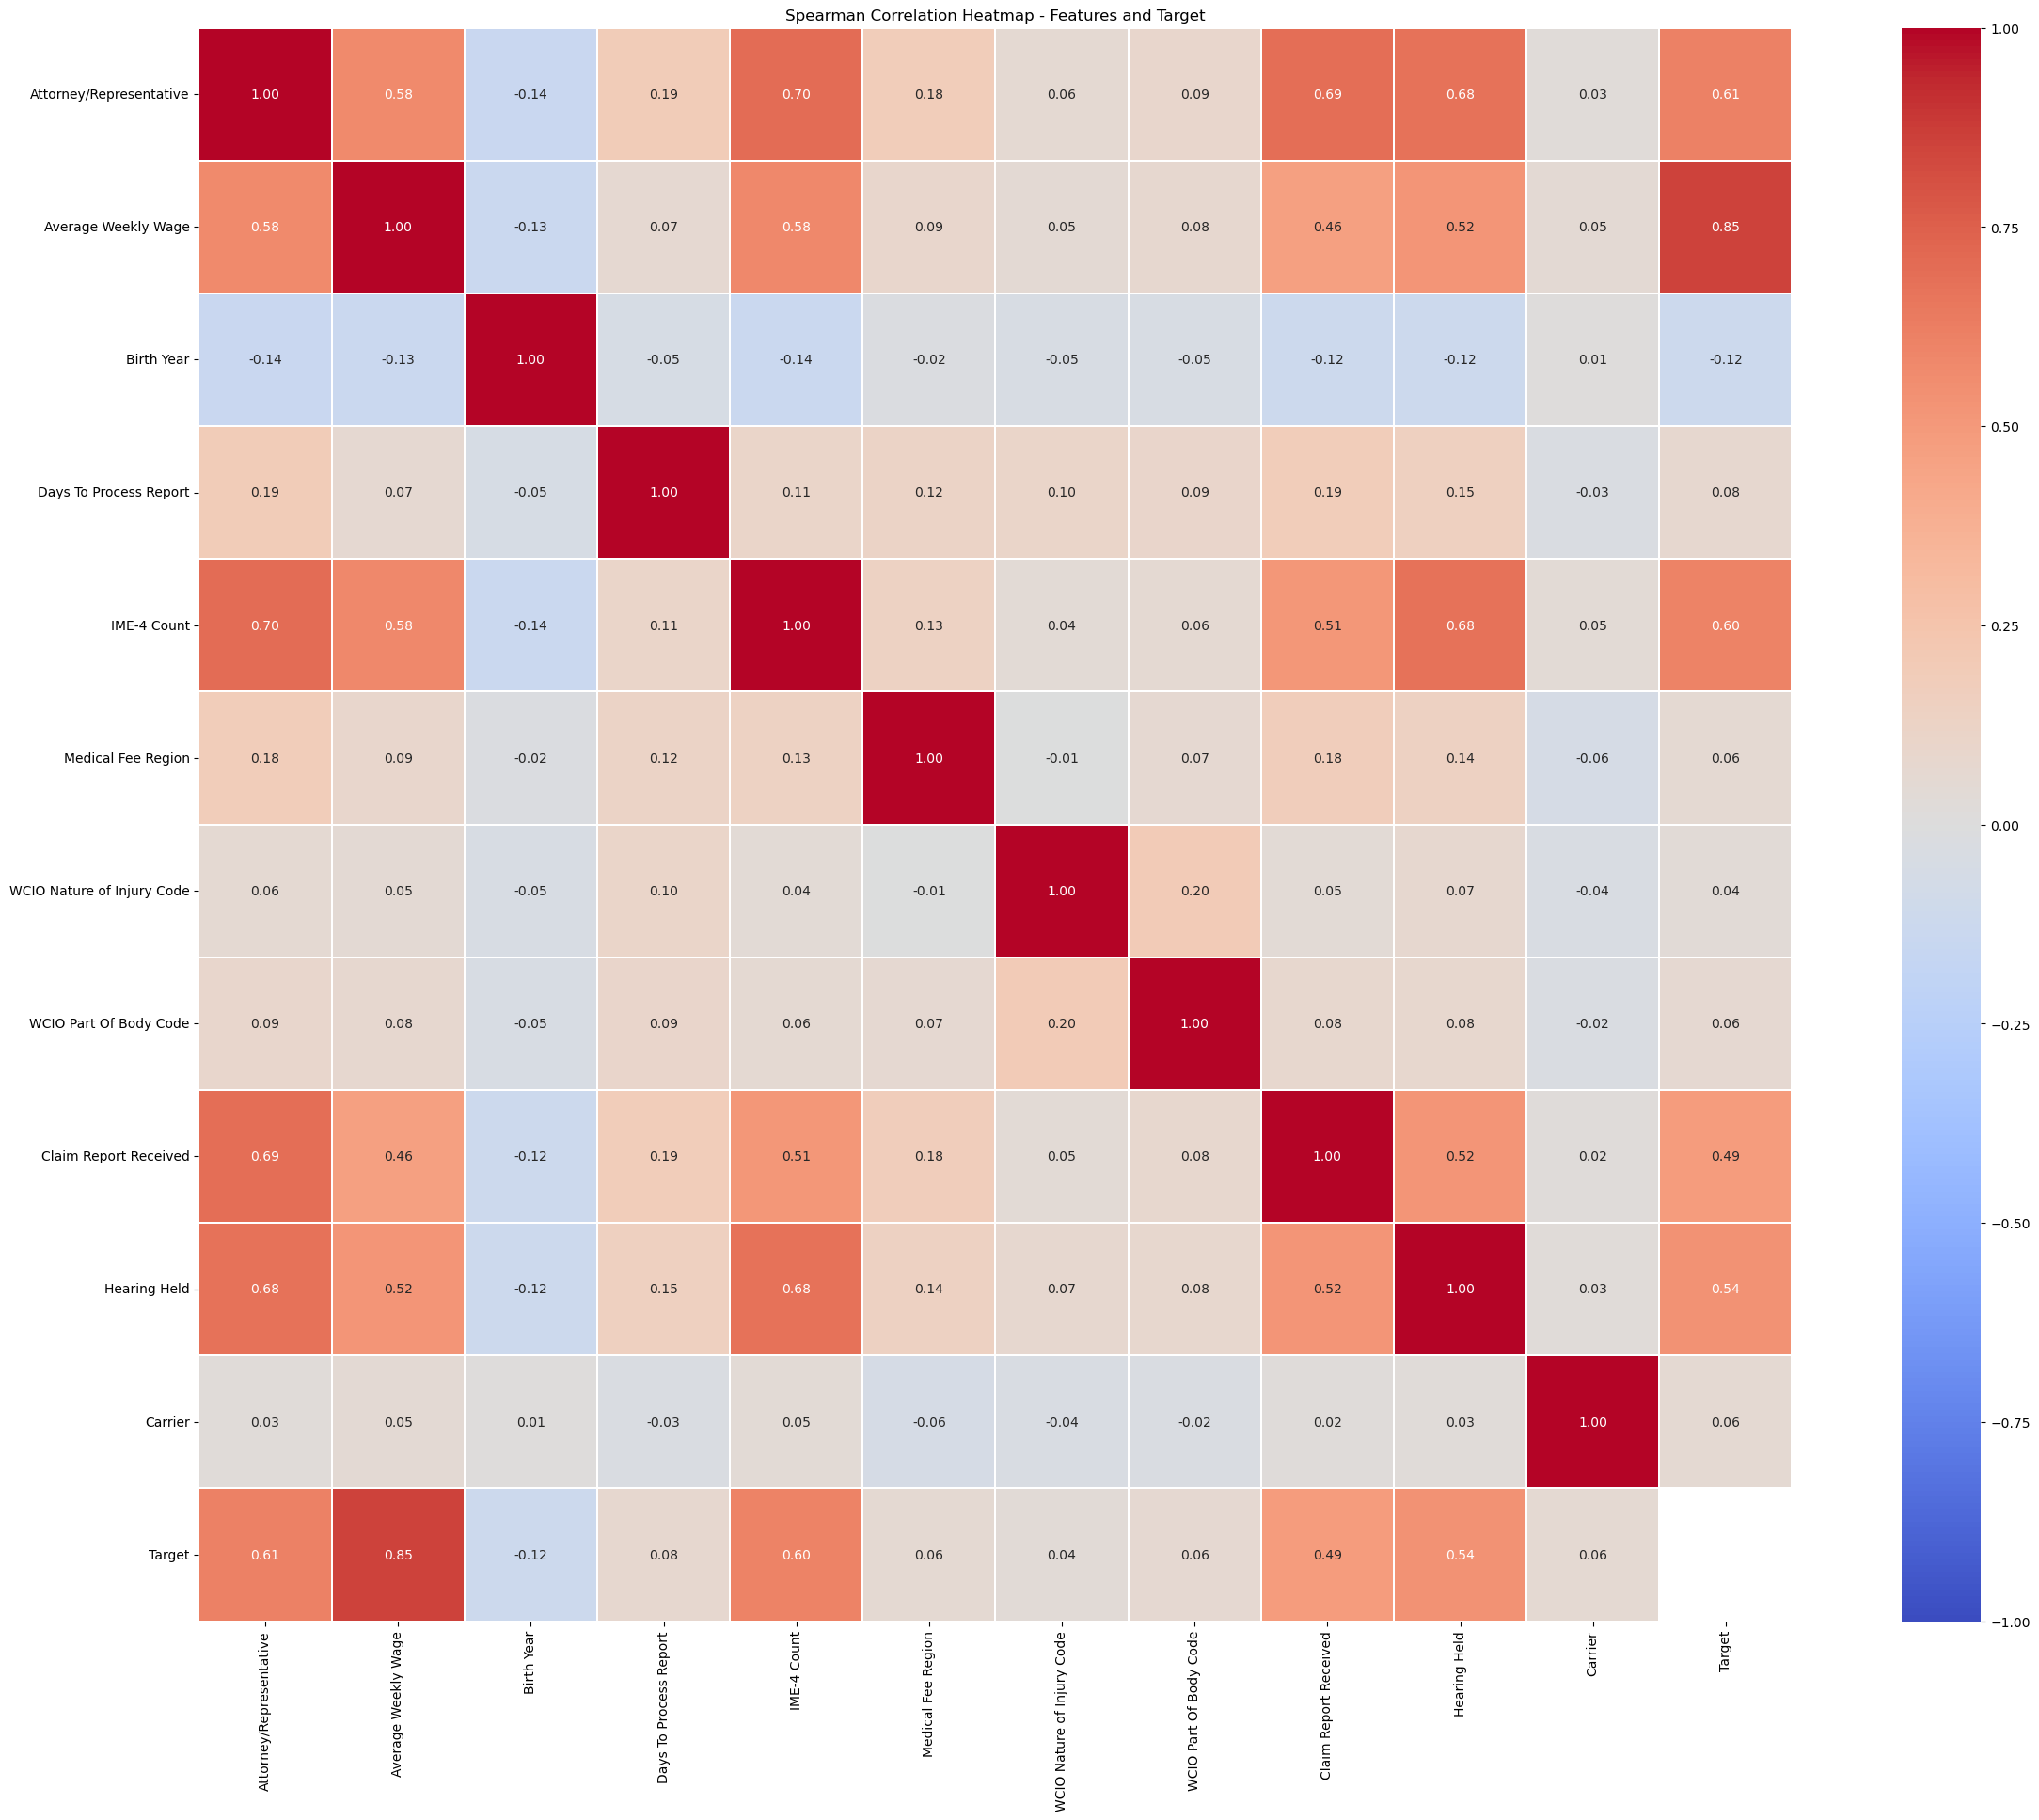

In [185]:
correlation_matrix = X_train_selected.corr(method='spearman')

correlation_matrix['Target'] = cor_spearman_target
correlation_matrix.loc['Target'] = cor_spearman_target

cor_heatmap(correlation_matrix)

We now finally have a more asthetically pleasing matrix with only the features selected so that we can now more easily understand how variables behave with one another. 

### Prediction models

For this Model Selection, we decided to implement 5 models: Decision Trees, Random Forest, XGBoost, LightGBM  and Extremely Randomized Trees. Our main goal was to compare the performance of each model, when only using a few parameters with the same values. The model/models with the best performance will be the focus on the next part, where we will do model tuning to achieve better scores.

The models we chose for this evaluation were based on Decision Trees, because they are one of the few models that can deal with nominal variables and perform well on multiclass classification problems.

Quick note before running the models, we will still apply some parameters in all of the models, but we want to keep them as short and simple as possible. For example, we will set a max_depth = 10 for all of the trees, firstly to ensure that all of the models have the same "treatment", and finally to make sure that we don't overfit our data in all of the models since they all are or are based on decision trees where, if we don't reduce their depth, they will eventually overfit.

Any other parameter such as ``class_weight ="balanced"`` will be introduced in some models that have this option for the sole porpuse of it being important to tell the model that we have an inbalance in the target outputs. This will also apply for cases like ``objective='multiclass'`` where we clearly define that, as the name says, we have a multiclass problem. 

##### Cross Validation to apply to the models

We believe that using cross validation will be better for a number of reasons but the most important are:
* More reliable results since the performance is based on multiple splits
* Better generalization of data because we are basically test different sets of data at all times which ensures that.

In [186]:
# Define the number of folds for cross-validation
n_splits = 3  
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through the folds on the training set only
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    # Create training and validation splits within the training set
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

#### Model 1 - Decision Trees

A decision tree is a non-parametric supervised learning algorithm, which is used for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [187]:
#Defines the Decision Tree Model
model1 = DecisionTreeClassifier(
    random_state=42,
    max_depth=10, 
)

# Lists to store F1 scores for each fold
train_f1_scores = []
val_f1_scores = []

# Perform cross-validation on the training set only
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    # Create training and validation splits within the training set
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the model on the current training fold
    model1.fit(X_train_cv, y_train_cv)
    
    # Calculates F1 Score for training and validation
    train_f1 = f1_score(y_train_cv, model1.predict(X_train_cv), average='macro')
    val_f1 = f1_score(y_val_cv, model1.predict(X_val_cv), average='macro')
    
    # Appending the F1 scores
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# Computes the average of F1 scores across the 3 folds for training and validation
dt_avg_train_f1_score = np.mean(train_f1_scores)
dt_avg_val_f1_score = np.mean(val_f1_scores)

print(f"\nMean Training F1 Score: {dt_avg_train_f1_score:.2f}")
print(f"Mean Validation F1 Score: {dt_avg_val_f1_score:.2f}")


Mean Training F1 Score: 0.33
Mean Validation F1 Score: 0.30


The results for the Decision Tree model, showing a mean training F1 score of 0.33 and a mean validation F1 score of 0.30, suggest that the model does not seem to show overfitting yet still shows some signs of underperforming.

#### Model 2 - Random Forest

A Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve the performance and reduce overfitting. It is used for both classification and regression tasks. Random Forest biulds several decision trees during training, each trained on a random subset of the data. The final prediction is made by averaging the predictions of all individual trees for regression problems and by majority voting for classification problems. 

In [188]:
# Defines the Random Forest model
model2 = RandomForestClassifier(
    class_weight ="balanced",
    random_state=42,          
    max_depth=10,              
)

# Lists to store F1 scores for each fold
train_f1_scores = []
val_f1_scores = []

# Perform cross-validation on the training set only
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    # Create training and validation splits within the training set
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the Random Forest model on the current training fold
    model2.fit(X_train_cv, y_train_cv)
    
    # Calculate F1 Score for training and validation
    train_f1 = f1_score(y_train_cv, model2.predict(X_train_cv), average='macro')
    val_f1 = f1_score(y_val_cv, model2.predict(X_val_cv), average='macro')
    
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)
    
# Mean F1 Scores for each Fold
rf_avg_train_f1_score = np.mean(train_f1_scores)
rf_avg_val_f1_score = np.mean(val_f1_scores)
print(f"\nMean Training F1 Score: {rf_avg_train_f1_score:.2f}")
print(f"Mean Validation F1 Score: {rf_avg_val_f1_score:.2f}")


Mean Training F1 Score: 0.41
Mean Validation F1 Score: 0.32


The Random Forest model shows a higher training F1 score, but the validation F1 score falls short of reaching the same level, indicating a slight overfitting.

#### Model 3 - XGBoost

XGBoost is an ensemble learning algorithm that leverages boosting techniques to improve performance and reduce overfitting. It is used for both classification and regression tasks. 
XGBoost builds a series of decision trees sequentially, where each new tree attempts to correct the previous errors made. The final prediction is made by the combination of outputs of all trees, with each tree contributing based on its ability to correct the errors in the model. XGBoost is known for its speed, accuracy, and for handling large datasets.

In [191]:
# Initialize the XGBoost Classifier
model3 = xgb.XGBClassifier(
    random_state=42,
    max_depth=10,
    learning_rate = 0.1, #Define a learning rate to prevent huge overfitting
    eval_metric = 'mlogloss',
    tree_method = 'hist',
    use_label_encoder = False
)

# Using empty lists to store F1 scores for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating through the folds
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    print(f"Fold {fold + 1}")
    
    # Splitting the data for each fold
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    #Fitting the data for each folf
    model3.fit(X_train_cv, y_train_cv - 1)

    # Predictions on the training and validation sets
    y_train_pred = model3.predict(X_train_cv)
    y_val_pred = model3.predict(X_val_cv)

    # Computes F1 scores
    train_f1 = f1_score(y_train_cv - 1, y_train_pred, average='macro')
    val_f1 = f1_score(y_val_cv - 1, y_val_pred, average='macro')
    
    # Append the scores to the respective lists
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# Compute average F1 scores across all folds
xgb_avg_train_f1_score = np.mean(train_f1_scores)
xgb_avg_val_f1_score = np.mean(val_f1_scores)

print(f"\nAverage Training F1 Score across 3 folds: {xgb_avg_train_f1_score:.4f}")
print(f"Average Validation F1 Score across 3 folds: {xgb_avg_val_f1_score:.4f}")

Fold 1
Fold 2
Fold 3

Average Training F1 Score across 3 folds: 0.6062
Average Validation F1 Score across 3 folds: 0.3475


The xgboost model has the biggest training score of all models, however it reveals a lot of overfitting due to the lack of results on the validation set.

#### Model 4 - LightGBM model

LightGBM (Light Gradient Boosting Machine) is an  efficient gradient boosting model designed for speed and scalability. It is widely used for solving both classification and regression tasks, especially in large datasets.

In [192]:
# Define LightGBM model
model4 = lgb.LGBMClassifier(
    objective='multiclass',
    num_class = 8,
    class_weight='balanced',
    max_depth = 10,
    random_state=42,
    verbose = -1
)


# Doing a StratifiedKFold with 3 splits
skf = StratifiedKFold(n_splits=3)

# Creating lists to store F1 scores for each fold
train_f1_scores = []
val_f1_scores = []

# Iterating through the folds
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    print(f"Fold {fold + 1}")
    
    # Split the data for this fold
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting the model
    model4.fit(X_train_cv, y_train_cv)

    # Predictions on the training and validation sets
    y_train_pred = model4.predict(X_train_cv)
    y_val_pred = model4.predict(X_val_cv)

    # Computing F1 scores
    train_f1 = f1_score(y_train_cv, y_train_pred, average='macro')
    val_f1 = f1_score(y_val_cv, y_val_pred, average='macro')
    
    # Appends F1 scores to the lists
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

# Computing the average F1 scores across all folds
lgb_avg_train_f1_score = np.mean(train_f1_scores)
lgb_avg_val_f1_score = np.mean(val_f1_scores)

print(f"Average Training F1 Score across 3 folds: {lgb_avg_train_f1_score:.4f}")
print(f"Average Validation F1 Score across 3 folds: {lgb_avg_val_f1_score:.4f}")

Fold 1
Fold 2
Fold 3
Average Training F1 Score across 3 folds: 0.5094
Average Validation F1 Score across 3 folds: 0.3752


Here it clearly seems like the model that reveals the most promising results. In LightGBM, although it still reveals a bit of overfitting, it is where we have the highest f1 value in the validation indicating that, as soon as we remove this problem, we can have very interesting results.

#### Model 5 - Extremely Randomized Trees

Extremely Randomized Trees is an ensemble learning algorithm that is an extension of decision trees. Like Random Forest, it builds multiple decision trees, but it introduces two differences to enhance randomness and improve performance. In ExtraTrees, the algorithm selects the best split for each node not only by considering random subsets of features, but also by randomizing the thresholds for the splits, making the trees even more randomized. This leads to faster training times and a reduction in overfitting, as it prevents the model from being too sensitive to individual data points. The final prediction is made by averaging the predictions of all individual trees for regression tasks, and by majority voting for classification tasks.

In [193]:
# Initialize the Logistic Regression model
model5 = ExtraTreesClassifier(
    max_depth= 10,         # Maximum depth of each tree (None means full depth)
    random_state=42,        # Ensures reproducibility
)

# Initialize StratifiedKFold with 3 splits
skf = StratifiedKFold(n_splits=3)

# Initialize lists to store F1 scores for each fold
fold_val_f1_scores = []
fold_train_f1_scores = []

# Iterate through the folds
for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train)):
    print(f"Fold {fold + 1}")
    
    # Split the data for this fold
    X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the fold's training data
    model5.fit(X_train_cv, y_train_cv)

    # Predictions on the fold's validation and training set
    y_val_pred = model5.predict(X_val_cv)
    y_train_pred = model5.predict(X_train_cv)

    # Calculate the F1 score for this fold
    val_f1 = f1_score(y_val_cv, y_val_pred, average="macro")
    train_f1 = f1_score(y_train_cv, y_train_pred, average="macro")
    
    print(f"Fold {fold + 1} Validation F1 Score: {val_f1:.4f}")
    print(f"Fold {fold + 1} Training F1 Score: {train_f1:.4f}")
    
    # Append the scores to the respective lists
    fold_val_f1_scores.append(val_f1)
    fold_train_f1_scores.append(train_f1)

# Compute the average F1 scores across all folds
extra_avg_val_f1_score = np.mean(fold_val_f1_scores)
extra_avg_train_f1_score = np.mean(fold_train_f1_scores)
print(f"Average Validation F1 Score across 3 folds: {extra_avg_val_f1_score:.4f}")
print(f"Average Training F1 Score across 3 folds: {extra_avg_train_f1_score:.4f}")

Fold 1
Fold 1 Validation F1 Score: 0.2624
Fold 1 Training F1 Score: 0.2653
Fold 2
Fold 2 Validation F1 Score: 0.2639
Fold 2 Training F1 Score: 0.2661
Fold 3
Fold 3 Validation F1 Score: 0.2645
Fold 3 Training F1 Score: 0.2705
Average Validation F1 Score across 3 folds: 0.2636
Average Training F1 Score across 3 folds: 0.2673


The Extremly Randomized Trees has a very consistent results on training and validation, not showing any signs of overfitting. It also reveals a very low score compared with the other models.

#### Model's Score Visualization

After reviewing the scores of the different models, we decided to further analyze the XGBoost and LightGBM models due to their high overfitting. This overfitting presents an opportunity to fine-tune the model parameters to reduce it and achieve better results.

Initially, we considered using grid search to find the best combination of parameters. However, we realized that it would take too long and only provide insights of a combination of parameter. To address this, we decided to evaluate each parameter individually to understand logically and visually how they impact the model and determine the point at which they no longer improve performance. Although this approach helps us find the best value for each parameter, we know that combining the best values won't necessarily give us the best overall model.

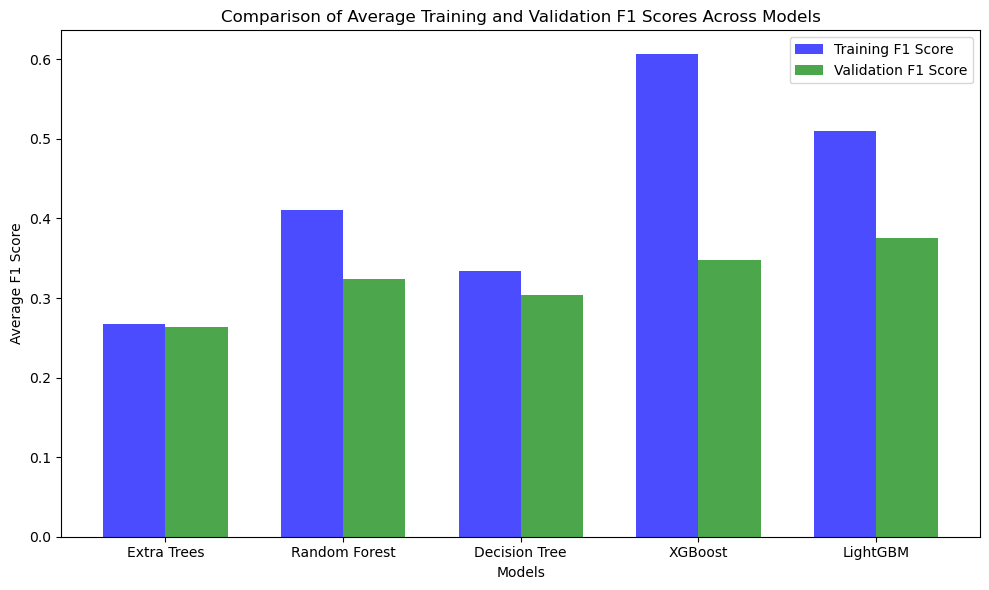

In [194]:
# Storing the name of each model, the train F1 scores and validation F1 scores.
models = ['Extra Trees', 'Random Forest', 'Decision Tree', 'XGBoost', 'LightGBM']
avg_train_f1_scores = [
    extra_avg_train_f1_score, 
    rf_avg_train_f1_score, 
    dt_avg_train_f1_score, 
    xgb_avg_train_f1_score, 
    lgb_avg_train_f1_score
]

avg_val_f1_scores = [
    extra_avg_val_f1_score, 
    rf_avg_val_f1_score, 
    dt_avg_val_f1_score, 
    xgb_avg_val_f1_score, 
    lgb_avg_val_f1_score
]

plt.figure(figsize=(10, 6))
bar_width = 0.35  # Bar width
index = np.arange(len(models))

# Plotting the training and validation F1 scores
plt.bar(index, avg_train_f1_scores, bar_width, label='Training F1 Score', alpha=0.7, color='b')
plt.bar(index + bar_width, avg_val_f1_scores, bar_width, label='Validation F1 Score', alpha=0.7, color='g')

# Plotting the labels and the title
plt.xlabel('Models')
plt.ylabel('Average F1 Score')
plt.title('Comparison of Average Training and Validation F1 Scores Across Models')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()

#### Model Tuning

Before starting any optimization of parameters, we will run one last comparison to check the behaviour in performance of the two most promising models (XGBoost and LightGBM).

Evaluating model: LightGBM
>LightGBM Mean F1 Score: 0.375 (Std: 0.004)
Evaluating model: XGBoost
>XGBoost Mean F1 Score: 0.348 (Std: 0.011)


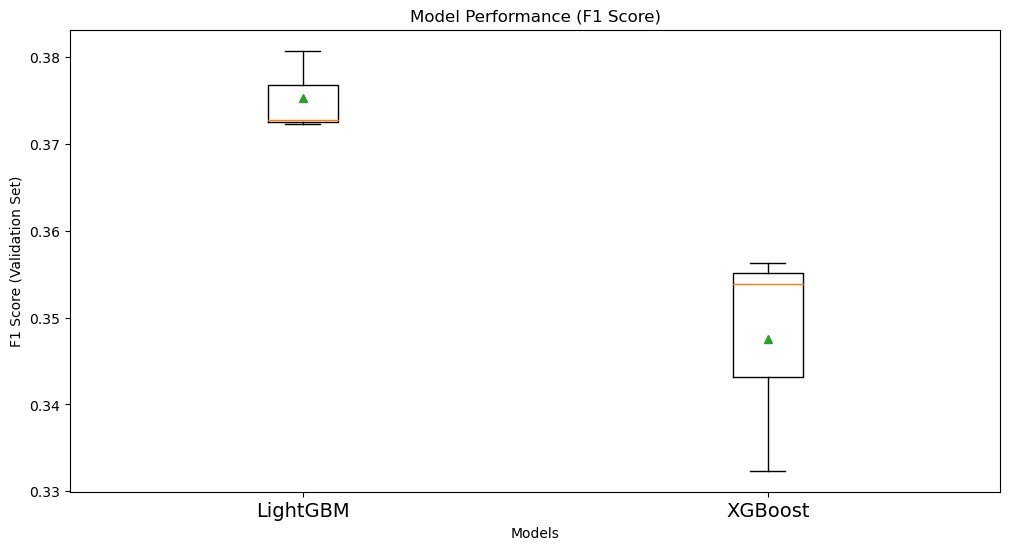

In [195]:
def return_results(models):
    # Inicializar listas para armazenar F1 scores e nomes dos modelos
    results, names = [], []
    
    # Garantir que y_train é um pandas Series para compatibilidade
    y_train_reset = y_train.reset_index(drop=True)
    
    # Iterar pelos modelos
    for name, model in models.items():
        print(f"Evaluating model: {name}")
        
        # Usar StratifiedKFold com 3 splits
        skf = StratifiedKFold(n_splits=3)
        f1_scores = []  # Lista para armazenar F1 scores por fold
        
        for fold, (train_index, val_index) in enumerate(skf.split(X_train_selected, y_train_reset)):
            # Dividir os dados para este fold
            X_train_cv, X_val_cv = X_train_selected.iloc[train_index], X_train_selected.iloc[val_index]
            y_train_cv, y_val_cv = y_train_reset.iloc[train_index], y_train_reset.iloc[val_index]
            
            # Ajustar rótulos para XGBoost
            if 'xgboost' in str(type(model)).lower():
                y_train_cv = y_train_cv - 1
                y_val_cv = y_val_cv - 1
            
            # Treinar o modelo e prever no conjunto de validação
            model.fit(X_train_cv, y_train_cv)
            y_val_pred = model.predict(X_val_cv)
            
            # Calcular F1 score e adicionar à lista
            f1 = f1_score(y_val_cv, y_val_pred, average='macro')
            f1_scores.append(f1)
        
        # Armazenar F1 scores e nome do modelo
        results.append(f1_scores)  # Agora results contém listas de scores por fold
        names.append(name)
        
        # Imprimir estatísticas
        print(f'>{name} Mean F1 Score: {np.mean(f1_scores):.3f} (Std: {np.std(f1_scores):.3f})')

    # Criar boxplot com os F1 scores
    plt.figure(figsize=(12, 6))
    plt.boxplot(results, labels=names, showmeans=True)
    plt.title("Model Performance (F1 Score)")
    plt.xlabel("Models")
    plt.ylabel("F1 Score (Validation Set)")
    plt.xticks(fontsize=14)
    plt.show()


# Dictionary with the models LightGBM e XGBoost
models = {
    "LightGBM": model4,  # LightGBM model
    "XGBoost": model3    # XGBoost model
}

# Evaluate the models
return_results(models)

LightGBM clearly indicates better results compared to XGBoost so, with this in mind, we will stick with this model for optimization.

#### Improve Parameters

After reviewing the scores of the different models, we decided to further analyze LightGBM and optimize models due to their high overfitting. This overfitting presents an opportunity to fine-tune the model parameters to reduce it and achieve better results. 

In [196]:
def return_f1scores_with_cv(model, X, y, n_splits=3):

    skf = StratifiedKFold(n_splits=n_splits)
    f1_scores = []  # List to store F1 scores for each fold
    
    for train_index, val_index in skf.split(X, y):
        # Split the data for this fold
        X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
        y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
        
        # Train the model
        model.fit(X_train_cv, y_train_cv)
        
        # Predict and compute F1 score
        y_val_pred = model.predict(X_val_cv)
        f1 = f1_score(y_val_cv, y_val_pred, average='macro')
        f1_scores.append(f1)
    
    return f1_scores

def plot_param_performance_cv(model, param_name, param_values, X, y, model_name, n_splits=3):

    results = []  # List to store F1 scores for each parameter value
    
    # Iterate through the parameter values
    for value in param_values:
        print(f"Testing {param_name} = {value}")
        
        # Set the parameter value
        model.set_params(**{param_name: value})
        
        # Get F1 scores using StratifiedKFold CV
        scores = return_f1scores_with_cv(model, X, y, n_splits=n_splits)
        results.append(scores)  # Append the F1 scores for this parameter value
    
    # Plot the boxplot for each parameter value
    plt.figure(figsize=(12, 6))
    plt.boxplot(results, labels=param_values, showmeans=True)
    plt.title(f"{model_name} Performance for {param_name} (Cross-Validation)")
    plt.xlabel(f"{param_name} Values")
    plt.ylabel("F1 Score (Cross-Validation)")
    plt.xticks(rotation=45)
    plt.show()

##### Max depth

This is perhaps one of the key parameters for controlling overfit and improving the prediction score. Limiting the tree's growth will prevent it from creating very long trees and instead of learning data, it will simply "memorize" it.

Testing max_depth = 5
Testing max_depth = 10
Testing max_depth = 12
Testing max_depth = 15


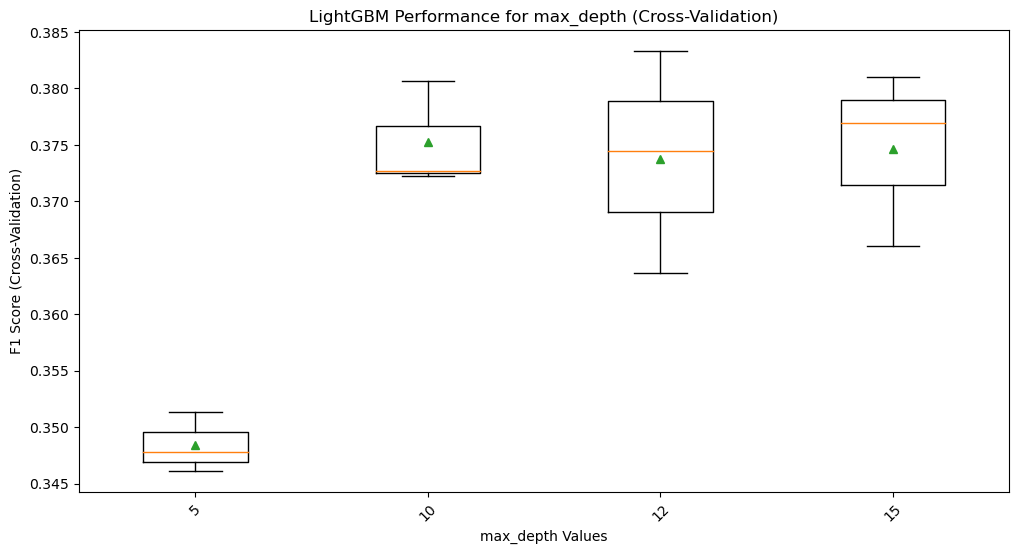

In [197]:
# Parameter values to test
param_values_depth = [5, 10, 12, 15]  # List of values for max_depth

# Evaluate LightGBM using Stratified K-Fold Cross-Validation
plot_param_performance_cv(model4, 'max_depth', param_values_depth, X_train_selected, y_train, "LightGBM")

Although there are some minimal changes, it is possible to see that the model's performance stagnates more or less as soon as we reach the value 10 for max depth. Therefore, taking this into consideration it will be defined as the "ideal" value for our model.

Update the parameters of the model.

In [198]:
model4 = lgb.LGBMClassifier(
    n_estimators = 400,
    objective='multiclass',
    num_class = 8,
    class_weight='balanced',
    max_depth = 10,
    random_state=42,
    verbose = -1
)

##### Number of estimators

Here we are dealing with a parameter where perhaps our objective is to reach an optimal value as quickly as possible. That is, the number of estimators corresponds to the number of trees that will be built in the model. The fewer estimators we have, the less computationally expensive LightGBM will be.

Testing n_estimators = 50
Testing n_estimators = 200
Testing n_estimators = 400
Testing n_estimators = 500


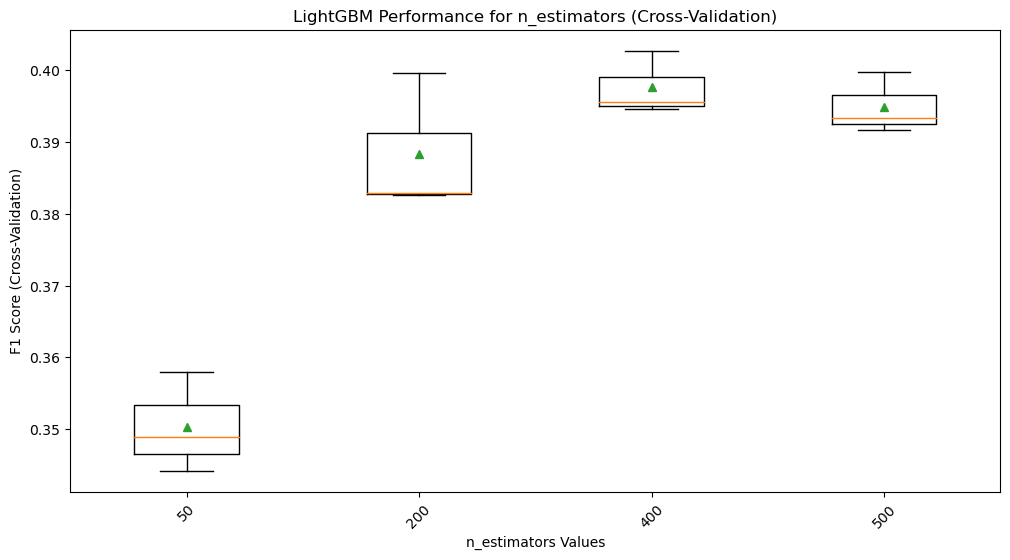

In [199]:
param_values_estimators = [50, 200, 400, 500]  # List of values for n_estimators
plot_param_performance_cv(model4, 'n_estimators', param_values_estimators, X_train_selected, y_train, "LightGBM")

Again, it seems that at value 400, performance stagnates a bit. Knowing that, when we have 500 estimators, performance increases slightly, this tradeoff between a negligible increase and an increase in the model execution speed, we will opt for speed given the complexity of this data set.

In [200]:
#Update model
model4 = lgb.LGBMClassifier(
    n_estimators = 400,
    objective='multiclass',
    num_class = 8,
    class_weight='balanced',
    max_depth = 10,
    random_state=42,
    verbose = -1
)

##### Learning Rate

Testing learning_rate = 0.05
Testing learning_rate = 0.08
Testing learning_rate = 0.1
Testing learning_rate = 0.12


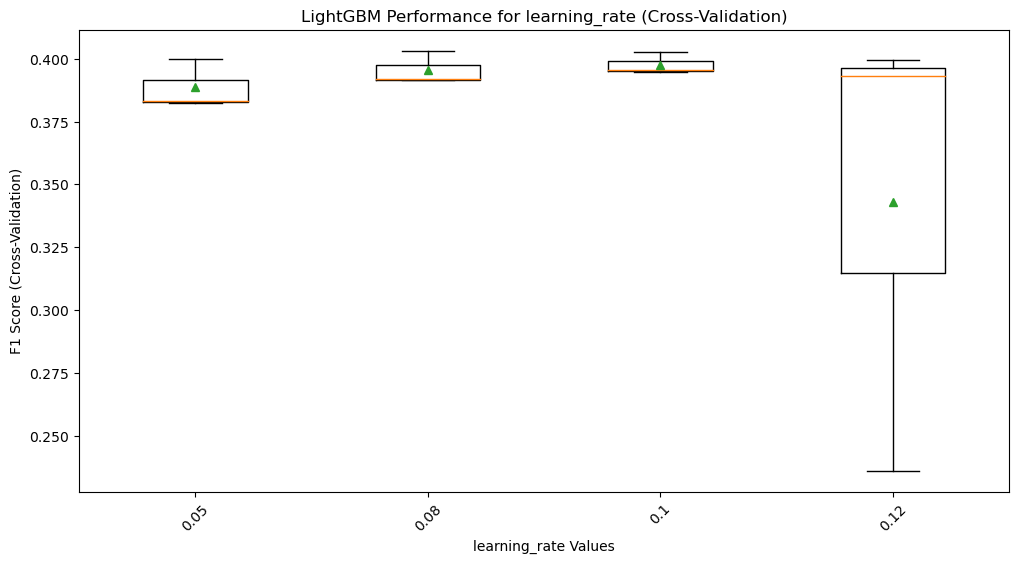

In [201]:
learning_rate = [0.05, 0.08, 0.1, 0.12]
plot_param_performance_cv(
    model=model4, 
    param_name='learning_rate', 
    param_values=learning_rate, 
    X=X_train_selected,
    y = y_train,
    model_name="LightGBM", 
    n_splits=3
)

It is clear to see the big drop that happens once we reach 0.12 so, with this in mind we will stick with 0.1 as the learning rate as it indicates the best result.

In [ ]:
#Update model
model4 = lgb.LGBMClassifier(
    n_estimators = 400,
    objective='multiclass',
    num_class = 8,
    class_weight='balanced',
    max_depth = 10,
    learning_rate = 0.1,
    random_state=42,
    verbose = -1
)

##### Min_child_samples

The final parameter analyzed was min_child_samples. This parameter determines the minimum number of samples required to create a new child node in a tree. A smaller value will allow the model to create more complex trees, potentially capturing more details in the data. However, this could result in overfitting. On the other hand a larger value helps reducing overfitting by limiting the growth of the trees.

Testing min_child_samples = 20
Testing min_child_samples = 50
Testing min_child_samples = 100
Testing min_child_samples = 200


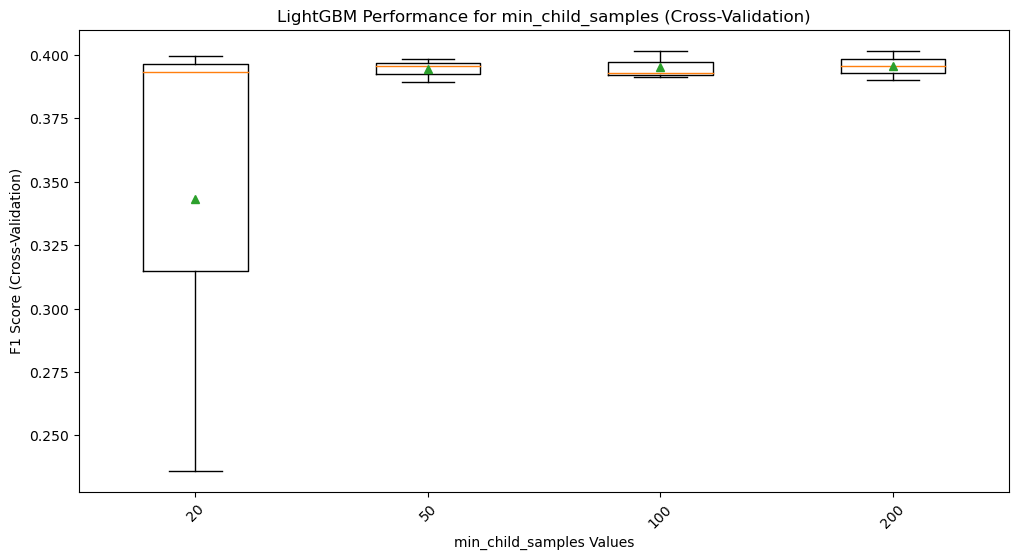

In [202]:
min_child_samples = [20, 50, 100, 200]
plot_param_performance_cv(model4, 'min_child_samples', min_child_samples, X_train_selected, y_train, "LightGBM")

Although the values seem to stagnate around ``min_child_sample = 50`` we will choose = 100 not only because it has slightly higher values (albeit a little) but also to make sure that overfitting will not happen in the future.

In [216]:
#Update model
model4 = lgb.LGBMClassifier(
    n_estimators = 400,
    objective='multiclass',
    num_class = 8,
    class_weight='balanced',
    max_depth = 12,
    learning_rate = 0.1,
    min_child_samples = 100,
    random_state=42,
    verbose = -1
)

#### Best Model 

Finally, after optimizing the model, we will fit it into the training data and make predictions on the validation. With this we will plot a confusion matrix to unsderstand if the model is getting the predictions right for every possible output.

In [217]:
model4.fit(X_train_selected, y_train)

LGBMClassifier(class_weight='balanced', max_depth=12, min_child_samples=100,
               n_estimators=400, num_class=8, objective='multiclass',
               random_state=42, verbose=-1)

In [218]:
# Predict on the validation set
y_val_pred = model4.predict(X_val_selected)

# Compute F1 score on the validation set
f1 = f1_score(y_val, y_val_pred, average='macro')

# Print the F1 score
print(f"F1 Score on Validation Set: {f1:.4f}")

F1 Score on Validation Set: 0.4089


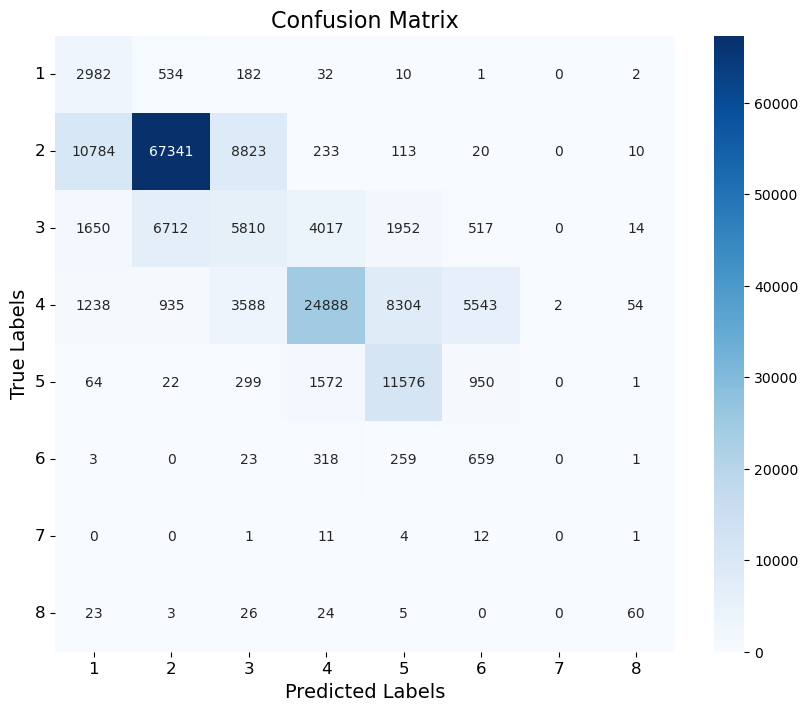

In [219]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True,  # Display numbers in the cells
    fmt='d',     # Format the numbers as integers
    cmap='Blues',  # Color map
    xticklabels=np.unique(y_train),  # Class labels for X-axis
    yticklabels=np.unique(y_train)   # Class labels for Y-axis
)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

Important observations to take away:
* The model is having difficulty predicting some numbers and most of these observations are being allocated to different places (when the output is "1. CANCELLED" the model ends up predicting "2. NON COMP" most of the time, the same goes for to "3. MED ONLY" where LightGBM ends up distributing most of the predictions to values 2 and 4).
* However, both "2. NON COMP" and "4. TEMPORARY" the model is able to predict and get the vast majority of it right (the value 5 also has the majority of correct predictions, however it is not as effective as it is in these other values
* For classes with a smaller number of observations, the emphasis is only on 7 in which the model never predicts it

### Predict on Test Data

After applying diverse methods of feature selection, evaluating every model, optimizing it we can now finally **predict on the test data**.

In [220]:
y_test_pred = model4.predict(test_selected)

In [221]:
results_df = pd.DataFrame({
    'Prediction': y_test_pred
}, index=test.index)  # Get the index from the test_selected DataFrame

In [222]:
results_df['Prediction'].replace({1: '1. CANCELLED', 2: '2. NON-COMP', 3: '3. MED ONLY'
                                 , 4: '4. TEMPORARY', 5: '5. PPD SCH LOSS', 6: '6. PPD NSL', 7: '7. PTD', 8: '8. DEATH'}, inplace = True)

In [223]:
results_df

,Prediction
Claim Identifier,
6165911,2. NON-COMP
6166141,2. NON-COMP
6165907,2. NON-COMP
6166047,2. NON-COMP
6166102,2. NON-COMP
...,...
6553137,1. CANCELLED
6553119,1. CANCELLED
6553542,1. CANCELLED


In [224]:
results_df['Prediction'].value_counts()

2. NON-COMP        245024
3. MED ONLY         53581
1. CANCELLED        36790
4. TEMPORARY        33045
5. PPD SCH LOSS     14658
6. PPD NSL           4660
8. DEATH              217
Name: Prediction, dtype: int64

In [225]:
#Export the predictions
results_df.to_csv('answer777.csv', index = 'Claim Identifier', sep = ',')